# Проектная работа. Рынок заведений общественного питания Москвы. Для Shut Up and Take My Money

**Описание проекта:**

Заказчики попросили провести исследования рынка общественного питание Москвы, но еще не знает какой тип заведения открывать. Будет ли выгоднее, например, открыть кафе или ресторан? Получить теоретичсекий ответ на разные случаи. Выявить общие закономерности рынка, которые помогут менеджерам лучше понять и вернее приянть решение.

**Задание**: Провести исследование рынка общественного питания Москвы

**Цели исследования:**
1) Провести исследование анализа данных рынка общественного питания в Москве;

2) Провести исследования кофеен в Москве;

3) Найти интересные особенности и презентовать полученные результаты.

**Требование к отчету:**
* Более информативная интерпритация результатов;
* много иллюстративных элементов: графиков и таблиц.

**Описание данных:**

Дан 1 датасет - /datasets/moscow_places.csv, который содержит логи событий пользователей с его айди, типом события, группой и временем:

Файл moscow_places.csv:

1) **name** — название заведения;

2) **address** — адрес заведения;

3) **category** — категория заведения, например «кафе», «пиццерия» или «кофейня»;

4) **hours** — информация о днях и часах работы;

5) **lat** — широта географической точки, в которой находится заведение;

6) **lng** — долгота географической точки, в которой находится заведение;

7) **rating** — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);

8) **price** — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;

9) **avg_bill** — строка, которая хранит среднюю стоимость заказа в виде диапазона, например **:**

    * «Средний счёт: 1000–1500 ₽»;
    * «Цена чашки капучино: 130–220 ₽»;
    * «Цена бокала пива: 400–600 ₽».

    и так далее;

10) **middle_avg_bill** — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:

    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.

11) **middle_coffee_cup** — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:

    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

12) **chain** — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):

    - 0 — заведение не является сетевым
    - 1 — заведение является сетевым

13) **district** — административный район, в котором находится заведение, например Центральный административный округ;

14) **seats** — количество посадочных мест.

**Проект состоит из 4 частей:**

1) Выгрузка и изучение общей информации о данных;

2) Предобработка и подготовка к анализу;

3) Иследование рынка общественного питания Москвы;

4) Анализ кофеен для возможного открытия;

5) Общий вывод;

6) Презентация.

## Выгрузим датасет и изучим общую информацию о нем:

Подключим библиотки h3 и geojson:

In [ ]:
!pip install h3
!pip install geojson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.5 MB/s eta 0:00:00


Подключим основые библиотки: из них pandas, математические, статистические и графические:

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
from scipy. stats import lognorm
import math
import plotly.express as px
from plotly import graph_objects as go
from folium import Map, Choropleth, Marker
from folium.plugins import MarkerCluster
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter, FormatStrFormatter
import folium
from geojson import Feature, Point, FeatureCollection
import h3
import json
import seaborn.categorical
from IPython.display import Markdown
import nbformat
import re
import gdown


import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def generate_table_of_contents(notebook_path):
    notebook_url = 'https://drive.google.com/uc?id=' + notebook_path.split('/')[-2]
    gdown.download(notebook_url, 'notebook.ipynb', quiet=True)

    with open('notebook.ipynb', 'r', encoding='utf-8') as file:
        notebook = nbformat.read(file, nbformat.NO_CONVERT)

    table_of_contents = []
    heading_numbers = [0, 0, 0, 0, 0, 0]  # Начальные значения номеров для разных уровней заголовков

    for cell in notebook['cells']:
        if cell['cell_type'] == 'markdown':
            source = cell['source']
            headers = re.findall(r'^(#+)\s+(.*)$', source, flags=re.MULTILINE)

            for header in headers:
                level = len(header[0])
                title = header[1].strip()

                link = '-'.join(re.findall(r'\w+', title.lower()))
                indentation = '&nbsp;' * 2 * (level - 1)
                line_break = '\n' + '&nbsp;' * 2 * level

                heading_numbers[level - 1] += 1
                heading_number_str = '.'.join(str(num) for num in heading_numbers[:level])

                colab_link = notebook_path + f'#scrollTo={link}'
                table_of_contents.append(f'{line_break}- {heading_number_str} {title}')

    markdown_output= '\n'.join(table_of_contents)
    display(Markdown(markdown_output))


# Укажите ссылку на ваш файл на Google Диске
notebook_path = 'https://drive.google.com/file/d/1eQ3vkeeS3M-HGdOZFUd62m_rvsFhkxm_/view?usp=sharing'

# Генерирование оглавления
table_of_contents = generate_table_of_contents(notebook_path)

# Отображение оглавления



&nbsp;&nbsp;- 1 Проектная работа. Рынок заведений общественного питания Москвы. Для Shut Up and Take My Money

&nbsp;&nbsp;&nbsp;&nbsp;- 1.1 Выгрузим датасет и изучим общую информацию о нем:

&nbsp;&nbsp;&nbsp;&nbsp;- 1.2 Предобработка данных:

&nbsp;&nbsp;&nbsp;&nbsp;- 1.3 Анализ данных:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.3.1 **Далее рассмотрим категории заведений:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.3.2 Исследуем распределение количества посадочных мест по категориям:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.3.3 **Далее рассмотри распределение сетевых и несетвых заведений.**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.3.4 Рассмотрим топ 15 самый популярных заведений:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.3.5 **Далее рассмотрим информацию об округах Москвы:**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.3.6 Визуализируем распределение средних рейтингов  по категориям:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.3.7 Построим хороплет среднего рейтинга по округам Москвы:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.3.8 Отобразим все заведения общепита Москвы с их средним рейтингом на карте с кластеризацией:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.3.9 **Проанализируем самые популярные улицы (15 лидеров ко количеству заведений на них).**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.3.10 **Пронализируем улицы с 1 заведением общепита.**

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.3.11 **Проанализируем как распределяется и как зависит средний чек по округам Москвы:**

&nbsp;&nbsp;&nbsp;&nbsp;- 1.4 Анализ открытия кофейни:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.4.12 Проанализируем как распределяется кофейни по районам:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.4.13 График работы кофеен:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.4.14 Ислледуем рейтинги кофеен. Рассмотрим их распределение.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1.4.15 Выясним на какую стоимость чашки капучино стоит ориентироваться при открытии:

&nbsp;&nbsp;&nbsp;&nbsp;- 1.5 ВЫВОД:

&nbsp;&nbsp;- 2 ПРЕЗЕНТАЦИЯ

Выгрузим данные:

In [ ]:
data=pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv')
data

name  category  \
0                   WoWфли      кафе   
1           Четыре комнаты  ресторан   
2                    Хазри      кафе   
3     Dormouse Coffee Shop   кофейня   
4                Иль Марко  пиццерия   
...                    ...       ...   
8401            Суши Мания      кафе   
8402             Миславнес      кафе   
8403               Самовар      кафе   
8404          Чайхана Sabr      кафе   
8405            Kebab Time      кафе   

                                         address  \
0                     Москва, улица Дыбенко, 7/1   
1             Москва, улица Дыбенко, 36, корп. 1   
2                 Москва, Клязьминская улица, 15   
3            Москва, улица Маршала Федоренко, 12   
4                Москва, Правобережная улица, 1Б   
...                                          ...   
8401               Москва, Профсоюзная улица, 56   
8402  Москва, Пролетарский проспект, 19, корп. 1   
8403      Москва, Люблинская улица, 112А, стр. 1   
8404      Москва, Люблинская улица, 112А, стр. 1   
8405              Москва, Россошанский проезд, 6   

                                  district  \
0          Северный административный округ   
1          Северный административный округ   
2          Северный административный округ   
3          Северный административный округ   
4          Северный административный округ   
...                                    ...   
8401   Юго-Западный административный округ   
8402          Южный административный округ   
8403  Юго-Восточный административный округ   
8404  Юго-Восточный административный округ   
8405          Южный административный округ   

                                                  hours        lat        lng  \
0                                ежедневно, 10:00–22:00  55.878494  37.478860   
1                                ежедневно, 10:00–22:00  55.875801  37.484479   
2     пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                                ежедневно, 09:00–22:00  55.881608  37.488860   
4                                ежедневно, 10:00–22:00  55.881166  37.449357   
...                                                 ...        ...        ...   
8401                             ежедневно, 09:00–02:00  55.670021  37.552480   
8402                             ежедневно, 08:00–22:00  55.640875  37.656553   
8403                           ежедневно, круглосуточно  55.648859  37.743219   
8404                           ежедневно, круглосуточно  55.648849  37.743222   
8405                           ежедневно, круглосуточно  55.598229  37.604702   

      rating          price                       avg_bill  middle_avg_bill  \
0        5.0            NaN                            NaN              NaN   
1        4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2        4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3        5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4        5.0        средние         Средний счёт:400–600 ₽            500.0   
...      ...            ...                            ...              ...   
8401     4.4            NaN                            NaN              NaN   
8402     4.8            NaN                            NaN              NaN   
8403     3.9            NaN          Средний счёт:от 150 ₽            150.0   
8404     4.2            NaN                            NaN              NaN   
8405     3.9            NaN                            NaN              NaN   

      middle_coffee_cup  chain  seats  
0                   NaN      0    NaN  
1                   NaN      0    4.0  
2                   NaN      0   45.0  
3                 170.0      0    NaN  
4                   NaN      1  148.0  
...                 ...    ...    ...  
8401                NaN      0   86.0  
8402                NaN      0  150.0  
8403                NaN      0  150.0  
8404                NaN      1  150.0  
8

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Изменим тип данных в колисетве посадочных мест на целочисленный тип данных - Int64:

In [ ]:
data['seats']=pd.array(data['seats'], dtype="Int64")

In [ ]:
print('Тип данных в каждом столбце приведен в таблице:')
pd.DataFrame({'dtype':data.dtypes})

Тип данных в каждом столбце приведен в таблице:


dtype
name                object
category            object
address             object
district            object
hours               object
lat                float64
lng                float64
rating             float64
price               object
avg_bill            object
middle_avg_bill    float64
middle_coffee_cup  float64
chain                int64
seats                Int64

Не стоит менять тип данных кроме того что сделанно выше.

In [ ]:
data.head(2)

name  category                             address  \
0          WoWфли      кафе          Москва, улица Дыбенко, 7/1   
1  Четыре комнаты  ресторан  Москва, улица Дыбенко, 36, корп. 1   

                          district                   hours        lat  \
0  Северный административный округ  ежедневно, 10:00–22:00  55.878494   
1  Северный административный округ  ежедневно, 10:00–22:00  55.875801   

         lng  rating          price                  avg_bill  \
0  37.478860     5.0            NaN                       NaN   
1  37.484479     4.5  выше среднего  Средний счёт:1500–1600 ₽   

   middle_avg_bill  middle_coffee_cup  chain  seats  
0              NaN                NaN      0   <NA>  
1           1550.0                NaN      0      4

In [ ]:
print('Наш датасет обладает следующими характеристиками:')
print(' * Количество строк:',data.shape[0])
print(' * количество столбцов:',data.shape[1])


Наш датасет обладает следующими характеристиками:
 * Количество строк: 8406
 * количество столбцов: 14



Подписывали текстом получившиеся расчеты

</div>

In [ ]:
round(data.describe(),2)

lat      lng   rating  middle_avg_bill  middle_coffee_cup    chain  \
count  8406.00  8406.00  8406.00          3149.00             535.00  8406.00   
mean     55.75    37.61     4.23           958.05             174.72     0.38   
std       0.07     0.10     0.47          1009.73              88.95     0.49   
min      55.57    37.36     1.00             0.00              60.00     0.00   
25%      55.71    37.54     4.10           375.00             124.50     0.00   
50%      55.75    37.61     4.30           750.00             169.00     0.00   
75%      55.80    37.66     4.40          1250.00             225.00     1.00   
max      55.93    37.87     5.00         35000.00            1568.00     1.00   

        seats  
count  4795.0  
mean   108.42  
std    122.83  
min       0.0  
25%      40.0  
50%      75.0  
75%     140.0  
max    1288.0

In [ ]:
print('В датасете',data.shape[0],'заведений.')
print('В датасете',data['name'].nunique(),'уникальных заведений общепита.')
print('Всего сетей и компаний не объединенных в сети:',data.loc[data['chain']==1,'name'].nunique()
      +data.loc[data['chain']==0].shape[0])

В датасете 8406 заведений.
В датасете 5614 уникальных заведений общепита.
Всего сетей и компаний не объединенных в сети: 5963


**ВЫВОД:**

**Значение столбцов с name по hours, а также price и avg_bill - хранят тип object - строковой тип. hours хранит словесное описание графика работы. price хранит словесную категорию заведения по тому высокая ли цена. lat, lng и rating, а так же middle_avg_bill и middle_coffee_cup - тип float. Рейтинг - оценка заведения, представленная в виде десятичной дроби до 5.0. Был изменен тип данных у столбца seats с float на int так как количество сидений может быть только целым числом.**

**В датасете 8 406 заведений и 5 483 заведений с уникальными названиями. НО всего сетей и компаний не объединенных в сети 5963.**

_________

## Предобработка данных:

In [ ]:
print('В датасете при стандартной проверке',data.duplicated().sum(),'дубликатов')

В датасете при стандартной проверке 0 дубликатов


In [ ]:
data.shape[0]==data[['name','lat','lng']].drop_duplicates()\
.shape[0]==data[['name','address']].\
drop_duplicates().shape[0]

True

In [ ]:
data.shape[0]

8406

При проверке дубликатов по нескольким важным строкам: таким как название и координаты, и название и адрес, далее при их сбросе количество строк не уменьшилось. Значит проверенные пары не являются дубликатами.

In [ ]:
data.query('chain==1').shape[0]

3205

In [ ]:
print('Количество уникальных заведений:',data['name'].nunique())
print('Количество уникальных заведений после приведения оных к нижнему регистру:',data['name'].str.lower().nunique())
print('Разница:',data['name'].nunique()-data['name'].str.lower().nunique())

Количество уникальных заведений: 5614
Количество уникальных заведений после приведения оных к нижнему регистру: 5512
Разница: 102


In [ ]:
data['name']=data['name'].str.lower()

In [ ]:
def one_name(search,new_name):
    for x in data.index:
        if data.loc[x,'name'].find(search)!=-1:
            data.loc[x,'name']=new_name
one_name('wild bean','wild bean cafe')
one_name("jeffrey's","jeffrey's coffee")
one_name("лавка","яндекс.лавка")
one_name("gали!","хинкали - gали!")



**Вывод:**

Заменили неявные дубликаты в названиях заведений.

Изучим повторы в несетвых заведениях:

In [ ]:
data.query('chain==0').groupby('name',as_index=False)['lng'].count().sort_values(by='lng',ascending=False).head(20)

name  lng
2463               кафе  189
4621             шаурма   43
3627           ресторан   34
3975           столовая   28
4768       яндекс.лавка   18
2762            кофейня   12
1751             бистро   12
2606      кафе-столовая    9
1824              буфет    8
4129          трапезная    7
4670          шашлычная    6
3533  поминальные обеды    5
3485           пиццерия    3
1767              блины    3
2210       домик в саду    2
1027  pasta cup & pizza    2
4420        центр плова    2
3838   семейная пекарня    2
1935     вкусвилл, кафе    2
1409             vabene    2

In [ ]:
data.query('chain==0').groupby(['name','lng','lat'],as_index=False)['category'].count().sort_values(by='category',ascending=False)['category'].unique()

array([1])

In [ ]:
data.query('chain==0').groupby(['name','address'],as_index=False)['category'].count().sort_values(by='category',ascending=False)['category'].unique()

array([1])

Представлены довольно типичные названия несетевых заведений - они обычно носят названия спецификации. Просто и понятно.

Их количество тоже не является неожиданностью - такие названия могут быть у разных независимых компаний.

Однако при детальном анализе узнается, что при проверке повторов в несетвых заведениях - 1 заведению соответвуют 1 координаты и адрес, что позволяет сделать вывод о том что они не являются повторами.

In [ ]:
print('Для чистоты эксперимента проверим есть ли в одних координатах несколько заведений:')
print('в одних координатах может быть',
      data.groupby(['lng','lat'],as_index=False)['name'].count().sort_values(by='name')['name'].unique(),
     'количество заведений.')

Для чистоты эксперимента проверим есть ли в одних координатах несколько заведений:
в одних координатах может быть [1 2 3] количество заведений.


In [ ]:
print('Для чистоты эксперимента проверим есть ли на одном адресе несколько заведений:')
print('на одном адресе может быть',
      data.groupby(['address'],as_index=False)['name'].count().sort_values(by='name')['name'].unique(),
     'количество заведений.')

Для чистоты эксперимента проверим есть ли на одном адресе несколько заведений:
на одном адресе может быть [ 1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 20 26 28] количество заведений.


Для справки рассмотрим также количество катеогрий у сетевых заведений:

In [ ]:
data.query('chain==0').pivot_table(index='name',values='category',aggfunc='nunique')['category'].reset_index().sort_values(by='category',ascending=False).head(10)

name  category
2463          кафе         7
4768  яндекс.лавка         6
1751        бистро         4
1824         буфет         3
3485      пиццерия         3
4670     шашлычная         3
4129     трапезная         3
4621        шаурма         3
674   il pizzaiolo         2
3975      столовая         2

А вот тут уже очевидно что сетевые заведения имеют несколько категорий

In [ ]:
name_category_count=data.query('chain==1').pivot_table(index='name',columns='category',values='lng',aggfunc='count')
name_category_count=name_category_count.fillna(0)
for x in name_category_count.columns:
    for y in name_category_count.index:
        if name_category_count.loc[y,x]>=1:
            name_category_count.loc[y,x]=1
name_category_count['count']=name_category_count.sum(axis=1)
name_category_count.head(4)

category           бар,паб  булочная  быстрое питание  кафе  кофейня  \
name                                                                   
1-я креветочная        0.0       0.0              0.0   1.0      0.0   
10 идеальных пицц      0.0       0.0              0.0   0.0      0.0   
18 грамм               0.0       0.0              0.0   0.0      1.0   
4 сезона               0.0       0.0              0.0   1.0      0.0   

category           пиццерия  ресторан  столовая  count  
name                                                    
1-я креветочная         0.0       0.0       0.0    1.0  
10 идеальных пицц       0.0       1.0       0.0    1.0  
18 грамм                0.0       0.0       0.0    1.0  
4 сезона                0.0       0.0       0.0    1.0

In [ ]:
name_category_count['count'].unique()

array([1., 2., 3., 4., 7., 5.])

In [ ]:
data_is_chain_strange=pd.DataFrame(data.query('chain==1')['name'].value_counts())
data_is_chain_strange.columns=['count']
display(data_is_chain_strange.head())
display(data_is_chain_strange.tail(3))

count
шоколадница         120
яндекс.лавка        116
домино'с пицца       76
додо пицца           74
one price coffee     71

count
барбарис         1
пекарня № 1      1
kimpab           1

In [ ]:
display(data_is_chain_strange[data_is_chain_strange['count']==1].head(3))
display(data_is_chain_strange[data_is_chain_strange['count']==1].tail(3))

count
роллофф      1
парк         1
vintage      1

count
барбарис         1
пекарня № 1      1
kimpab           1

Выведем таблицу с количеством пропусков в каждом столбце:

In [ ]:
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

In [ ]:
print()
print('Выведем таблицу относительного количества пропусков в процентах:')
pd.DataFrame({'%':round(data.isna().sum()/data.shape[0]*100).astype('int')})


Выведем таблицу относительного количества пропусков в процентах:


%
name                0
category            0
address             0
district            0
hours               6
lat                 0
lng                 0
rating              0
price              61
avg_bill           55
middle_avg_bill    63
middle_coffee_cup  94
chain               0
seats              43

In [ ]:
print('Выведем таблицу с количеством пропусков:')
pd.DataFrame(data.isna().sum()[data.isna().sum()>0])

Выведем таблицу с количеством пропусков:


0
hours               536
price              5091
avg_bill           4590
middle_avg_bill    5257
middle_coffee_cup  7871
seats              3611

In [ ]:
print('Пропуски есть в столбцах:')
for x in pd.DataFrame(data.isna().sum()[data.isna().sum()>0]).index:
    print('* -',x)

Пропуски есть в столбцах:
* - hours
* - price
* - avg_bill
* - middle_avg_bill
* - middle_coffee_cup
* - seats


**Вывод:**

Стоит признать что раз данные полученны из открытых источников с нестрогим доступом к внесению информации - не стоит что либо убирать из пропусков. Любая информация нужна. Если нужно, при конкретном исследовании можно будет убирать пропуски.

**Напишем код для выделения улиц из адреса:**

Сначала выведем в новую колонку street данные без информации кроме названия и типа улицы

In [ ]:
for x in range(data.shape[0]):
  data.loc[x,'street']=str(data.loc[x,'address'])[str(data.loc[x,'address']).find(' '):]
  if str(data.loc[x,'street']).find('округ')!=-1:
    data.loc[x,'street']=str(data.loc[x,'street'])[str(data.loc[x,'street']).find('округ')+7:]
  if str(data.loc[x,'street']).find('район')!=-1:
    if str(data.loc[x,'street']).find(',')!=-1:
      data.loc[x,'street']=str(data.loc[x,'street'])[str(data.loc[x,'street']).find(',')+2:]
  if str(data.loc[x,'street']).find(',')!=-1:
    data.loc[x,'street']=str(data.loc[x,'street'])[:str(data.loc[x,'street']).find(',')]

Что бы избежать повторов в улицах удалим их тип с помощью функции:

для простоты кода воспользвемся вспомогательным столбцом street111

In [ ]:
data['street111']=data['street']

In [ ]:
data['street222']=data['street']

In [ ]:
def street_type(strets):
    for x in range(data.shape[0]):
        if str(data.loc[x,'street']).find(strets)!=-1:
            data.loc[x,'street111']=str(data.loc[x,'street']).replace(strets,'')

In [ ]:
street_type(' улица ')
street_type(' ул. ')
street_type(' ул.')
street_type(' улица')
street_type('ул. ')
street_type('улица ')

street_type(' шоссе ')
street_type('шоссе ')
street_type(' шоссе')

street_type(' бульвар ')
street_type('бульвар ')
street_type(' бульвар')

street_type(' набережная ')
street_type('набережная ')
street_type(' набережная')

street_type(' проспект ')
street_type(' проспект')
street_type('проспект ')

street_type(' проезд ')
street_type(' проезд')
street_type('проезд ')
street_type(' пр.')
street_type(' пр.')
street_type('пр. ')

street_type(' площадь ')
street_type(' площадь')
street_type('площадь ')

street_type(' переулок ')
street_type(' переулок')
street_type('переулок ')

street_type(' линия ')
street_type(' линия')
street_type('линия ')

street_type(' тупик ')
street_type(' тупик')
street_type('тупик ')

street_type(' аллея ')
street_type(' аллея')
street_type('аллея' )

street_type(' сквер ')
street_type('сквер ')
street_type(' сквер')


street_type(' парк ')
street_type('парк ')
street_type(' парк')

street_type(' квартал ')
street_type(' квартал')
street_type('квартал ')



street_type(' (дублёр) ')
street_type(' (дублёр)')
street_type('(дублёр) ')

street_type(' д 18 А стр 1')

 </b> Тут можно было сделать через for но для этого нужно было создавать список. Считаю это если и лучше то не намного.</div>

Отчистим колонку street111, где только названия улиц от лишних пробелов по краям:

In [ ]:
for x in range(data.shape[0]):
  if str(data.loc[x,'street111']).find(' ',0,1)==0:
    data.loc[x,'street111']=str(data.loc[x,'street111'])[1:]
for x in range(data.shape[0]):
  if str(data.loc[x,'street111']).find(' ',-1)==0:
    data.loc[x,'street111']=str(data.loc[x,'street111'])[:-1]

In [ ]:
data['street']=data['street111']

Вернем изначальной колонке с улицами пока названия без типов улиц. Но ведь склоняемые названия могут быть, например, как у проспекта, так и у шоссе. Нужно вернуть тип улиц к названиям.

Сделаем список возможных типов улиц которые мы викинули:

In [ ]:
ulitsa=['улица', 'шоссе', 'бульвар', 'набережная', 'проспект', 'проезд', 'площадь', 'переулок', 'линия', 'тупик', 'аллея', 'сквер',  'парк', 'квартал']
ulitsa

['улица',
 'шоссе',
 'бульвар',
 'набережная',
 'проспект',
 'проезд',
 'площадь',
 'переулок',
 'линия',
 'тупик',
 'аллея',
 'сквер',
 'парк',
 'квартал']

Присоеденим тип улицы к названию самой улицы. Сначала тип, потом название:

In [ ]:
for u in ulitsa:
  for x in data.index:
    if data.loc[x,'address'].find(u)!=-1:
      data.loc[x,'street']=str(u+' '+data.loc[x,'street'])
  if data.loc[x,'address'].find('ул.')!=-1:
    data.loc[x,'street']=str('улица'+' '+data.loc[x,'street'])

Способ как еще можно вытащить данные из строковых значений.
    
</div>

In [ ]:
data['address'].str.split(', ').str[1]

0                 улица Дыбенко
1                 улица Дыбенко
2            Клязьминская улица
3       улица Маршала Федоренко
4           Правобережная улица
                 ...           
8401          Профсоюзная улица
8402      Пролетарский проспект
8403           Люблинская улица
8404           Люблинская улица
8405        Россошанский проезд
Name: address, Length: 8406, dtype: object

In [ ]:
print(data['street'].nunique())
print(data['street111'].nunique())
print(data['street222'].nunique())
display(data['street'].value_counts().reset_index())

1473
1446
1475


index  street
0                 проспект Мира     184
1             улица Профсоюзная     122
2          проспект Вернадского     108
3            проспект Ленинский     107
4        проспект Ленинградский      95
...                         ...     ...
1468         улица Кашёнкин Луг       1
1469  переулок Малый Кисловский       1
1470           бульвар Северный       1
1471               улица Гашека       1
1472         бульвар Чонгарский       1

[1473 rows x 2 columns]

In [ ]:
print('В датасете около',data['street'].nunique(),'уникальных улиц.')
print('Удалось выкинуть',data['street222'].nunique()-data['street'].nunique(),'дубликата')

В датасете около 1473 уникальных улиц.
Удалось выкинуть 2 дубликата


In [ ]:
data=data.drop(columns='street222')
data.columns

Index(['name', 'category', 'address', 'district', 'hours', 'lat', 'lng',
       'rating', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup',
       'chain', 'seats', 'street', 'street111'],
      dtype='object')

**==================================================================================================================**

Создадим столбец is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
* логическое значение True — если заведение работает ежедневно и круглосуточно;
* логическое значение False — в противоположном случае.

In [ ]:
for x in data.index:
    if str(data.loc[x,'hours']).find('ежедневно')!=-1:
        if str(data.loc[x,'hours']).find('круглосуточно')!=-1:
            data.loc[x,'is_24/7']=True
        else:
            data.loc[x,'is_24/7']=False
    else:
        data.loc[x,'is_24/7']=False

data.head()

name  category                              address  \
0                wowфли      кафе           Москва, улица Дыбенко, 7/1   
1        четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 хазри      кафе       Москва, Клязьминская улица, 15   
3  dormouse coffee shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             иль марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats                   street  \
0                NaN      0   <NA>            улица Дыбенко   
1                NaN      0      4            улица Дыбенко   
2                NaN      0     45       улица Клязьминская   
3              170.0      0   <NA>  улица Маршала Федоренко   
4                NaN      1    148      улица Правобережная   

           street111 is_24/7  
0            Дыбенко   False  
1            Дыбенко   False  
2       Клязьминская   False  
3  Маршала Федоренко   False  
4      Правобережная   False


Можно избежать обработки датафрейма на прямую с помощью цикла `for`, это может быть очень долго. На крайний случай мы можем использовать метод `apply`.   
</div>

In [ ]:
data['hours'].str.contains('ежедневно, круглосуточно')

0       False
1       False
2       False
3       False
4       False
        ...  
8401    False
8402    False
8403     True
8404     True
8405     True
Name: hours, Length: 8406, dtype: object

**ВЫВОД:**

**В датасете при стандартной проверке не выявлено дубликатов. При проверке дубликатов по нескольким важным строкам: таким как название и координаты, и название и адрес, далее при их сбросе количество строк не уменьшилось. Значит проверенные пары колонок не являются дубликатами. . Повторы названий вне сетевых заведений нельзя призать дубликатами так как они очень популярны и по сути представляют собой углубленное название классификации.**

**Однако стоит отметить что в этих названиях так же встречаются названиях сетей что по сути является ошибкой.**

**Так же можно отметить что одна сеть может быть записана в разные категории.**

**Еще присутствуют сетевые заведение, количество которых ровно единице. Сложно определить это ошибка или остальные заведения таких сетей не представлены в этом датасете. Считаю что 60 строк не смогут повлиять на результаты исследования. Так что оставим их или будем выкидывать по мере задач.**

**Столбцы с количеством пропусками в них:**

* hours - 536
* price - 5 091
* avg_bill - 4 590
* middle_avg_bill - 5 257
* middle_coffee_cup - 7 871
* seats - 3 611

**Пропуски лучше убирать по мере исследования потому что в нем будет множества сводных таблиц которые и так не учитывают пропуски но учитывают их замену. Что бы не искажать результаты оставим их.**

**Создали столбец с улицами (street) для дальнейшего анализа.**

**Создали столбец is_24/7, тип которого bool. True — если заведение работает ежедневно и круглосуточно. False — в противоположном случае.**

## Анализ данных:

Сразу исследуем распределение заведений, которые работают 24/7 и которые нет.

In [ ]:
is_24_on_7=data['is_24/7'].value_counts().reset_index()
is_24_on_7.columns=['is_24/7','quantity']
display(is_24_on_7)
fig=go.Figure(go.Pie(labels=is_24_on_7['is_24/7'],values=is_24_on_7['quantity']))
fig.update_layout(title='Распределение заведений, которые работают 24/7', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600,
                  annotations=[dict(x=1.12, # вручную настраиваем аннотацию легенды
                                    y=1.05,
                                    text='24/7?',
                                    showarrow=False)])


is_24/7  quantity
0    False      7676
1     True       730

###  **Далее рассмотрим категории заведений:**

In [ ]:
print('В датасете представлено',data['category'].nunique(),'категорий заведений:')
print()
for x in range(0,len(data['category'].unique())):
    print(x+1, '-' ,data['category'].unique()[x])

В датасете представлено 8 категорий заведений:

1 - кафе
2 - ресторан
3 - кофейня
4 - пиццерия
5 - бар,паб
6 - быстрое питание
7 - булочная
8 - столовая


In [ ]:
print('Количество ресторанов по каждой категории:')
place_type=data['category'].value_counts().reset_index().reset_index()
place_type['level_0']=place_type['level_0']+1
place_type=place_type.set_index('level_0')
place_type.loc['sum','index']='Сумма'
place_type.loc['sum','category']=place_type['category'].sum()
place_type['category']=place_type['category'].astype('int')
place_type.columns=['type','quantity']
place_type['pct']=round(place_type['quantity']/place_type.loc['sum','quantity']*100)
place_type

Количество ресторанов по каждой категории:


type  quantity    pct
level_0                                  
1                   кафе      2378   28.0
2               ресторан      2043   24.0
3                кофейня      1413   17.0
4                бар,паб       765    9.0
5               пиццерия       633    8.0
6        быстрое питание       603    7.0
7               столовая       315    4.0
8               булочная       256    3.0
sum                Сумма      8406  100.0

In [ ]:
fig=go.Figure(go.Pie(labels=place_type.drop('sum')['type'],values=place_type.drop('sum')['quantity']))
fig.update_layout(title='Распределение заведений по категориям',
                 annotations=[dict(x=1.12,
                                   y=1.05,
                                   text='Категории',
                                  showarrow=False)])

In [ ]:
fig=px.bar( place_type.drop('sum'),  x='type',y='quantity')
fig.update_layout(title='Распределение заведений по категориям',)

**Вывод:**

Данные графики и таблица place_type помогают ответить на вопрос о распределении рестаранов в датасете по категориям.

In [ ]:
for x in place_type.index:
    print('*',place_type.loc[x,'type'],' - ',place_type.loc[x,'pct'].astype('int'),'%')

* кафе  -  28 %
* ресторан  -  24 %
* кофейня  -  17 %
* бар,паб  -  9 %
* пиццерия  -  8 %
* быстрое питание  -  7 %
* столовая  -  4 %
* булочная  -  3 %
* Сумма  -  100 %


### Исследуем распределение количества посадочных мест по категориям:

In [ ]:
bam=data['seats'].describe().reset_index()
bam['zero']=0
bam.columns=['type','all','zero']
bam=bam.set_index('type')
for x in data['category'].unique():
    bam[x]=data.loc[data['category']==x,'seats'].describe()
bam=bam.T
bam=bam.drop(index='zero')
bam['sum']=bam['count']*bam['mean']
bam=round(bam).astype('int')
print('Выведем таблицу статистики посадочных мест по типу заведения:')
bam

Выведем таблицу статистики посадочных мест по типу заведения:


type             count  mean  std  min  25%  50%  75%   max     sum
all               4795   108  122    0   40   75  140  1288  519882
кафе              1218    97  117    0   35   60  120  1288  118770
ресторан          1270   121  123    0   48   86  150  1288  154869
кофейня            751   111  127    0   40   80  144  1288   83511
пиццерия           427    94  112    0   30   55  120  1288   40350
бар,паб            468   124  145    0   48   82  150  1288   58281
быстрое питание    349    98  106    0   28   65  140  1040   34513
булочная           148    89   97    0   25   50  120   625   13229
столовая           164    99  122    0   40   75  117  1200   16359

Выглядет странно такое большое количество посадочных мест. Может ли быть такое?. Интернет отвечает что может.

In [ ]:
data[['name','seats']].sort_values(by='seats',ascending=False).head()

name  seats
6690      японская кухня   1288
6518         delonixcafe   1288
6838  alternative coffee   1288
6771               точка   1288
6684     пивной ресторан   1288

Если предположить что кореляция между количеством мест и площадью большая,то в совокупности больше всего посдаочных мест и соответсвенно плоащди в Москве у ресторанов, кафе и т.д.

In [ ]:
fig=go.Figure(go.Pie(labels=bam.drop(index='all').index,values=bam.drop(index='all')['sum']))
fig.update_layout(title='Количество посадочных мест по категориям',
                 annotations=[dict(x=1.12,
                                   y=1.05,
                                   text='Категории',
                                  showarrow=False)])

In [ ]:
fig=px.bar( bam.drop(index='all').reset_index().sort_values(by='sum',ascending=False),x='index'  ,y='sum',text='sum')
fig.update_layout(
    xaxis_title="Тип заведения",
    yaxis_title="Сумма посадочных мест",
    title='Абсолютное распределение посадочных мест по категориям')
fig.show()

В данной выборке больше всего мест и скорее всего совокупной площади у ресторанов. Далее кафе а за ним кофейния и т.д.

Далее расмотри в каком типе заведение в среднем больше количество посадочных мест. Данный параметр дает возможность сравнить и выявить типичное количество мест для разных заведений по категориям.

In [ ]:
bam_plot=bam.drop(index='all').reset_index()[['index','mean','50%']]
bam_plot1=bam_plot.copy()
bam_plot2=bam_plot.copy()
bam_plot1['mean']='median'
bam_plot2['50%']='mean'
bam_plot2.columns=['index','50%','mean']
bam_plot_concat=pd.concat([bam_plot1,bam_plot2])
bam_plot_concat.columns=['category','stat','value']
bam_plot_concat=bam_plot_concat.sort_values(by=['stat','value'],ascending=False)

In [ ]:
fig=px.bar( data_frame=bam_plot_concat,x='category',y='value',color='stat',barmode = 'group' )
fig.update_layout(
    yaxis_title="Значение показателя",
    xaxis_title="Тип заведения",
    title='Среднее кличество посадочных мест по категориям')
fig.show()

В среднем в барах и пабах больше всего посадочных мест. Возможно это из-за барных стульев, ведь они занимают не очень много места, но вмещают много людей за барной стойкой. На втором месте рестораны, что не странно. На 3 и 4 местах кофейни и столовые - здесь страно, что в кофейнях больше мест чем в столовых. А при сравнении медиан первое место у ресторанов а второе у баров, дальше без изменений.

___

### **Далее рассмотри распределение сетевых и несетвых заведений.**

In [ ]:
chain_status=data['chain'].value_counts().reset_index()
chain_status.columns=['chain_status','quantity']
chain_status.loc[0,'chain_status']='not_chain_cafe'
chain_status.loc[1,'chain_status']='chain_cafe'
chain_status['pct']=(round(chain_status['quantity']/chain_status['quantity'].sum()*100)).astype('int')
display(chain_status)
print()
print('В датасете больше несетевых заведений - ',chain_status['pct'].max(),'%, против сетевых:',chain_status['pct'].min(),'% :')
fig=go.Figure(go.Pie(labels=chain_status['chain_status'],values=chain_status['quantity']))
fig.update_layout(title='Соотношение сетевых и несетвых заведений:',
                  annotations=[dict(x=1.12,
                                   y=1.05,
                                   text='Сетевые?',
                                  showarrow=False)])

chain_status  quantity  pct
0  not_chain_cafe      5201   62
1      chain_cafe      3205   38


В датасете больше несетевых заведений -  62 %, против сетевых: 38 % :


На первый взгляд так и не скажешь, что несетевых объектов больше.
    
Хорошо, что подтвердили это с помощью наших данных.
    
</div>

In [ ]:
category_chain_count=data.pivot_table(index='category',columns='chain',values='name',aggfunc=['count'])
category_chain_count.columns=['not_chain_count','chain_count']
category_chain_count['(0)-(1)_quantity']=category_chain_count['not_chain_count']-category_chain_count['chain_count']
category_chain_count['(0)/(1)-1_quantity']=category_chain_count['not_chain_count']/category_chain_count['chain_count']-1
category_chain_count['not_chain_%']=category_chain_count['not_chain_count']/(category_chain_count['not_chain_count']+category_chain_count['chain_count'])*100
category_chain_count['chain_%']=category_chain_count['chain_count']/(category_chain_count['not_chain_count']+category_chain_count['chain_count'])*100
category_chain_count[['(0)/(1)-1_quantity', 'not_chain_%', 'chain_%']]=round(category_chain_count[['(0)/(1)-1_quantity', 'not_chain_%', 'chain_%']].astype('float'),3)
print('Построим таблицу соотношения сетевых и несетевых заведений')
category_chain_count

Построим таблицу соотношения сетевых и несетевых заведений


not_chain_count  chain_count  (0)-(1)_quantity  \
category                                                          
бар,паб                      596          169               427   
булочная                      99          157               -58   
быстрое питание              371          232               139   
кафе                        1599          779               820   
кофейня                      693          720               -27   
пиццерия                     303          330               -27   
ресторан                    1313          730               583   
столовая                     227           88               139   

                 (0)/(1)-1_quantity  not_chain_%  chain_%  
category                                                   
бар,паб                       2.527       77.908   22.092  
булочная                     -0.369       38.672   61.328  
быстрое питание               0.599       61.526   38.474  
кафе                          1.053       67.241   32.759  
кофейня                      -0.037       49.045   50.955  
пиццерия                     -0.082       47.867   52.133  
ресторан                      0.799       64.268   35.732  
столовая                      1.580       72.063   27.937

In [ ]:
fig=px.bar(category_chain_count.sort_values(by='(0)-(1)_quantity'),y='(0)-(1)_quantity',x=category_chain_count.index)
fig.update_layout(
    yaxis_title="Разница  количества заведений в сторону несетевых",
    xaxis_title="Тип заведения",
    title='Абсолютная разница в количестве заведений')
fig.show()

In [ ]:
fig=px.bar(category_chain_count.sort_values(by='(0)/(1)-1_quantity'),y='(0)/(1)-1_quantity',x=category_chain_count.index)
fig.update_layout(
    title='Относительная разница в количестве заведений',
    yaxis_title="Разница посадочных мест в сторону несетевых",
    xaxis_title="Тип заведения")
fig.show()

Процентное соотношение сетевых и несетвых заведений


not_chain_%  chain_%
category                             
столовая              72.063   27.937
ресторан              64.268   35.732
пиццерия              47.867   52.133
кофейня               49.045   50.955
кафе                  67.241   32.759
быстрое питание       61.526   38.474
булочная              38.672   61.328
бар,паб               77.908   22.092

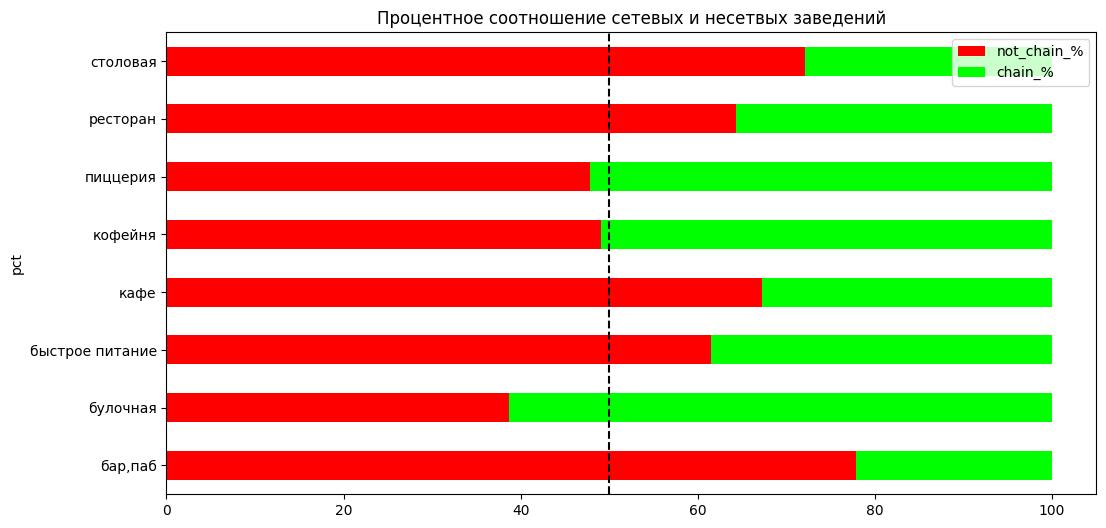

In [ ]:
print('Процентное соотношение сетевых и несетвых заведений')
display(category_chain_count[['not_chain_%','chain_%']].sort_index(ascending=False))
category_chain_count[['not_chain_%','chain_%']].plot(kind = 'barh', stacked=True,figsize=(12,6),color=['red','lime'],ylabel='pct')
plt.axvline(x=50,linestyle='--', color='black')
plt.title('Процентное соотношение сетевых и несетвых заведений')
plt.xlabel='pct'

**Вывод:**

Из таблиц и графиков сверху можно сделать вывод, что во всех случаях кроме пиццерий, кофеен и булочных количество несетевых заведений больше.

### Рассмотрим топ 15 самый популярных заведений:

In [ ]:
popular=data.query('chain==1').pivot_table(index='name',values='address',aggfunc='count').sort_values(by='address',ascending=False)
popular.columns=['count']
popular=popular.head(15)
popular['number']=range(1,popular.shape[0]+1)
popular=popular.reset_index().set_index('number')
print('Выведем таблицу с самыми популярными сетями в Москве:')
popular

Выведем таблицу с самыми популярными сетями в Москве:


name  count
number                         
1            шоколадница    120
2           яндекс.лавка    116
3         домино'с пицца     76
4             додо пицца     74
5       one price coffee     71
6                  cofix     65
7                  prime     50
8             хинкальная     44
9               кофепорт     42
10               теремок     38
11               чайхана     37
12               буханка     32
13              cofefest     32
14        wild bean cafe     27
15                 му-му     27

Данные сети существют в реальном мире. Я знаю сети с номерами: 1-7, 10, 11, 13 и 15.

Выведем датасет но только с 15-ю популярными сетевыми заведениями:

In [ ]:
popular_data=data[data['name'].isin(popular['name'])]
popular_data.head(3)

name  category                                 address  \
13     буханка  булочная    Москва, Базовская улица, 15, корп. 1   
23     буханка  булочная          Москва, Лобненская улица, 13к2   
32  додо пицца  пиццерия  Москва, Коровинское шоссе, 23, корп. 1   

                           district                   hours        lat  \
13  Северный административный округ  ежедневно, 08:00–22:00  55.877007   
23  Северный административный округ  ежедневно, 08:00–22:00  55.888421   
32  Северный административный округ  ежедневно, 09:00–23:00  55.877388   

          lng  rating price            avg_bill  middle_avg_bill  \
13  37.504980     4.8   NaN                 NaN              NaN   
23  37.527106     4.7   NaN                 NaN              NaN   
32  37.523334     4.3   NaN  Средний счёт:328 ₽            328.0   

    middle_coffee_cup  chain  seats             street    street111 is_24/7  
13                NaN      1    180    улица Базовская    Базовская   False  
23                NaN      1   <NA>   улица Лобненская   Лобненская   False  
32                NaN      1     46  шоссе Коровинское  Коровинское   False

In [ ]:
name_category_count_popular=popular_data.pivot_table(index='name',columns='category',values='seats',aggfunc='count')
name_category_count_popular['sum_x_old']=name_category_count_popular.sum(axis=1)
name_category_count_popular=name_category_count_popular.sort_values(by='sum_x_old')
name_category_count_popular=name_category_count_popular.drop(columns='sum_x_old')

print('Построим таблицу количества заведений распределеннх по категориям:')
name_category_count_popular.sum(axis=1).reset_index()

Построим таблицу количества заведений распределеннх по категориям:


name     0
0            буханка   9.0
1           cofefest  10.0
2     wild bean cafe  10.0
3            чайхана  19.0
4              му-му  20.0
5           кофепорт  23.0
6            теремок  27.0
7         хинкальная  32.0
8              prime  33.0
9              cofix  36.0
10  one price coffee  53.0
11        додо пицца  62.0
12    домино'с пицца  62.0
13      яндекс.лавка  73.0
14       шоколадница  83.0

In [ ]:
sns.set(font_scale=1.4)

Отобразим диаграмму сетей по количеству мест и доли в различных категриях:


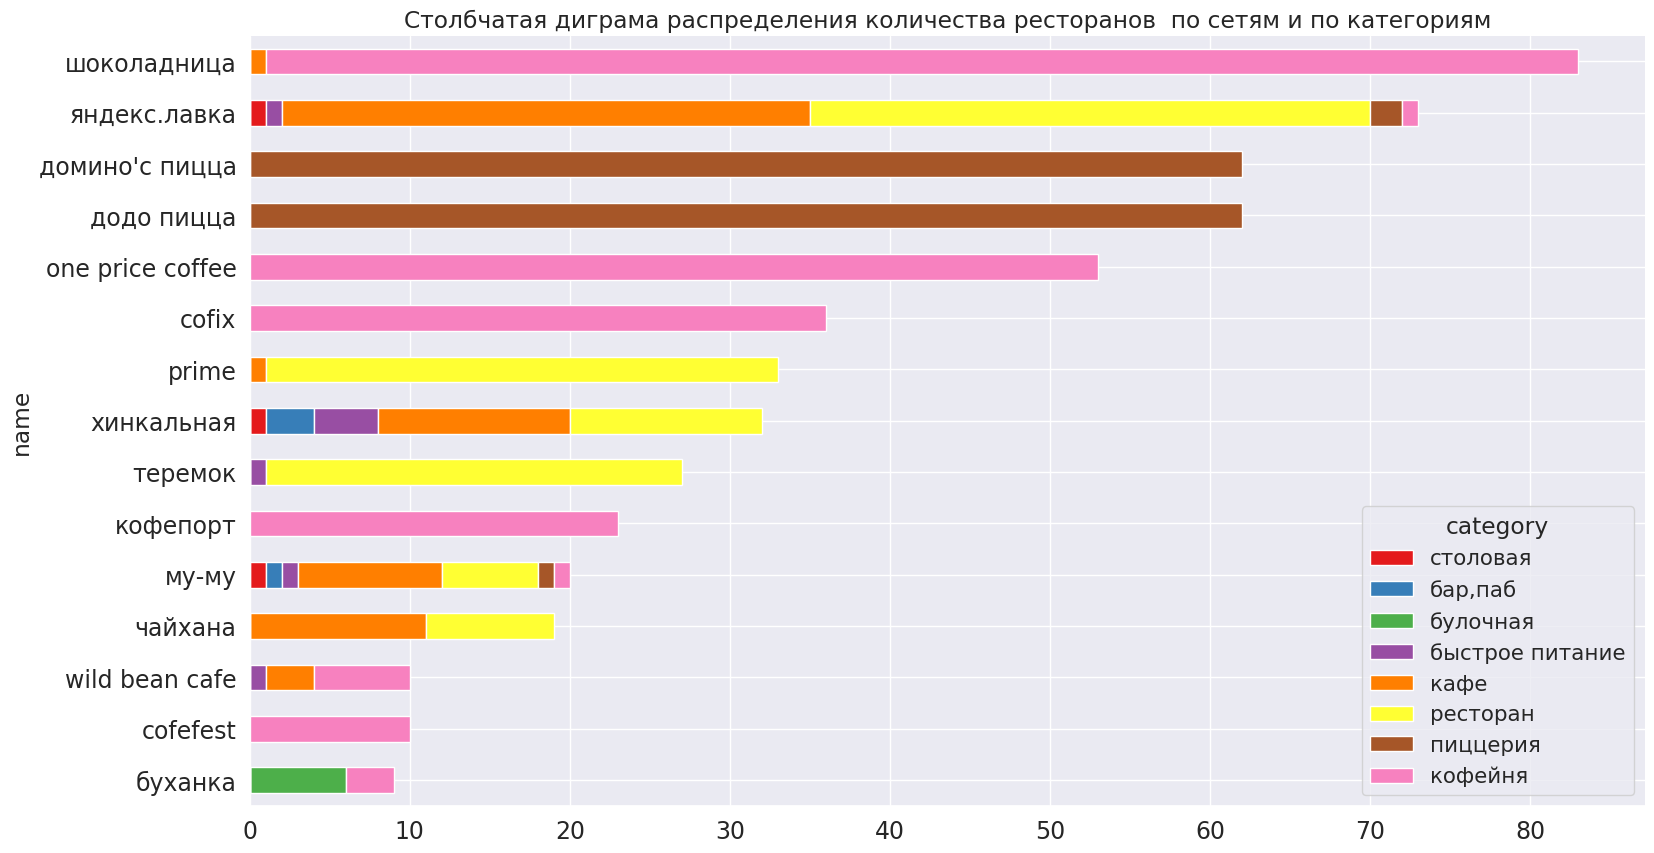

In [ ]:
name_category_count_popular.loc['sum_y',:]=name_category_count_popular.sum(axis=0)
name_category_count_popular=name_category_count_popular.sort_values(by='sum_y',axis=1,ascending=True)
name_category_count_popular=name_category_count_popular.drop(index='sum_y')
print('Отобразим диаграмму сетей по количеству мест и доли в различных категриях:')
sns.set_palette('Set1')
name_category_count_popular.plot(kind='barh',stacked=True,figsize=(18,10),fontsize=17,title='Столбчатая диграма распределения количества ресторанов  по сетям и по категориям')
sns.despine()

In [ ]:
fig=go.Figure(go.Pie(labels=name_category_count_popular.index,values=name_category_count_popular.sum(axis=1)))
fig.update_layout(title='Круговая диаграмма доли по сетям',
                 annotations=[dict(x=1.2,
                                   y=1.05,
                                   text='Популярные сети:',
                                  showarrow=False)])

In [ ]:
name_category_count_popular.loc['sum_y']=name_category_count_popular.sum()
name_category_count_popular=name_category_count_popular.fillna(0).sort_values(by='sum_y',axis=1,ascending=False)
name_category_count_popular=name_category_count_popular.astype('int')
name_category_count_popular.loc['pct',:]=round(name_category_count_popular.loc['sum_y',:]/name_category_count_popular.loc['sum_y',:].sum()*100,2)
name_category_count_popular=name_category_count_popular.sort_values(by='sum_y',axis=1,ascending=False)
print()
print('Данная таблица поможет отобразит свзяь количество сетей в категоряих')
name_category_count_popular


Данная таблица поможет отобразит свзяь количество сетей в категоряих


category          кофейня  пиццерия  ресторан   кафе  быстрое питание  \
name                                                                    
буханка              3.00      0.00      0.00   0.00             0.00   
cofefest            10.00      0.00      0.00   0.00             0.00   
wild bean cafe       6.00      0.00      0.00   3.00             1.00   
чайхана              0.00      0.00      8.00  11.00             0.00   
му-му                1.00      1.00      6.00   9.00             1.00   
кофепорт            23.00      0.00      0.00   0.00             0.00   
теремок              0.00      0.00     26.00   0.00             1.00   
хинкальная           0.00      0.00     12.00  12.00             4.00   
prime                0.00      0.00     32.00   1.00             0.00   
cofix               36.00      0.00      0.00   0.00             0.00   
one price coffee    53.00      0.00      0.00   0.00             0.00   
додо пицца           0.00     62.00      0.00   0.00             0.00   
домино'с пицца       0.00     62.00      0.00   0.00             0.00   
яндекс.лавка         1.00      2.00     35.00  33.00             1.00   
шоколадница         82.00      0.00      0.00   1.00             0.00   
sum_y              215.00    127.00    119.00  70.00             8.00   
pct                 38.95     23.01     21.56  12.68             1.45   

category          булочная  бар,паб  столовая  
name                                           
буханка               6.00     0.00      0.00  
cofefest              0.00     0.00      0.00  
wild bean cafe        0.00     0.00      0.00  
чайхана               0.00     0.00      0.00  
му-му                 0.00     1.00      1.00  
кофепорт              0.00     0.00      0.00  
теремок               0.00     0.00      0.00  
хинкальная            0.00     3.00      1.00  
prime                 0.00     0.00      0.00  
cofix                 0.00     0.00      0.00  
one price coffee      0.00     0.00      0.00  
додо пицца            0.00     0.00      0.00  
домино'с пицца        0.00     0.00      0.00  
яндекс.лавка          0.00     0.00      1.00  
шоколадница           0.00     0.00      0.00  
sum_y                 6.00     4.00      3.00  
pct                   1.09     0.72      0.54


Хитмап нагляднее отобразит эту таблцу:


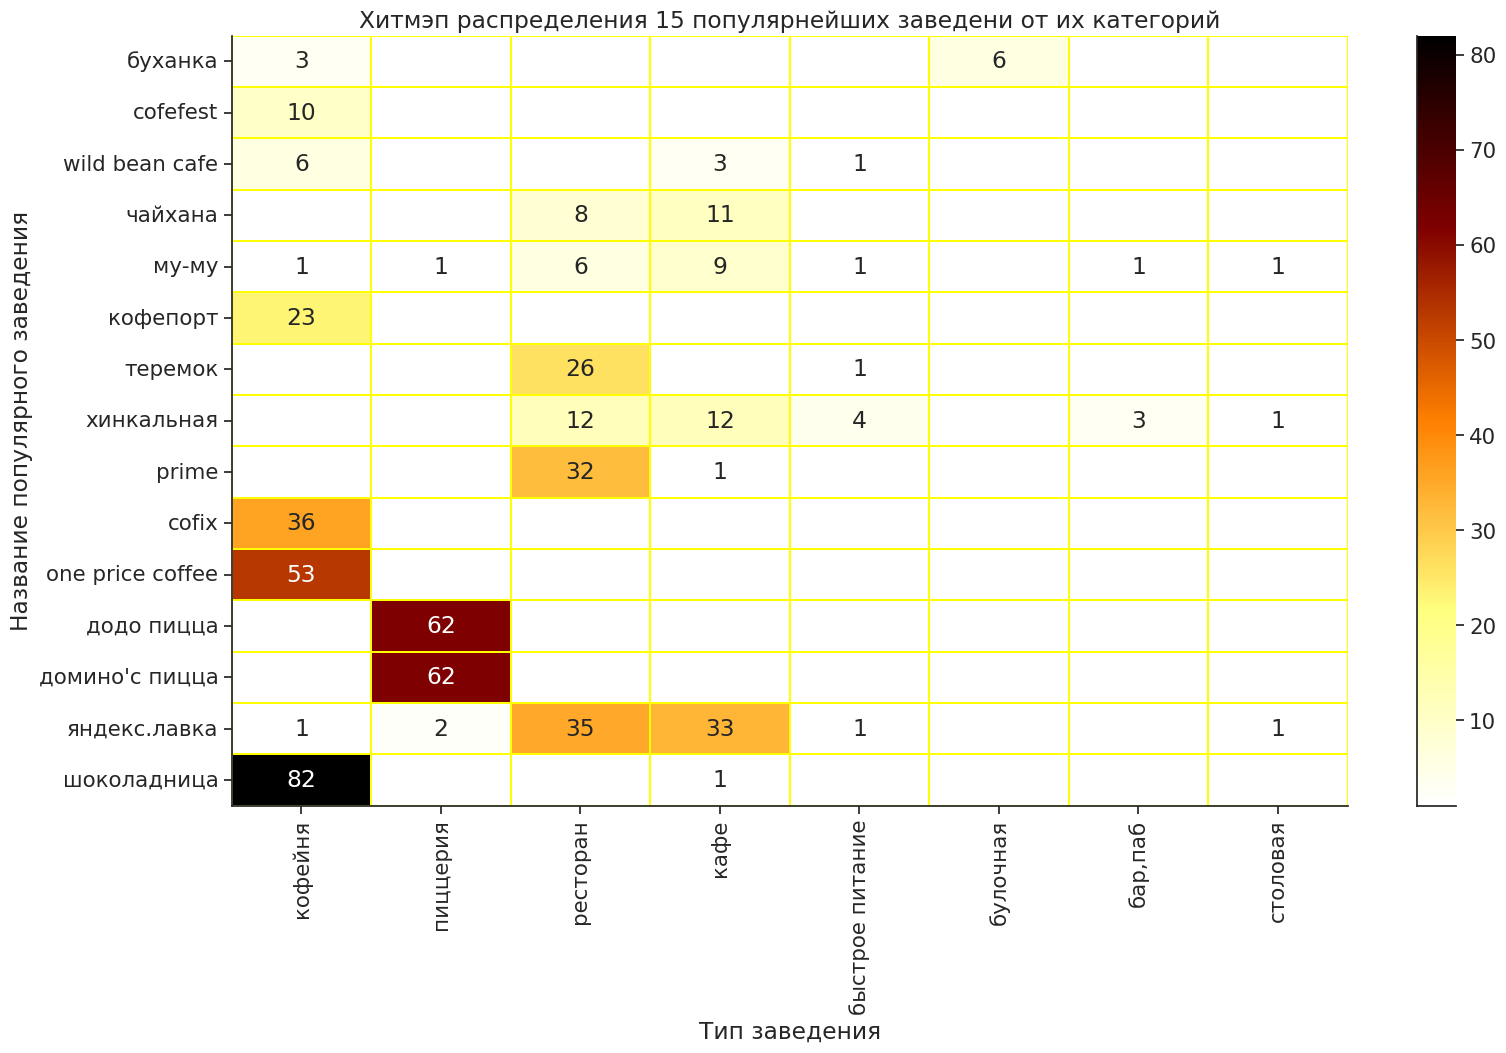

In [ ]:
for x in name_category_count_popular.columns:
    for y in name_category_count_popular.index:
        if name_category_count_popular.loc[y,x]==0:
            name_category_count_popular.loc[y,x]=None
print()
print('Хитмап нагляднее отобразит эту таблцу:')
sns.set_style('ticks')
plt.figure(figsize=(18,10))
ax=sns.heatmap(name_category_count_popular.drop(index=['sum_y','pct']),cmap='afmhot_r',annot=True,color='red',fmt='.6g',linewidths=0.005, linecolor='yellow')
ax.set(title = "Хитмэп распределения 15 популярнейших заведени от их категорий",
      xlabel='Тип заведения',
      ylabel='Название популярного заведения')

sns.despine()


___

**Далее выведем как распределются популярные сетевые  заведения по категорям безотносительно распределений по самим сетям**

In [ ]:
fig=go.Figure(go.Pie(labels=name_category_count_popular.columns,values=name_category_count_popular.loc['sum_y',:]))
fig.update_layout(title='Круговая диаграмма доли популярных сетевых заведений по категоряим',
                 annotations=[dict(x=1.14,
                                   y=1.05,
                                   text='Категории:',
                                  showarrow=False)])

In [ ]:
fig=px.bar(name_category_count_popular.T,y='sum_y',x=name_category_count_popular.columns)
fig.update_layout(
    yaxis_title="Количествоа заведений",
    xaxis_title="Тип заведения",
    title='Количество популярных сетевых заведений по категориям')
fig.show()

In [ ]:
pct=0
count=0
for x in range(0,len(name_category_count_popular.columns)):
    if x+1<=4:
        pct=pct+name_category_count_popular.loc['pct',name_category_count_popular.columns[x]]
        count=count+name_category_count_popular.loc['sum_y',name_category_count_popular.columns[x]]
print('Первые 4 (половина или ',round(4/len(name_category_count_popular.columns)*100)
      ,'%) категорий заведений, отсортированных от большего к меньшиму по количеству ',popular.shape[0],
      'самых популярных заведений занимают',round(pct,2),
      '% от всех таких заведений. Или другими словами',count,'из',name_category_count_popular.loc['sum_y',:].sum(),'заведений.')
print()
print('Выведем 4 самые популярные категории:')
for x in range(0,len(name_category_count_popular.columns)):
    if x+1<=4:
        print(x+1, '-' ,name_category_count_popular.columns[x])

Первые 4 (половина или  50 %) категорий заведений, отсортированных от большего к меньшиму по количеству  15 самых популярных заведений занимают 96.2 % от всех таких заведений. Или другими словами 531.0 из 552.0 заведений.

Выведем 4 самые популярные категории:
1 - кофейня
2 - пиццерия
3 - ресторан
4 - кафе


### **Далее рассмотрим информацию об округах Москвы:**

In [ ]:
print('В датасете представлены следующие ',data['district'].unique().shape[0],' районов (округов):')
print()
for x in range(0,len(data['district'].unique())):
    print('* -' ,data['district'].unique()[x])

В датасете представлены следующие  9  районов (округов):

* - Северный административный округ
* - Северо-Восточный административный округ
* - Северо-Западный административный округ
* - Западный административный округ
* - Центральный административный округ
* - Восточный административный округ
* - Юго-Восточный административный округ
* - Южный административный округ
* - Юго-Западный административный округ


Представлены все 9 районов внутри МКАДа.

In [ ]:
district_category=data.pivot_table(index='district',columns='category',values='name',aggfunc='count')
district_category=district_category.astype('int')
district_category['sum_x']=district_category.sum(axis=1)
district_category=district_category.sort_values(by='sum_x',ascending=False)
district_category=district_category.drop(columns='sum_x')
district_category.loc['sum_y',:]=district_category.sum(axis=0)
district_category=district_category.sort_values(by='sum_y',ascending=False,axis=1)
district_category=district_category.drop(index='sum_y')
district_category

category                                  кафе  ресторан  кофейня  бар,паб  \
district                                                                     
Центральный административный округ       464.0     670.0    428.0    364.0   
Северный административный округ          235.0     189.0    193.0     68.0   
Южный административный округ             264.0     202.0    131.0     68.0   
Северо-Восточный административный округ  269.0     182.0    159.0     63.0   
Западный административный округ          239.0     218.0    150.0     50.0   
Восточный административный округ         272.0     160.0    105.0     53.0   
Юго-Восточный административный округ     282.0     145.0     89.0     38.0   
Юго-Западный административный округ      238.0     168.0     96.0     38.0   
Северо-Западный административный округ   115.0     109.0     62.0     23.0   

category                                 пиццерия  быстрое питание  столовая  \
district                                                                       
Центральный административный округ          113.0             87.0      66.0   
Северный административный округ              77.0             58.0      41.0   
Южный административный округ                 73.0             85.0      44.0   
Северо-Восточный административный округ      68.0             82.0      40.0   
Западный административный округ              71.0             62.0      24.0   
Восточный административный округ             72.0             71.0      40.0   
Юго-Восточный административный округ         55.0             67.0      25.0   
Юго-Западный административный округ          64.0             61.0      17.0   
Северо-Западный административный округ       40.0             30.0      18.0   

category                                 булочная  
district                                           
Центральный административный округ           50.0  
Северный административный округ              39.0  
Южный административный округ                 25.0  
Северо-Восточный административный округ      28.0  
Западный административный округ              37.0  
Восточный административный округ             25.0  
Юго-Восточный административный округ         13.0  
Юго-Западный административный округ          27.0  
Северо-Западный административный округ       12.0

In [ ]:
fig=go.Figure(go.Pie(labels=district_category.columns,values=district_category.sum()))
fig.update_layout(title='Распределение заведений по категориям',
                 annotations=[dict(x=1.12,
                                   y=1.05,
                                   text='Категории:',
                                  showarrow=False)])

In [ ]:
fig=go.Figure(go.Pie(labels=district_category.index,values=district_category.sum(axis=1)))
fig.update_layout(title='Распределение заведений по округам',
                 annotations=[dict(x=1.18,
                                   y=1.05,
                                   text='Округа:',
                                  showarrow=False)])

Хорошо будет продемонстрировать информацию о распределени количества заведений по округам и категорям **хитмэпом:**

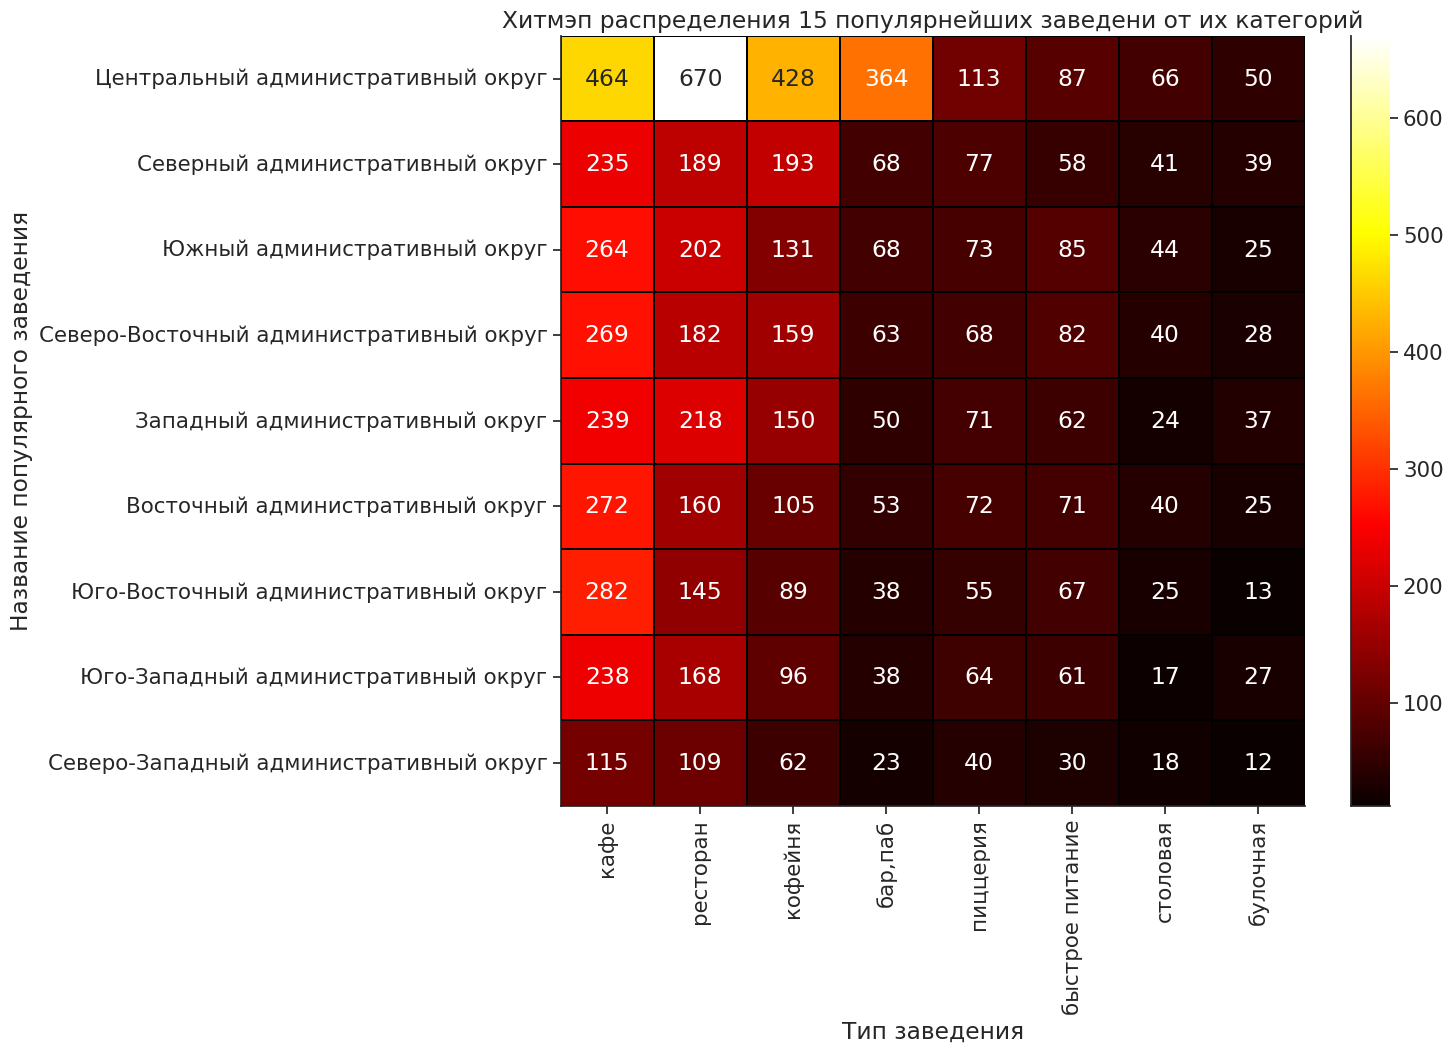

In [ ]:
plt.figure(figsize=(12, 10))

ax=sns.heatmap(district_category,cmap='hot',annot=True,fmt='.6g',linewidths=0.005, linecolor='black')
ax.set(title ="Хитмэп распределения 15 популярнейших заведени от их категорий",
      xlabel='Тип заведения',
      ylabel='Название популярного заведения')
sns.despine()

In [ ]:
sns.set(font_scale=1.4)

Отобразим диаграмму округов по количеству мест и их доли в различных категриях:


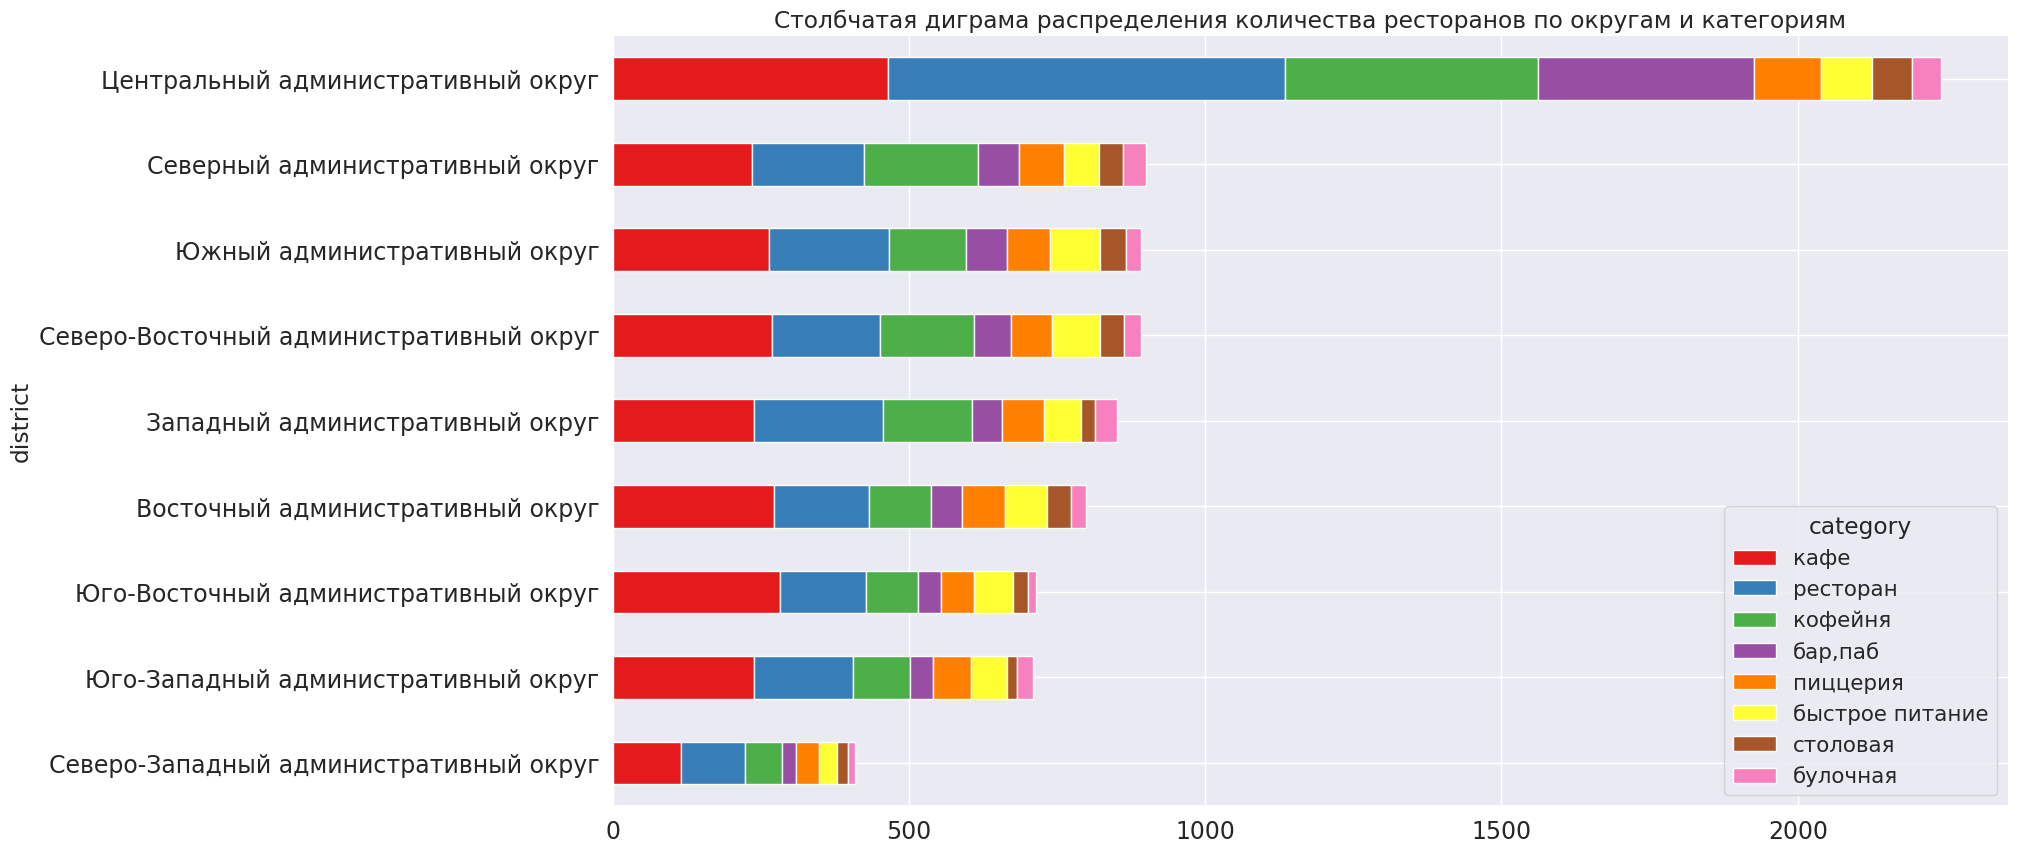

In [ ]:
district_category['sum_x']=district_category.sum(axis=1)
district_category=district_category.sort_values(by='sum_x',ascending=True)
district_category=district_category.drop(columns='sum_x')
print('Отобразим диаграмму округов по количеству мест и их доли в различных категриях:')
sns.set_palette('Set1')
district_category.plot(kind='barh',stacked=True,figsize=(18,10),fontsize=17,title='Столбчатая диграма распределения количества ресторанов по округам и категориям')
sns.despine()

Большая концентрация заведений в центре города. Так же в центре наиболольшую долю занимают рестораны, но в других частях Москвы это кафе. Все, АО кроме ЦАО примерно похожи, но  СЗАО немного отстает по количеству заведений.

### Визуализируем распределение средних рейтингов  по категориям:

In [ ]:
rating_category=data.pivot_table(index='rating',columns='category',values='name',
                 aggfunc='count').sort_index(ascending=False).fillna(0)
display(rating_category.head(3))
display(rating_category.tail(3))

category  бар,паб  булочная  быстрое питание  кафе  кофейня  пиццерия  \
rating                                                                  
5.0           7.0       1.0              6.0  30.0     37.0       7.0   
4.9          27.0       9.0              9.0  77.0     37.0      22.0   
4.8          32.0       5.0             10.0  65.0     29.0      16.0   

category  ресторан  столовая  
rating                        
5.0           15.0       2.0  
4.9           51.0      11.0  
4.8           53.0       5.0

category  бар,паб  булочная  быстрое питание  кафе  кофейня  пиццерия  \
rating                                                                  
1.2           0.0       0.0              0.0   1.0      0.0       0.0   
1.1           1.0       0.0              2.0   7.0      0.0       0.0   
1.0           0.0       0.0              0.0   5.0      0.0       1.0   

category  ресторан  столовая  
rating                        
1.2            0.0       0.0  
1.1            4.0       0.0  
1.0            3.0       1.0

<Figure size 640x480 with 0 Axes>

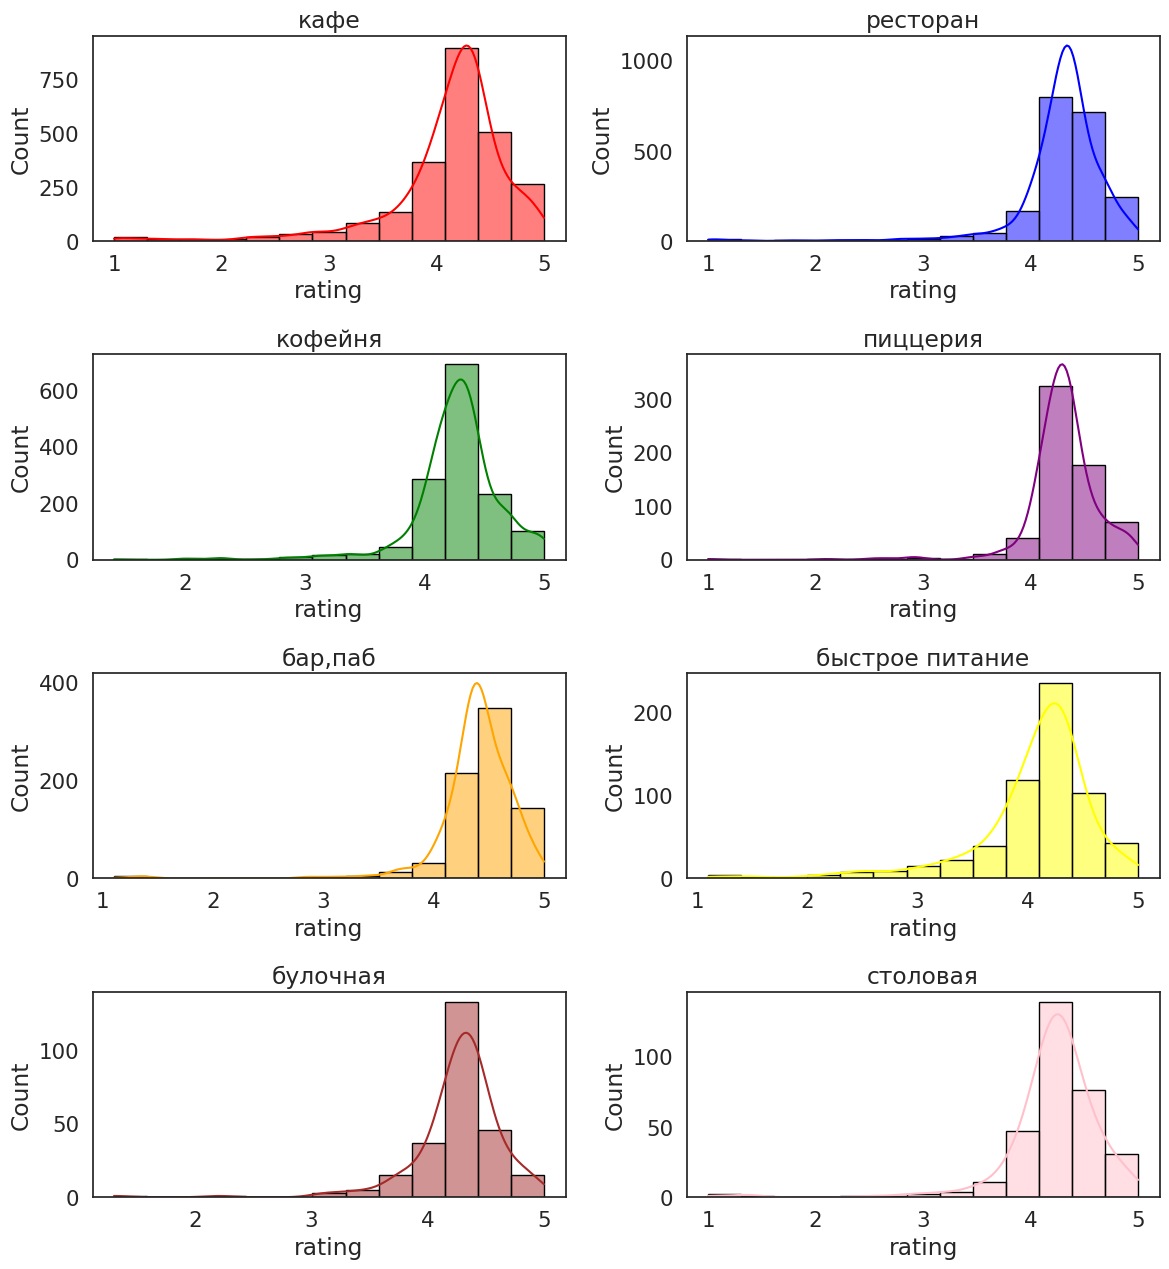

In [ ]:
sns.set_palette('coolwarm')
sns.set_style('white')
plt.suptitle("suptitle")
col=['red','blue','green','purple','orange','yellow','brown','pink']
plt.figure(figsize=(12, 13))
for b in data['category'].unique():
    sns.set_style('white')
    axn=[i for i in range(0, len(data['category'].unique())) if data['category'].unique()[i]==b][0]
    ax=sns.histplot(data = data[data['category']==b],x='rating', bins=13,ax=plt.subplot(4,2,axn+1),kde =True,color=col[axn],edgecolor='black')
    ax.set(title=b)
    plt.tight_layout()

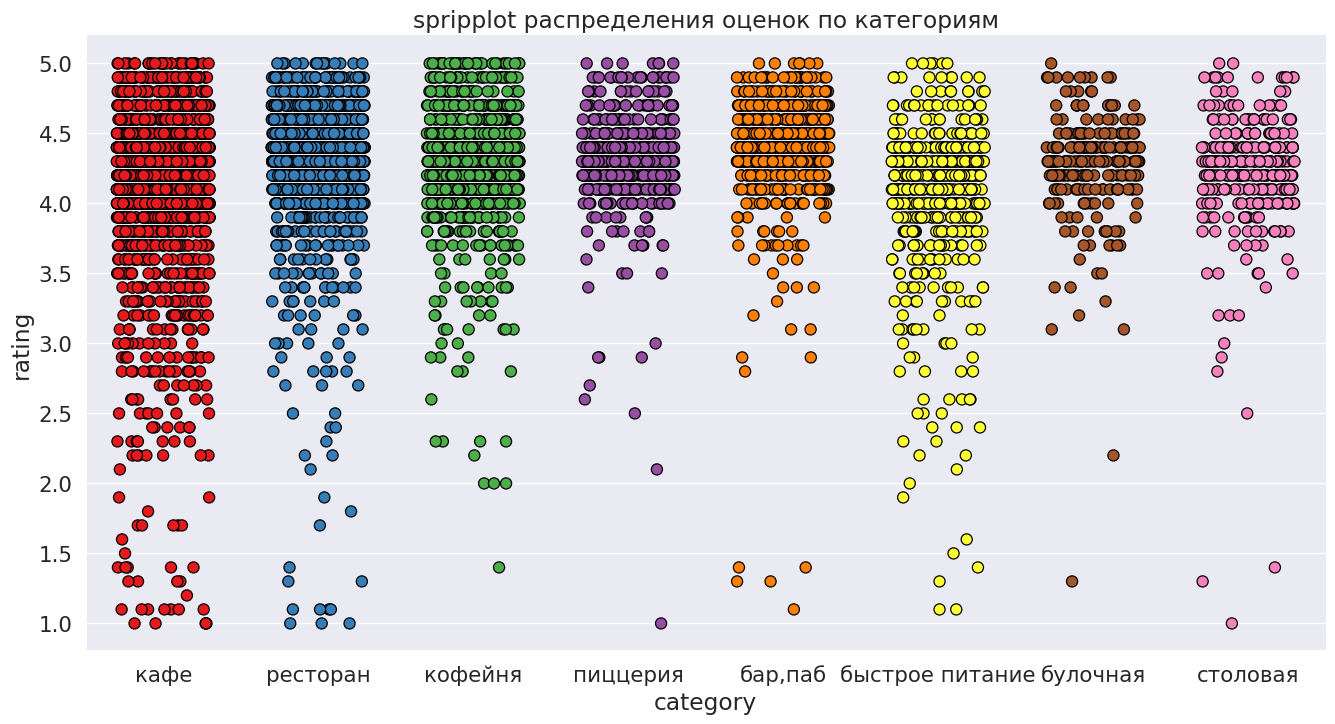

In [ ]:
plt.figure(figsize=(16, 8))
sns.set_style('darkgrid')
ax = sns.stripplot(x='category', y='rating', data=data, jitter=0.3 , palette='Set1',edgecolor='black',linewidth=0.9, s = 8)
ax.tick_params(axis='x')
ax.set(title='spripplot распределения оценок по категориям')
sns.despine()

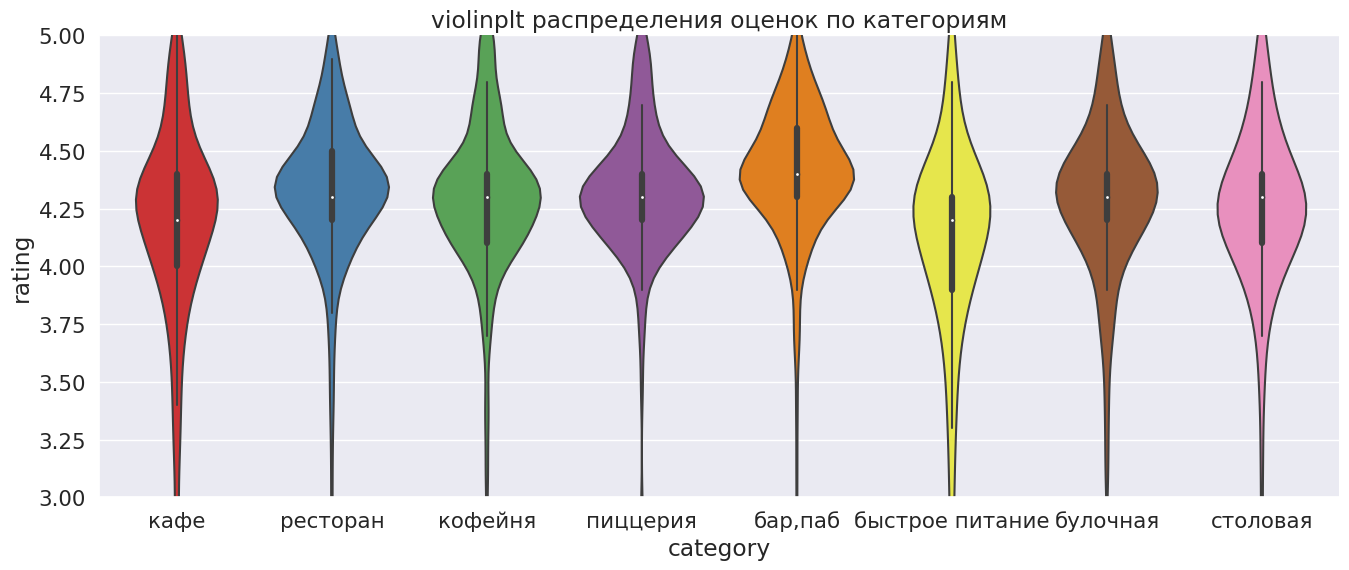

In [ ]:
plt.figure(figsize=(16, 6))
ax=sns.violinplot(x='category', y='rating', data=data, palette='Set1')
ax.set(title='violinplt распределения оценок по категориям')
plt.ylim(3, 5)
sns.despine()

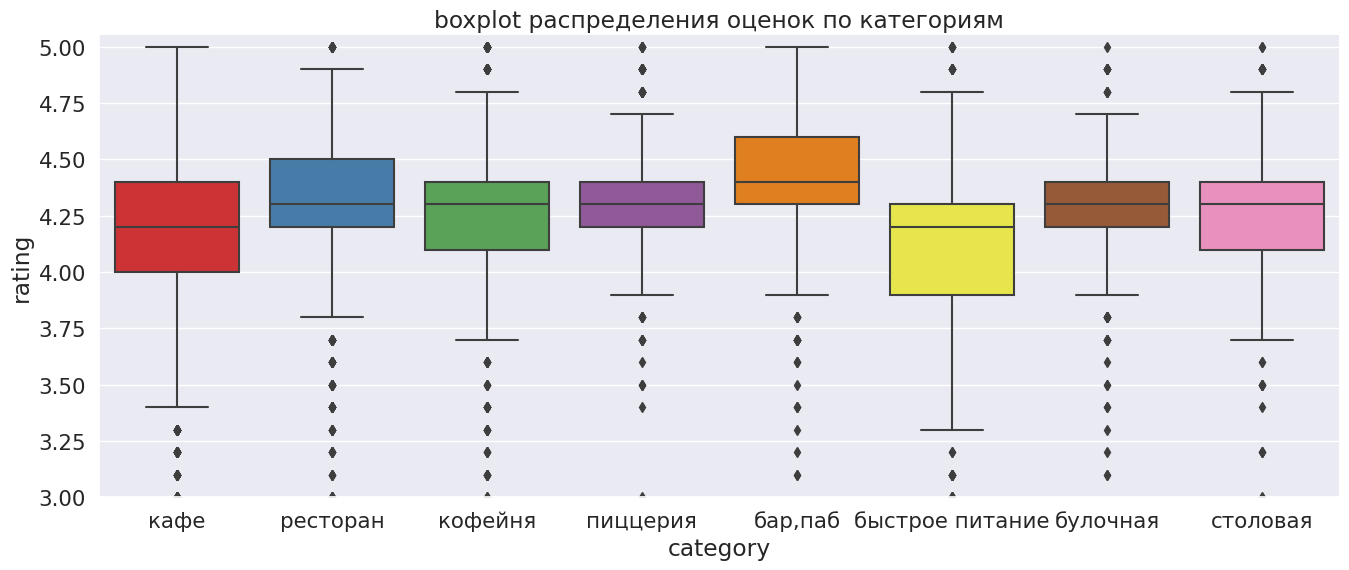

In [ ]:
plt.figure(figsize=(16, 6))
ax=sns.boxplot(x='category', y='rating', data=data, palette='Set1')
ax.set(title='boxplot распределения оценок по категориям')
plt.ylim(3, 5.05)
sns.despine()

**Вывод:**

Средние оценки для всех категорий находятся в пределах 4-4,5. Можно сказать что они не сильно отличаются.

In [ ]:
district_rating=data.pivot_table(index='district',values='rating',aggfunc=['mean','median']).reset_index()
district_rating=round(district_rating,3)
district_rating=district_rating.set_index(district_rating.index+1)
district_rating.columns=['district','mean_r','median_r']
print()
print('Выведем таблицу средних и медианных оценок по округам:')
district_rating


Выведем таблицу средних и медианных оценок по округам:


district  mean_r  median_r
1         Восточный административный округ   4.174       4.3
2          Западный административный округ   4.182       4.3
3          Северный административный округ   4.240       4.3
4  Северо-Восточный административный округ   4.148       4.2
5   Северо-Западный административный округ   4.209       4.3
6       Центральный административный округ   4.378       4.4
7     Юго-Восточный административный округ   4.101       4.2
8      Юго-Западный административный округ   4.173       4.3
9             Южный административный округ   4.184       4.3

### Построим хороплет среднего рейтинга по округам Москвы:

In [ ]:
# читаем файл и сохраняем в переменной
with open('/content/drive/MyDrive/Практикум/admin_level_geomap.geojson', 'r') as f:
    geo_json = json.load(f)

print(json.dumps(geo_json, indent=2, ensure_ascii=False, sort_keys=True)[0:200])

{
  "features": [
    {
      "geometry": {
        "coordinates": [
          [
            [
              [
                37.8756653,
                55.825342400000004
              ],
         


In [ ]:
# загружаем JSON-файл с границами округов Москвы
state_geo = '/content/drive/MyDrive/Практикум/admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=9)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=district_rating,
    columns=['district', 'mean_r'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)
print()
print('Отобразим хороплет средних рейтингов по округам:')
m


Отобразим хороплет средних рейтингов по округам:


Получилось визуализировать данные на карте, ведь так быстрее разобраться какая ситуация в каком округе в зависимости от показателя.   
</div>

### Отобразим все заведения общепита Москвы с их средним рейтингом на карте с кластеризацией:

In [ ]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data.apply(create_clusters, axis=1)
print()
print('Отобразим хороплет рейтингов заведений с кластеризацией для экономии ресурсов:')
# выводим карту
m

Output hidden; open in https://colab.research.google.com to view.

____

Кластеры не сильно нагружают график из-за своей сгруппированности. Если убрать кластеры, то тетрадка будет работать тяжело из-за отображения буквально каждой точки на карте.
    
</div>

### **Проанализируем самые популярные улицы (15 лидеров ко количеству заведений на них).**

In [ ]:
street_count=data.pivot_table(index='street',values='name',aggfunc='count')
street_count.columns=['count']
street_count=street_count.sort_values(by='count',ascending=False)
street_count=street_count.reset_index()
street_count=street_count.set_index(street_count.index+1)
print()
print('Выведем таблицу количества заведений на каждой из 15 популярных улиц:')
street_count.head(15)


Выведем таблицу количества заведений на каждой из 15 популярных улиц:


street  count
1            проспект Мира    184
2        улица Профсоюзная    122
3     проспект Вернадского    108
4       проспект Ленинский    107
5   проспект Ленинградский     95
6        шоссе Дмитровское     88
7          шоссе Каширское     77
8         шоссе Варшавское     76
9      шоссе Ленинградское     70
10                    МКАД     65
11        улица Люблинская     60
12          улица Вавилова     55
13    проспект Кутузовский     54
14    улица Миклухо-Маклая     49
15         улица Пятницкая     48

In [ ]:
popular_street_data=data[data['street'].isin(street_count.head(15)['street'].values)]
print()
print('Выведем датасет, но только с популярными улицами:')
popular_street_data.head(3)


Выведем датасет, но только с популярными улицами:


name  category                                   address  \
8          donna maria  ресторан   Москва, Дмитровское шоссе, 107, корп. 4   
12            заправка      кафе            Москва, МКАД, 80-й километр, 1   
17  чайхана беш-бармак  ресторан  Москва, Ленинградское шоссе, 71Б, стр. 2   

                           district                     hours        lat  \
8   Северный административный округ    ежедневно, 10:00–22:00  55.880045   
12  Северный административный округ         вт-сб 09:00–18:00  55.899938   
17  Северный административный округ  ежедневно, круглосуточно  55.876908   

          lng  rating    price                avg_bill  middle_avg_bill  \
8   37.539006     4.8  средние   Средний счёт:от 500 ₽            500.0   
12  37.517958     4.3  средние      Средний счёт:330 ₽            330.0   
17  37.449876     4.4  средние  Средний счёт:350–500 ₽            425.0   

    middle_coffee_cup  chain  seats               street      street111  \
8                 NaN      0     79    шоссе Дмитровское    Дмитровское   
12                NaN      0   <NA>                 МКАД           МКАД   
17                NaN      0     96  шоссе Ленинградское  Ленинградское   

   is_24/7  
8    False  
12   False  
17    True

In [ ]:
popular_street_category=popular_street_data.pivot_table(index='street',columns='category',values='name',aggfunc='count')
popular_street_category=popular_street_category.fillna(0).astype('int')
popular_street_category['sum_x']=popular_street_category.sum(axis=1)
popular_street_category=popular_street_category.sort_values(by='sum_x',axis=0,ascending=False)
popular_street_category=popular_street_category.drop(columns='sum_x')
#----------------------
popular_street_category.loc['sum_y',:]=popular_street_category.sum(axis=0)
popular_street_category=popular_street_category.sort_values(by='sum_y',axis=1,ascending=False)
popular_street_category=popular_street_category.drop(index='sum_y')
popular_street_category=popular_street_category.astype('int')
print()
print('Отобразим таблицу распределения количества заведений по популярными улицам и категориям:')
popular_street_category


Отобразим таблицу распределения количества заведений по популярными улицам и категориям:


category                кафе  ресторан  кофейня  быстрое питание  бар,паб  \
street                                                                      
проспект Мира             53        45       36               21       12   
улица Профсоюзная         35        26       18               15        6   
проспект Вернадского      25        33       16               12        7   
проспект Ленинский        26        33       23                2       10   
проспект Ленинградский    12        25       25                2       15   
шоссе Дмитровское         23        24       11               10        6   
шоссе Каширское           20        19       16               10        2   
шоссе Варшавское          18        20       14                7        6   
шоссе Ленинградское       13        26       13                5        5   
МКАД                      45         5        4                9        1   
улица Люблинская          26        10       11                5        5   
улица Вавилова            15        12       10               11        2   
проспект Кутузовский      14        16       13                2        2   
улица Миклухо-Маклая      21        15        4                4        3   
улица Пятницкая            7        18        6                2        9   

category                пиццерия  столовая  булочная  
street                                                
проспект Мира                 11         2         4  
улица Профсоюзная             15         3         4  
проспект Вернадского          12         2         1  
проспект Ленинский             5         5         3  
проспект Ленинградский         9         3         4  
шоссе Дмитровское              8         4         2  
шоссе Каширское                5         5         0  
шоссе Варшавское               4         7         0  
шоссе Ленинградское            3         3         2  
МКАД                           0         1         0  
улица Люблинская               1         2         0  
улица Вавилова                 3         0         2  
проспект Кутузовский           3         3         1  
улица Миклухо-Маклая           2         0         0  
улица Пятницкая                3         0         3

In [ ]:
fig=go.Figure(go.Pie(labels=popular_street_category.columns,values=popular_street_category.sum()))
fig.update_layout(title='Распределение заведений по категориям',
                 annotations=[dict(x=1.12,
                                   y=1.05,
                                   text='Категории:',
                                  showarrow=False)])

In [ ]:
fig=go.Figure(go.Pie(labels=popular_street_category.index,values=popular_street_category.sum(axis=1)))
fig.update_layout(title='Распределение заведений по категориям',
                 annotations=[dict(x=1.12,
                                   y=1.05,
                                   text='Категории:',
                                  showarrow=False)])

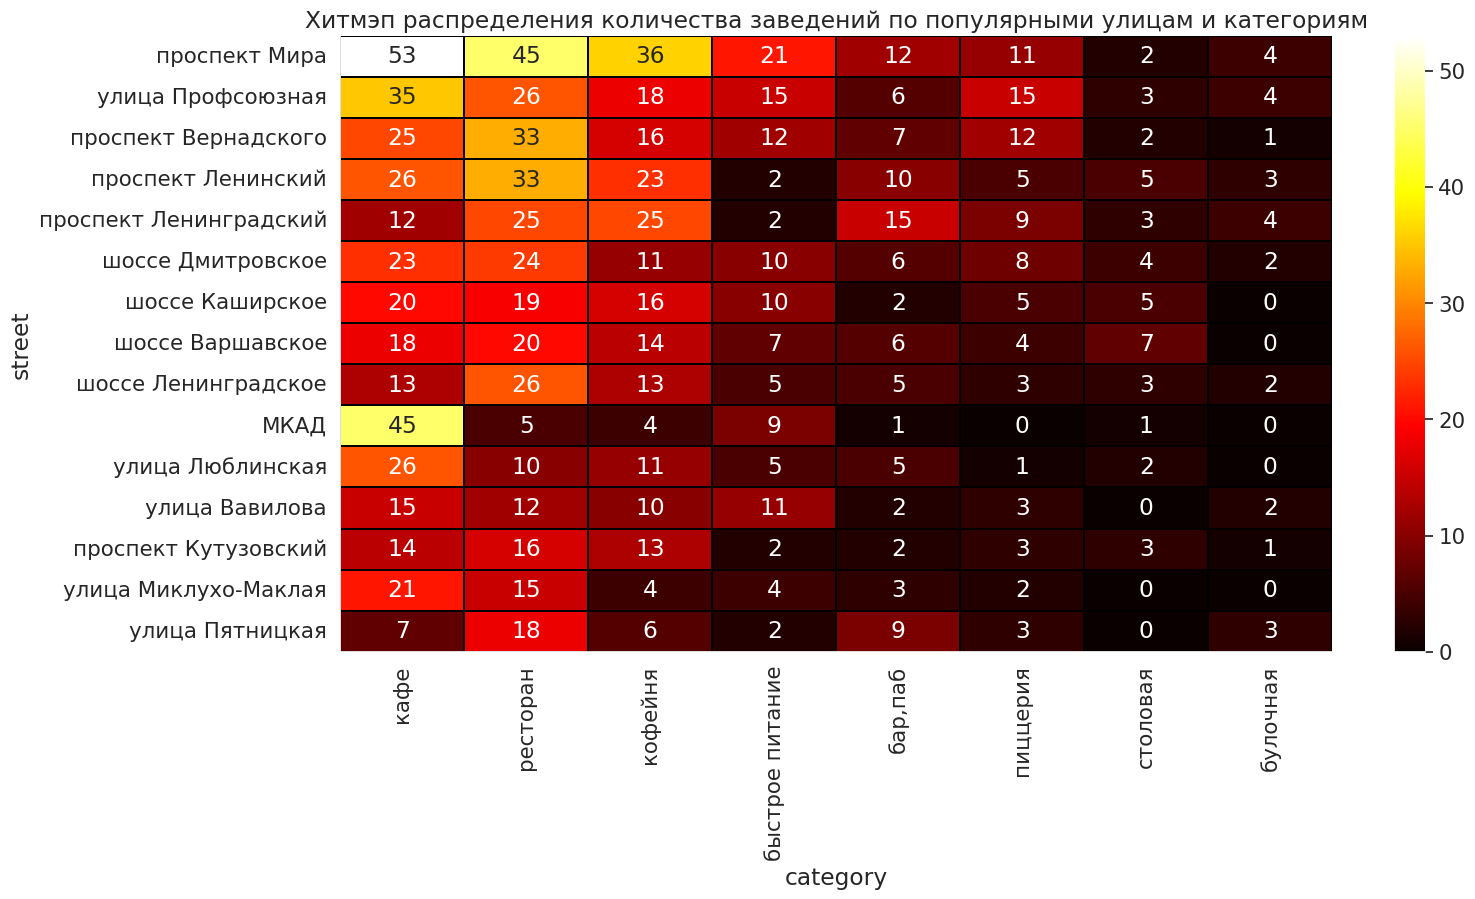

In [ ]:
plt.figure(figsize=(16,8))
ax=sns.heatmap(popular_street_category,cmap='hot',annot=True,linewidths=0.005, linecolor='black')
ax.set(title='Хитмэп распределения количества заведений по популярными улицам и категориям')
sns.despine()

In [ ]:
sns.set(font_scale=1.4)

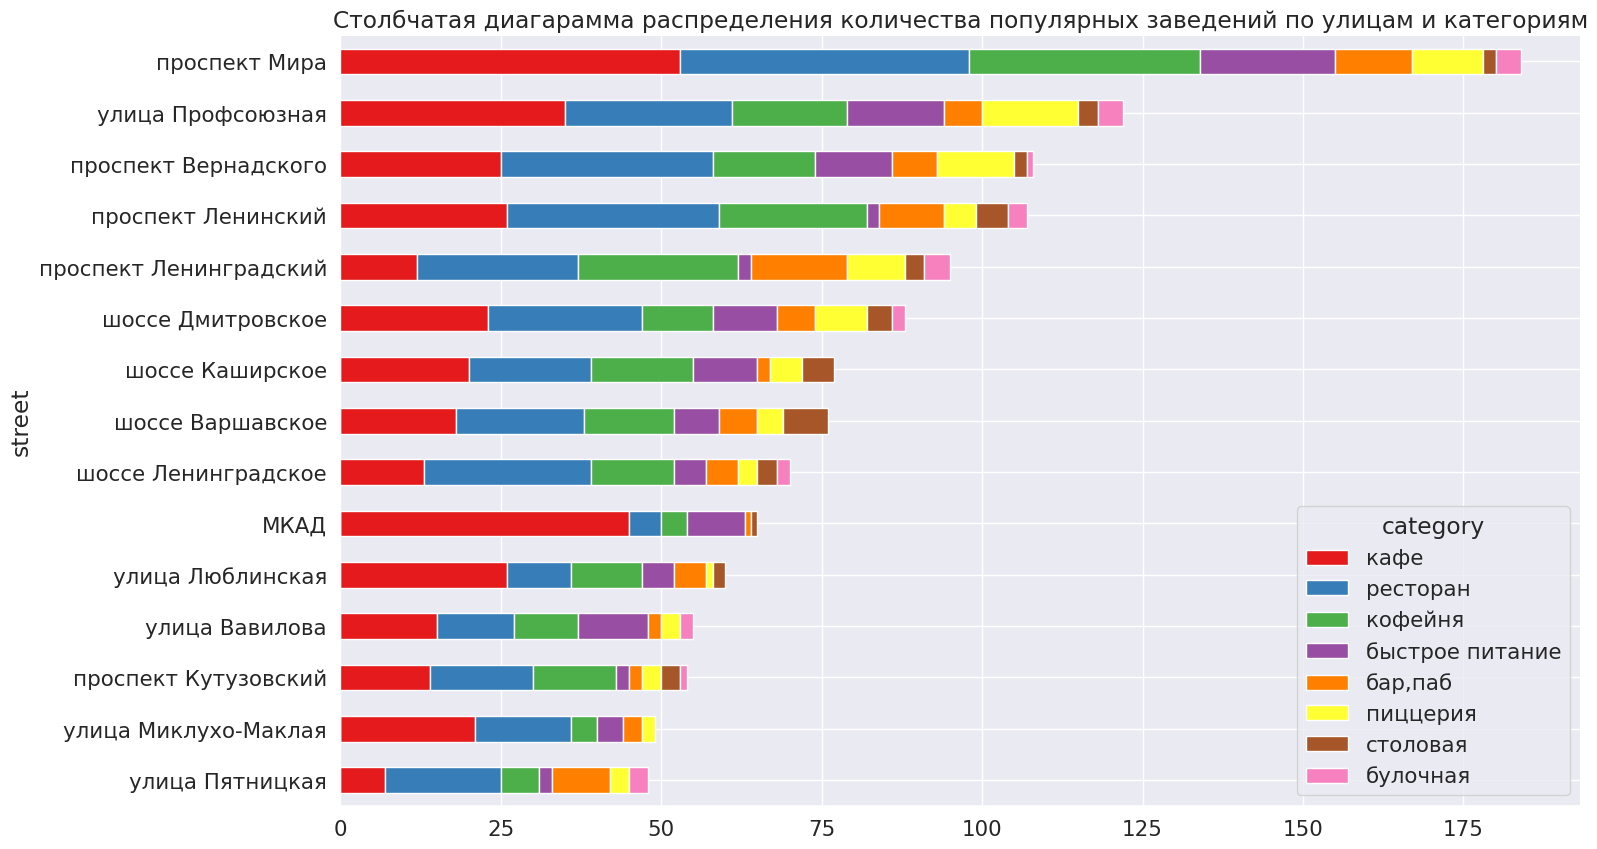

In [ ]:

popular_street_category['sum_x']=popular_street_category.sum(axis=1)
popular_street_category=popular_street_category.sort_values(by='sum_x',axis=0,ascending=True)
popular_street_category=popular_street_category.drop(columns='sum_x')
sns.set_palette('Set1')
popular_street_category.plot(kind='barh',stacked=True,figsize=(16,10),title='Cтолбчатая диагарамма распределения количества популярных заведений по улицам и категориям')
sns.despine()

___

Возможно это улицы такие большие и поэтому в них большое количестов объектов питания
    
</div>

У нас есть топ улиц, исходя из задания. Но, если мы подумаем – то можем ли мы утверждать, что этот топ улиц действительно полезный для реальной задачи ?
    
Было бы интересно посмотреть на плотность заведений на 1 км. и далее ранжировать по этому расчету улицы.
    
</div>

### **Пронализируем улицы с 1 заведением общепита.**

Введем переменную one_cafe_street_data - датасет улиц с одним заведением

In [ ]:
one_cafe_street_data=data[data['street'].isin(street_count.query('count==1')['street'])]
category_one_cafe_street=one_cafe_street_data.pivot_table(index='category',values='name',aggfunc='count')
category_one_cafe_street.columns=['count']
category_one_cafe_street=category_one_cafe_street.sort_values(by='count',ascending=False)
print()
print('Отобразим таблицу количества заведений по категориям с такими заведениями:')
category_one_cafe_street


Отобразим таблицу количества заведений по категориям с такими заведениями:


count
category              
кафе               167
ресторан            94
кофейня             90
бар,паб             41
столовая            37
быстрое питание     25
пиццерия            15
булочная             9

In [ ]:
print()
print('Заведения единственные на своей улице:')
fig=go.Figure(go.Pie(labels=category_one_cafe_street.index,values=category_one_cafe_street['count']))
fig.update_layout(title='Распределение заведений по категориям',
                 annotations=[dict(x=1.15,
                                   y=1.05,
                                   text='Категории:',
                                  showarrow=False)])


Заведения единственные на своей улице:


In [ ]:
print()
print('Заведения единственные на своей улице:')
one_cafe_street_chain=one_cafe_street_data['chain'].value_counts().reset_index()
one_cafe_street_chain.columns=['chain_status','quantity']
one_cafe_street_chain.loc[0,'chain_status']='not_chain_cafe'
one_cafe_street_chain.loc[1,'chain_status']='chain_cafe'
one_cafe_street_chain
fig=go.Figure(go.Pie(labels=one_cafe_street_chain['chain_status'],values=one_cafe_street_chain['quantity']))
fig.update_layout(title='Распределение заведений на сетевые и несетевые',
                 annotations=[dict(x=1.21,
                                   y=1.05,
                                   text='Сетевое заведение?',
                                  showarrow=False)])


Заведения единственные на своей улице:


In [ ]:
print()
print('Заведения единственные на своей улице:')
one_cafe_street_24_on_7=one_cafe_street_data['is_24/7'].value_counts().reset_index()
one_cafe_street_24_on_7.columns=['is_24/7','quantity']
one_cafe_street_24_on_7
fig=go.Figure(go.Pie(labels=one_cafe_street_24_on_7['is_24/7'],values=one_cafe_street_24_on_7['quantity']))
fig.update_layout(title='Распределение заведений по графику работы',
                 annotations=[dict(x=1.08,
                                   y=1.05,
                                   text='24/7?',
                                  showarrow=False)])


Заведения единственные на своей улице:


**Вывод:**

Можно сделать вывод что на улицах Москвы, где представлен всего 1 ресторан, доля сетевых заведений почти на 12% меньнше - сетевые менеджеры явно не рискуют открываться в новых местах а следуют общему тренду.

### **Проанализируем как распределяется и как зависит средний чек по округам Москвы:**

In [ ]:
district_mean_bill=data.pivot_table(index='district',values='middle_avg_bill',
                 aggfunc='median').sort_values(by='middle_avg_bill',ascending=False).reset_index()
district_mean_bill=district_mean_bill.set_index(district_mean_bill.index+1)
print()
print('Выведем таблицу округов и средних чеков в них:')
district_mean_bill


Выведем таблицу округов и средних чеков в них:


district  middle_avg_bill
1          Западный административный округ           1000.0
2       Центральный административный округ           1000.0
3   Северо-Западный административный округ            700.0
4          Северный административный округ            650.0
5      Юго-Западный административный округ            600.0
6         Восточный административный округ            575.0
7  Северо-Восточный административный округ            500.0
8             Южный административный округ            500.0
9     Юго-Восточный административный округ            450.0

In [ ]:
pr_m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
Choropleth(
    geo_data=state_geo,
    data=district_mean_bill,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Цена медианного чека заведений по районам',
).add_to(pr_m)
print()
print('Хороплет средней цены заказа по округам города Москвы:')
pr_m


Хороплет средней цены заказа по округам города Москвы:


**Вывод:**

Судя по хоплету выше средний чек уменьшается при удалении от центра везде кроме ЗАО.

**Проверим этот вывод с помощью корреляции:**

Для начала определим параметры Земли - это будет нужно для определения расстояния от центра города:

In [ ]:
lat_meters_degree=40007863/360
lng_meters_degree_M=40075017/360*math.cos(math.radians(moscow_lat))
print('Cколько километров в градусе координаты (широты и долготы)?')
print()
print('В в одном градусе широты:',lat_meters_degree,'метров для любой широты и долготы Земли;')
print()
print('В в одном градусе долготы:',40075017/360,'метров для ЭКВАТОРА Земли;')
print()
print('В в одном градусе долготы:',lng_meters_degree_M,'метров для широты Москвы.')

Cколько километров в градусе координаты (широты и долготы)?

В в одном градусе широты: 111132.95277777778 метров для любой широты и долготы Земли;

В в одном градусе долготы: 111319.49166666667 метров для ЭКВАТОРА Земли;

В в одном градусе долготы: 62649.160611685926 метров для широты Москвы.


Сделаем таблицу с дельтой (разницой) долготы и широты от центра Москвы безотносительно знака.

Далее умножим на наши 1 градус долготы и 1 градус широта Москвы и получим расстояние до центра города от каждого заведения!

In [ ]:
distance=pd.DataFrame({'name':data['name'],'delta_lat_m':abs(data['lat']-moscow_lat)*lat_meters_degree,
                       'delta_lng_m':abs(data['lng']-moscow_lng)*lng_meters_degree_M})
distance['squaring_sum']=(distance['delta_lat_m']**2+distance['delta_lng_m']**2)
for x in distance.index:
    distance.loc[x,'distance_m']=math.sqrt(distance.loc[x,'squaring_sum'])

distance.head()

name   delta_lat_m   delta_lng_m  squaring_sum  \
0                wowфли  14141.668241   8743.504802  2.764357e+08   
1        четыре комнаты  13842.387199   8391.479169  2.620286e+08   
2                 хазри  15325.456454   5796.425638  2.684682e+08   
3  dormouse coffee shop  14487.736256   8117.013196  2.757804e+08   
4             иль марко  14438.615491  10591.842988  3.206608e+08   

     distance_m  
0  16626.354287  
1  16187.297675  
2  16384.998190  
3  16606.637379  
4  17907.002965

Добавим исходный датасет этот параметр:

In [ ]:
data['distance_m']=distance['distance_m']
data.head(2)

name  category                             address  \
0          wowфли      кафе          Москва, улица Дыбенко, 7/1   
1  четыре комнаты  ресторан  Москва, улица Дыбенко, 36, корп. 1   

                          district                   hours        lat  \
0  Северный административный округ  ежедневно, 10:00–22:00  55.878494   
1  Северный административный округ  ежедневно, 10:00–22:00  55.875801   

         lng  rating          price                  avg_bill  \
0  37.478860     5.0            NaN                       NaN   
1  37.484479     4.5  выше среднего  Средний счёт:1500–1600 ₽   

   middle_avg_bill  middle_coffee_cup  chain  seats         street street111  \
0              NaN                NaN      0   <NA>  улица Дыбенко   Дыбенко   
1           1550.0                NaN      0      4  улица Дыбенко   Дыбенко   

  is_24/7    distance_m  
0   False  16626.354287  
1   False  16187.297675

Для этой части анализа уберем пропуски в среднем значении чека нашего датасета:

In [ ]:
spisok=['middle_avg_bill','distance_m']
data[['middle_avg_bill','distance_m','avg_bill','middle_coffee_cup']].isna().sum()

middle_avg_bill      5257
distance_m              0
avg_bill             4590
middle_coffee_cup    7871
dtype: int64

In [ ]:
data_bil_not_null=data[data['middle_avg_bill'].isna()==False]
print('Количество строк в таблице без пропущенных средних чеков:',data_bil_not_null.shape[0])

Количество строк в таблице без пропущенных средних чеков: 3149



Boxplot'ы среднего чека и расстоянии от центра


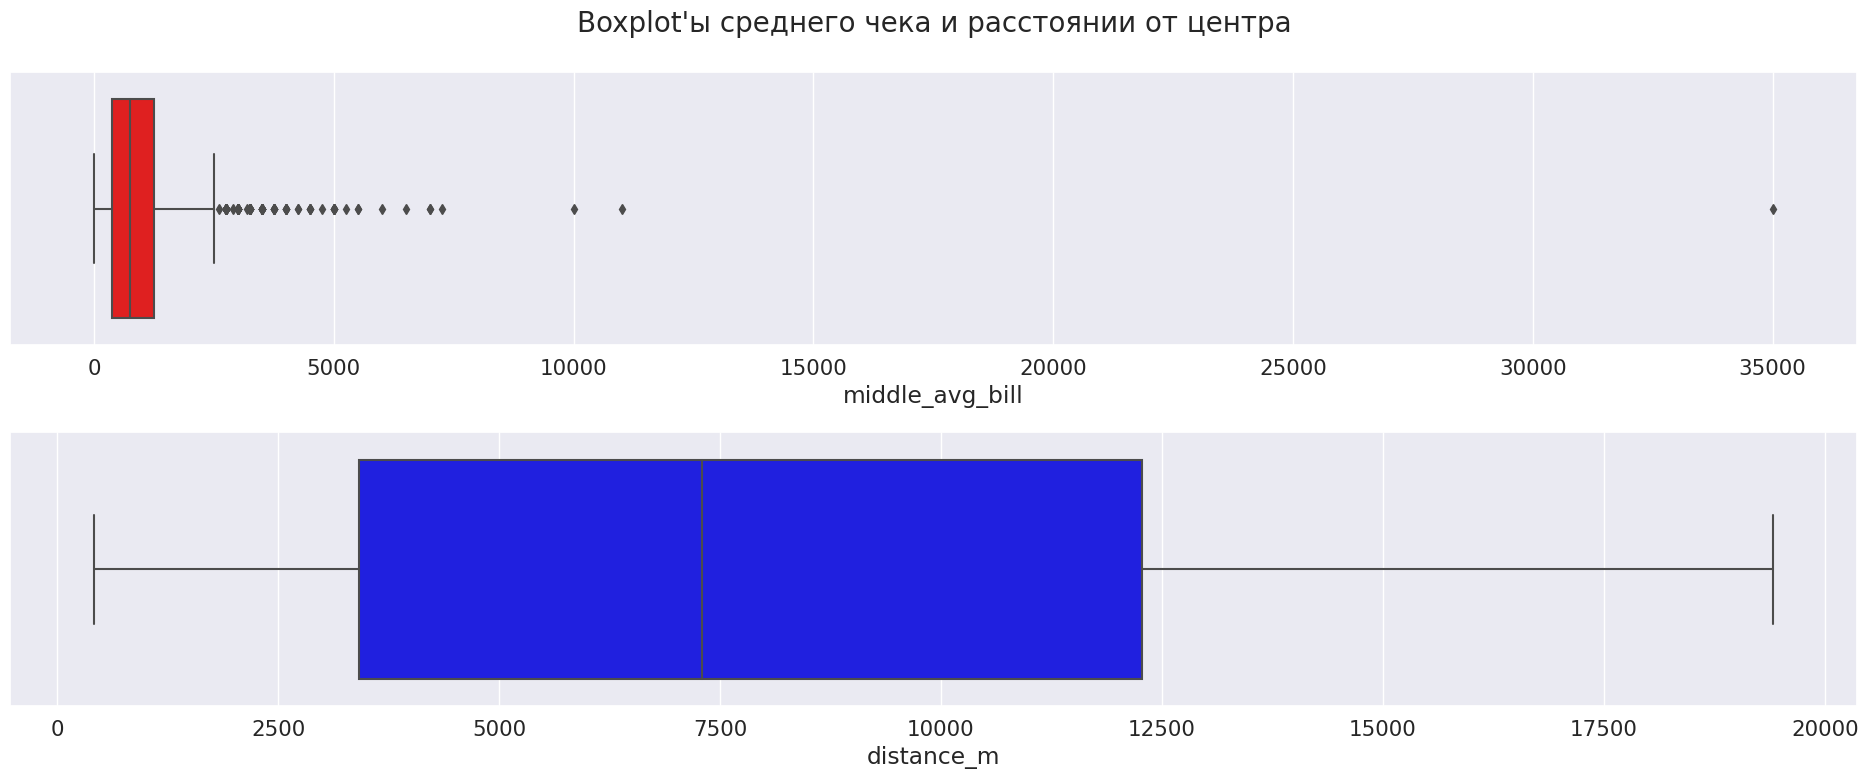

In [ ]:
print()
print("Boxplot'ы среднего чека и расстоянии от центра")
fig, axes = plt.subplots(2, 1, figsize=(19, 8))
fig.suptitle("Boxplot'ы среднего чека и расстоянии от центра", fontsize=20);
for b in spisok:
    axn=[i for i in range(0, len(spisok)) if spisok[i]==b][0]
    sns.boxplot(data = data_bil_not_null,x=b,ax=axes[axn],color=['red','blue'][axn])
    plt.tight_layout()



Построим график регрессии или зависимости одного параметра от другого:


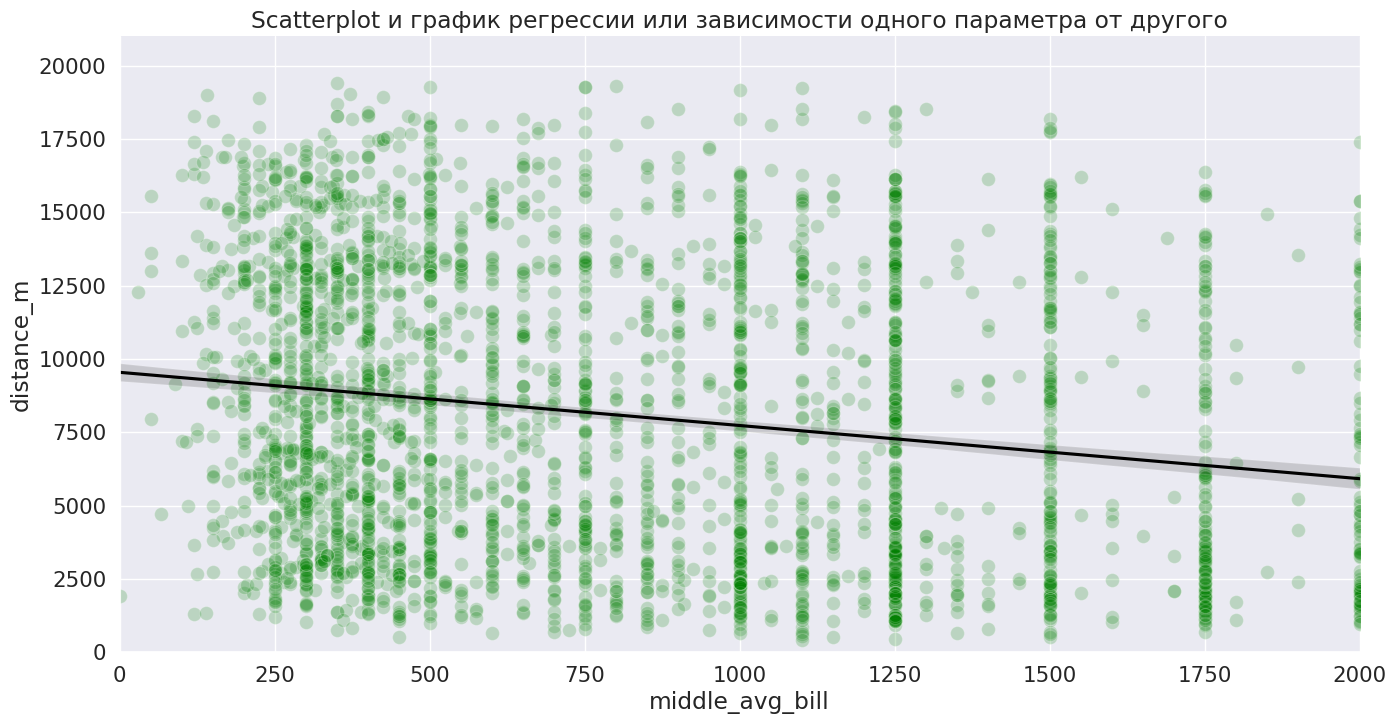

In [ ]:
print()
print("Построим график регрессии или зависимости одного параметра от другого:")
data_bil_not_null=data_bil_not_null[data_bil_not_null['middle_avg_bill']<=np.percentile(data_bil_not_null['middle_avg_bill'],96)]
plt.figure(figsize=(16,8))
sns.scatterplot(data=data_bil_not_null,x='middle_avg_bill',y='distance_m',color='green',alpha=0.2,s=100)
ax=sns.regplot(data=data_bil_not_null,x='middle_avg_bill',y='distance_m',color='black',scatter =False)
ax.set(title='Scatterplot и график регрессии или зависимости одного параметра от другого')
plt.xlim(0,2000)
plt.ylim(0,21000)
sns.despine()

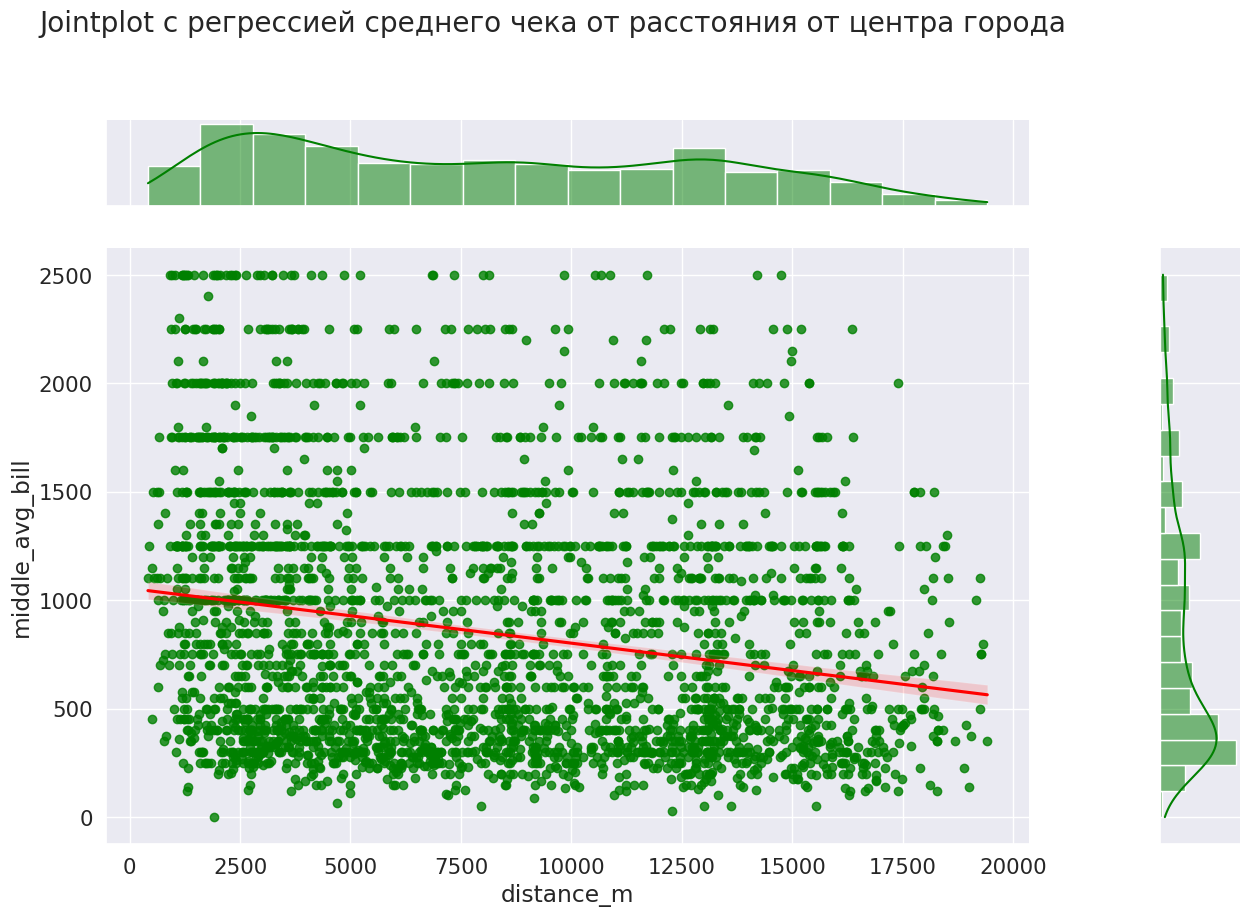

In [ ]:
ax=sns.jointplot(y="middle_avg_bill",
              x="distance_m",
              data=data_bil_not_null,kind='reg',color='green',joint_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle("Jointplot с регрессией среднего чека от расстояния от центра города")
ax.fig.tight_layout()
ax.fig.set_size_inches((15, 10))
sns.despine()

In [ ]:
print('__________________________________________________________________________')
print()
print('Корреляция среднего чека и расстояния от центра города равна',round(data_bil_not_null['middle_avg_bill']
                                                                           .corr(data_bil_not_null['distance_m']),3))
print('__________________________________________________________________________')

__________________________________________________________________________

Корреляция среднего чека и расстояния от центра города равна -0.214
__________________________________________________________________________


**Корреляция слабая - это может говорить что либо связи вовсе нет и число случайным образом так распределились, либо то что связь есть но она слаба и не является ключевой для зависимости двух показателей.**

In [ ]:
y = data_bil_not_null['middle_avg_bill']
x = data_bil_not_null['distance_m']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        middle_avg_bill   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     146.1
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           6.84e-33
Time:                        20:17:09   Log-Likelihood:                -23610.
No. Observations:                3045   AIC:                         4.722e+04
Df Residuals:                    3043   BIC:                         4.724e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1054.4767     19.597     53.809      0.0

По результатам теста МНК можно сказать, что около 4.6 % вариации среднего чека можно объяснить расстоянием. Модель явлется статзначимой. Формулу такой слабой модели приводить не стоит.

In [ ]:
print()
print("Хороплет с кластеризацией и расстоянием от центра в лейбле точки на карте у заведения")
pr_d_m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(pr_d_m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['middle_avg_bill']}  {round(row['distance_m'])}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data[data['middle_avg_bill'].isna()==False].apply(create_clusters, axis=1)

pr_d_m# выводим карту

Output hidden; open in https://colab.research.google.com to view.

**Вывод: Корреляция у этих показатейлей слабая (-0.214). Регрессия объясняет всего 4,6% вариаций одного показателя от другого. Все это значит малое влияение расстояния от центра на цену среднего чека в Москве.**

In [ ]:
data_coffe_not_null=data[data['middle_coffee_cup'].isna()==False]
print('Количество строк в таблице без пропущенных средних чеков:',data_coffe_not_null.shape[0])

Количество строк в таблице без пропущенных средних чеков: 535


[Text(0.5, 1.0, 'Boxplot распределения цена средний чашки капучино')]

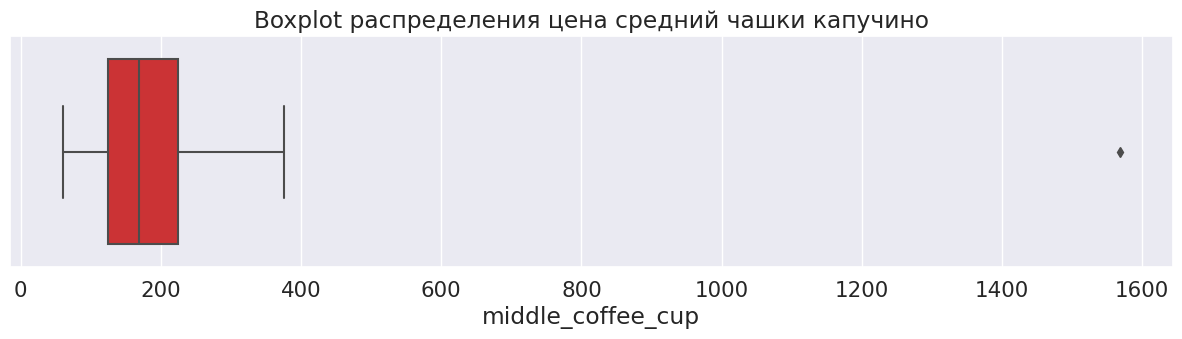

In [ ]:
plt.figure(figsize=(15,3))
ax=sns.boxplot(data = data_coffe_not_null,x='middle_coffee_cup')
ax.set(title='Boxplot распределения цена средний чашки капучино')

<Axes: xlabel='middle_coffee_cup', ylabel='distance_m'>

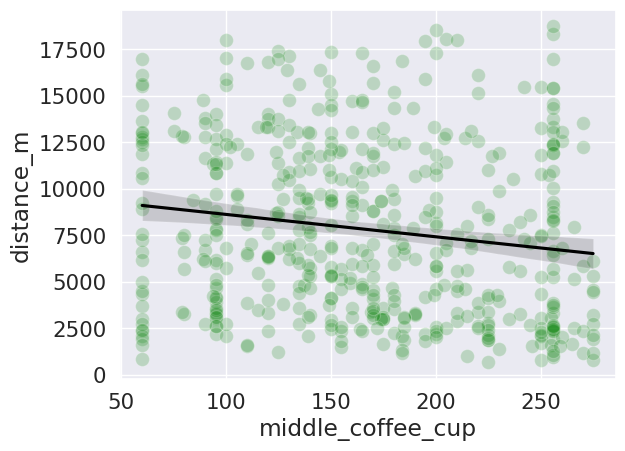

In [ ]:
data_coffe_not_null=data_coffe_not_null[data_coffe_not_null['middle_coffee_cup']<=np.percentile(data_coffe_not_null['middle_coffee_cup'],96)]
sns.scatterplot(data=data_coffe_not_null,x='middle_coffee_cup',y='distance_m',color='green',alpha=0.2,s=100)
sns.regplot(data=data_coffe_not_null,x='middle_coffee_cup',y='distance_m',color='black',scatter =False)

In [ ]:
print('Корреляция среднего чека и расстояния от центра города равна',round(data_coffe_not_null['middle_coffee_cup']
                                                                           .corr(data_coffe_not_null['distance_m']),3))

Корреляция среднего чека и расстояния от центра города равна -0.161


**ВЫВОД:**

**В датасете представлено 8 категорий заведений:**

1) кафе;

2) ресторан;

3) кофейня;

4) пиццерия;

5) бар,паб;

6) быстрое питание;

7) булочная;

8) столовая.

В среднем  посадочных мест больше всего в барах и пабах. Возможно это из-за барных стульев, ведь они занимают не очень много места, но вмещают много людей за барной стойкой. На втором месте рестораны, что не странно. На 3 и 4 местах кофейни и столовые - здесь страно, что в кофейнях больше мест чем в столовых. При сравнении медиан первое место у ресторанов а второе у баров, дальше без изменений.

**Несетвых заведений около 60%, а сетевых около 40%. Во всех случаях кроме пиццерий, кофеен и булочных количество несетевых заведений больше.**

-

**Убывание количество заведений в списке сетей равномерное нежели убывание в том же списке количества заведений по категориям:**

**Первые 4 (половина или  50 %) категорий заведений, отсортированных от большего к меньшиму по количеству 15 самых популярных заведений занимают 96.2 % от всех таких заведений. Или другими словами 531 из 552 заведений.**

**Выведем 4 самые популярные категории:**

1) кофейня;

2) пиццерия;

3) ресторан;

4) кафе.

**В датасете представлены все 9 районов (округов) внутри МКАДа:**

 - Северный административный округ;
 - Северо-Восточный административный округ;
 - Северо-Западный административный округ;
 - Западный административный округ;
 - Центральный административный округ;
 - Восточный административный округ;
 - Юго-Восточный административный округ
 - Южный административный округ;
 - Юго-Западный административный округ.

Хорошо отображает **распределение количества заведений по округам и категориям** хитмэп и барплот с накоплением - видно как **сильно выделяется ЦАО**.

**Средние оценки для всех категорий находятся в пределах 4-4,5. Можно сказать что они не сильно отличаются, но лидируют бары и пабы.**

**Рейтинг по округу отличается уже сильнее - в центре оценки выше на 20 сотых(4.38)**, тогда как в других окргуах около 4.10 до 4.20. 4.24 у САО.

**Распределение** количества **заведений по популярными улицам** и категориям тоже представлены в виде столбчатой диаграммы с накоплением и хитмэпом. **Больше все таких заведений на улицах: Проспект мира, Профсоюзная, проспект Вернадского и Ленинский проспект. По категориям это кафе, ресторан и кофейня.**

Можно сделать вывод что **на улицах Москвы, где представлен всего 1 ресторан, доля сетевых заведений почти на 12% меньнше** - сетевые **менеджеры явно не рискуют** открываться в новых местах а следуют общему тренду.

**Судя по хоплету выше средний чек уменьшается при удалении от центра везде кроме ЗАО.**

**НО**

**Корреляция между расстоянием и средним чеком слабая (-0.214)** - это может говорить что либо связи вовсе нет и число случайным образом так распределились, либо то что связь есть но она слаба и не является ключевой для зависимости двух показателей.

**Регрессия**, построенная методом наименьших квадратов, **объясняет всего 4,6% вариаций среднего чека показателя от расстояния.**

**Все это значит малое влияение расстояния от центра на цену среднего чека в Москве.**


## Анализ открытия кофейни:

### Проанализируем как распределяется кофейни по районам:

Оставим в датасете только кофейни и запишим в переменную coffee_data:

In [ ]:
coffee_data=data.query('category=="кофейня"')
coffee_data.head(3)

name category                                address  \
3   dormouse coffee shop  кофейня    Москва, улица Маршала Федоренко, 12   
25       в парке вкуснее  кофейня              Москва, парк Левобережный   
45          9 bar coffee  кофейня  Москва, Коровинское шоссе, 41, стр. 1   

                           district                   hours        lat  \
3   Северный административный округ  ежедневно, 09:00–22:00  55.881608   
25  Северный административный округ  ежедневно, 10:00–21:00  55.878453   
45  Северный административный округ       пн-пт 08:00–18:00  55.885837   

          lng  rating price                       avg_bill  middle_avg_bill  \
3   37.488860     5.0   NaN  Цена чашки капучино:155–185 ₽              NaN   
25  37.460028     4.3   NaN                            NaN              NaN   
45  37.513422     4.0   NaN                            NaN              NaN   

    middle_coffee_cup  chain  seats                   street  \
3               170.0      0   <NA>  улица Маршала Федоренко   
25                NaN      1   <NA>        парк Левобережный   
45                NaN      1     46        шоссе Коровинское   

            street111 is_24/7    distance_m  
3   Маршала Федоренко   False  16606.637379  
25       Левобережный   False  17272.234552  
45        Коровинское   False  16340.328973

In [ ]:
print('В датасете всего',coffee_data.shape[0],'кофеен.')

В датасете всего 1413 кофеен.


Проанализируем как распределяется кофейни по районам:

In [ ]:
district_count_coffee=coffee_data.pivot_table(index='district',values='name',aggfunc='count')
district_count_coffee.columns=['count']
district_count_coffee=district_count_coffee.sort_values(by='count',ascending=False).reset_index()
district_count_coffee=district_count_coffee.set_index(district_count_coffee.index+1)
district_count_coffee['pct_%']=round(district_count_coffee['count'].astype('float')/district_count_coffee['count'].sum(axis=0)*100).astype('int')
print()
print('Таблица распределения кофеен по районам:')
district_count_coffee


Таблица распределения кофеен по районам:


district  count  pct_%
1       Центральный административный округ    428     30
2          Северный административный округ    193     14
3  Северо-Восточный административный округ    159     11
4          Западный административный округ    150     11
5             Южный административный округ    131      9
6         Восточный административный округ    105      7
7      Юго-Западный административный округ     96      7
8     Юго-Восточный административный округ     89      6
9   Северо-Западный административный округ     62      4

In [ ]:
fig=go.Figure(go.Pie(labels=district_count_coffee['district'],values=district_count_coffee['count']))
fig.update_layout(title='Распределение кофеен по округам',
                 annotations=[dict(x=1.12,
                                   y=1.05,
                                   text='Округ:',
                                  showarrow=False)])

In [ ]:
fig=px.bar(district_count_coffee.sort_values(by='count'),y='district',x='count')
fig.update_layout(title='Распределение кофеен по округам')

___

In [ ]:
print()
print('Хороплет количества кофеен по округам города Москвы:')
c_d_m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
Choropleth(
    geo_data=state_geo,
    data=district_count_coffee,
    columns=['district', 'count'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Количество заведений по районам',
).add_to(c_d_m)
c_d_m


Хороплет количества кофеен по округам города Москвы:


**Далее соберем таблицу с использованем h3 для построени hexbin - шестиуголников которые своим цветом покажут нам плотность распределения кофеен в Москве:**

In [ ]:
resolution = 7
coffee_data_map = coffee_data[['name', 'lat', 'lng']]
coffee_data_map.columns=['name', 'lat', 'long']
lat, lng, res= 55.751244, 37.618423, 9
h3.geo_to_h3(lat, lng, res)
hex_ids = coffee_data_map.apply(lambda row: h3.geo_to_h3(row.lat, row.long, resolution), axis = 1)
coffee_data_map = coffee_data_map.assign(hex_id=hex_ids.values)
coffee_data_map.head(4)

name        lat       long           hex_id
3   dormouse coffee shop  55.881608  37.488860  8711aa72effffff
25       в парке вкуснее  55.878453  37.460028  8711aa723ffffff
45          9 bar coffee  55.885837  37.513422  8711aa72affffff
46              cofefest  55.879934  37.492522  8711aa72affffff

In [ ]:
coffee_data_map_hexid = coffee_data_map.groupby("hex_id", as_index=False).agg({"name": "count"})
coffee_data_map_hexid.columns = ["hex_id", "value"]
coffee_data_map_hexid
coffee_data_map_hexid["percentile"] = [st.percentileofscore(coffee_data_map_hexid["value"].values, i) for i in coffee_data_map_hexid["value"].values]
coffee_data_map_hexid.sort_values(by = "value", ascending = False, inplace = True)
coffee_data_map_hexid.head(4)

hex_id  value  percentile
125  8711aa78cffffff     51  100.000000
150  8711aa7adffffff     39   99.371069
147  8711aa7aaffffff     38   98.113208
145  8711aa7a8ffffff     38   98.113208

In [ ]:
def hexagons_dataframe_to_geojson(df_hex, file_output = None, column_name = "value"):
    """
    Produce the GeoJSON for a dataframe, constructing the geometry from the "hex_id" column
    and with a property matching the one in column_name
    """
    list_features = []

    for i,row in df_hex.iterrows():
        try:
            geometry_for_row = { "type" : "Polygon", "coordinates": [h3.h3_to_geo_boundary(h=row["hex_id"],geo_json=True)]}
            feature = Feature(geometry = geometry_for_row , id=row["hex_id"], properties = {column_name : row[column_name]})
            list_features.append(feature)
        except:
            print("An exception occurred for hex " + row["hex_id"])

    feat_collection = FeatureCollection(list_features)
    geojson_result = json.dumps(feat_collection)
    return geojson_result

def get_color(custom_cm, val, vmin, vmax):
    return matplotlib.colors.to_hex(custom_cm((val-vmin)/(vmax-vmin)))

def choropleth_map(df_aggreg, column_name = "value", border_color = 'black', fill_opacity = 0.5, color_map_name = "ghj", initial_map = None):
    """
    Creates choropleth maps given the aggregated data. initial_map can be an existing map to draw on top of.
    """
    #colormap
    min_value = df_aggreg[column_name].min()
    max_value = df_aggreg[column_name].max()
    mean_value = df_aggreg[column_name].mean()
    print(f"Colour column min value {min_value}, max value {max_value}, mean value {mean_value}")
    print(f"Hexagon cell count: {df_aggreg['hex_id'].nunique()}")

    # the name of the layer just needs to be unique, put something silly there for now:
    name_layer = "Choropleth " + str(df_aggreg)

    if initial_map is None:
        initial_map = folium.Map(location= [55.751244, 37.618423], zoom_start=10)

    #create geojson data from dataframe
    geojson_data = hexagons_dataframe_to_geojson(df_hex = df_aggreg, column_name = column_name)

    custom_cm = matplotlib.cm.get_cmap(color_map_name)

    folium.GeoJson(
        geojson_data,
        style_function=lambda feature: {
            'fillColor': get_color(custom_cm, feature['properties'][column_name], vmin=min_value, vmax=max_value),
            'color': border_color,
            'weight': 1,
            'fillOpacity': fill_opacity
        },
        name = name_layer,
    ).add_to(initial_map)

    return initial_map

In [ ]:
hexmap = choropleth_map(df_aggreg = coffee_data_map_hexid, color_map_name = "afmhot_r", column_name = "value",fill_opacity = 0.5,)
print()
print("Выведем график-карту hexbin - шестиуголников с концентрацией кофеен:")
hexmap

Colour column min value 1, max value 51, mean value 8.88679245283019
Hexagon cell count: 159

Выведем график-карту hexbin - шестиуголников с концентрацией кофеен:


**Вывод:**

30% всех кофеен распологаются в ЦАО. Карта hexbin это подтверждвет.

### График работы кофеен:

In [ ]:
coffee_data=data.query('category=="кофейня"')

In [ ]:
pd.options.mode.chained_assignment = None
coffee_data.loc[coffee_data['hours'].isna()==True,'is_24']='null'
for x in coffee_data.index:
    if str(coffee_data.loc[x,'hours']).find('круглосуточно')!=-1:
        coffee_data.loc[x,'is_24']=True
coffee_data['is_24']=coffee_data['is_24'].fillna(False)
print()
print('Таблица с типом графика работы кофеен или его отсутсвиия:')
coffee_data['is_24'].value_counts().reset_index()


Таблица с типом графика работы кофеен или его отсутсвиия:


index  is_24
0  False   1322
1   True     76
2   null     15

In [ ]:
print('________________________________________________________')
print()
print('Круглосуточных кофеен всего',coffee_data.loc[coffee_data['is_24']==True,'is_24/7'].count(),'штук.')
print('________________________________________________________')

________________________________________________________

Круглосуточных кофеен всего 76 штук.
________________________________________________________


____

### Ислледуем рейтинги кофеен. Рассмотрим их распределение.

In [ ]:
rating_district_coffee=coffee_data.pivot_table(index='rating',columns='district',values='name',aggfunc='count').sort_index(ascending=False)
rating_district_coffee.columns=['ВАО','ЗАО','САО','СВАО','СЗАО','ЦАО','ЮВАО','ЮЗАО','ЮАО']
print()
print('Отобразим таблицу распределения кофеен по рейтингу и округам:')
display(rating_district_coffee.head(3))
display(rating_district_coffee.tail(3))


Отобразим таблицу распределения кофеен по рейтингу и округам:


ВАО  ЗАО   САО  СВАО  СЗАО   ЦАО  ЮВАО  ЮЗАО  ЮАО
rating                                                   
5.0     4.0  3.0  13.0   1.0   4.0   5.0   4.0   1.0  2.0
4.9     4.0  3.0   5.0   6.0   2.0  11.0   2.0   1.0  3.0
4.8     4.0  2.0   4.0   4.0   3.0   5.0   2.0   3.0  2.0

ВАО  ЗАО  САО  СВАО  СЗАО  ЦАО  ЮВАО  ЮЗАО  ЮАО
rating                                                 
2.2     NaN  NaN  1.0   NaN   NaN  NaN   NaN   NaN  NaN
2.0     NaN  NaN  1.0   NaN   1.0  NaN   NaN   NaN  1.0
1.4     NaN  NaN  NaN   1.0   NaN  NaN   NaN   NaN  NaN

In [ ]:
for x in coffee_data.index:
  coffee_data.loc[x,'distr']=str(coffee_data.loc[x,'district'])[:str(coffee_data.loc[x,'district']).find(' административный')]
print()
print('Добавим столбец distr датасет coffee_data, где будет только имя округа.')
print('Например, было Северный административный округ - стало Северный.')
coffee_data.head(3)


Добавим столбец distr датасет coffee_data, где будет только имя округа.
Например, было Северный административный округ - стало Северный.


name category                                address  \
3   dormouse coffee shop  кофейня    Москва, улица Маршала Федоренко, 12   
25       в парке вкуснее  кофейня              Москва, парк Левобережный   
45          9 bar coffee  кофейня  Москва, Коровинское шоссе, 41, стр. 1   

                           district                   hours        lat  \
3   Северный административный округ  ежедневно, 09:00–22:00  55.881608   
25  Северный административный округ  ежедневно, 10:00–21:00  55.878453   
45  Северный административный округ       пн-пт 08:00–18:00  55.885837   

          lng  rating price                       avg_bill  middle_avg_bill  \
3   37.488860     5.0   NaN  Цена чашки капучино:155–185 ₽              NaN   
25  37.460028     4.3   NaN                            NaN              NaN   
45  37.513422     4.0   NaN                            NaN              NaN   

    middle_coffee_cup  chain  seats                   street  \
3               170.0      0   <NA>  улица Маршала Федоренко   
25                NaN      1   <NA>        парк Левобережный   
45                NaN      1     46        шоссе Коровинское   

            street111 is_24/7    distance_m  is_24     distr  
3   Маршала Федоренко   False  16606.637379  False  Северный  
25       Левобережный   False  17272.234552  False  Северный  
45        Коровинское   False  16340.328973  False  Северный

In [ ]:
seaborn.categorical._Old_Violin = seaborn.categorical._ViolinPlotter
class _My_ViolinPlotter(seaborn.categorical._Old_Violin):

    def __init__(self, *args, **kwargs):
        super(_My_ViolinPlotter, self).__init__(*args, **kwargs)
        self.gray='black'

seaborn.categorical._ViolinPlotter = _My_ViolinPlotter

In [ ]:
sns.set(font_scale=1.1)

**Построим грфаики распределения оценок. Для этого выведем violinplot, boxplot и stripplot:**

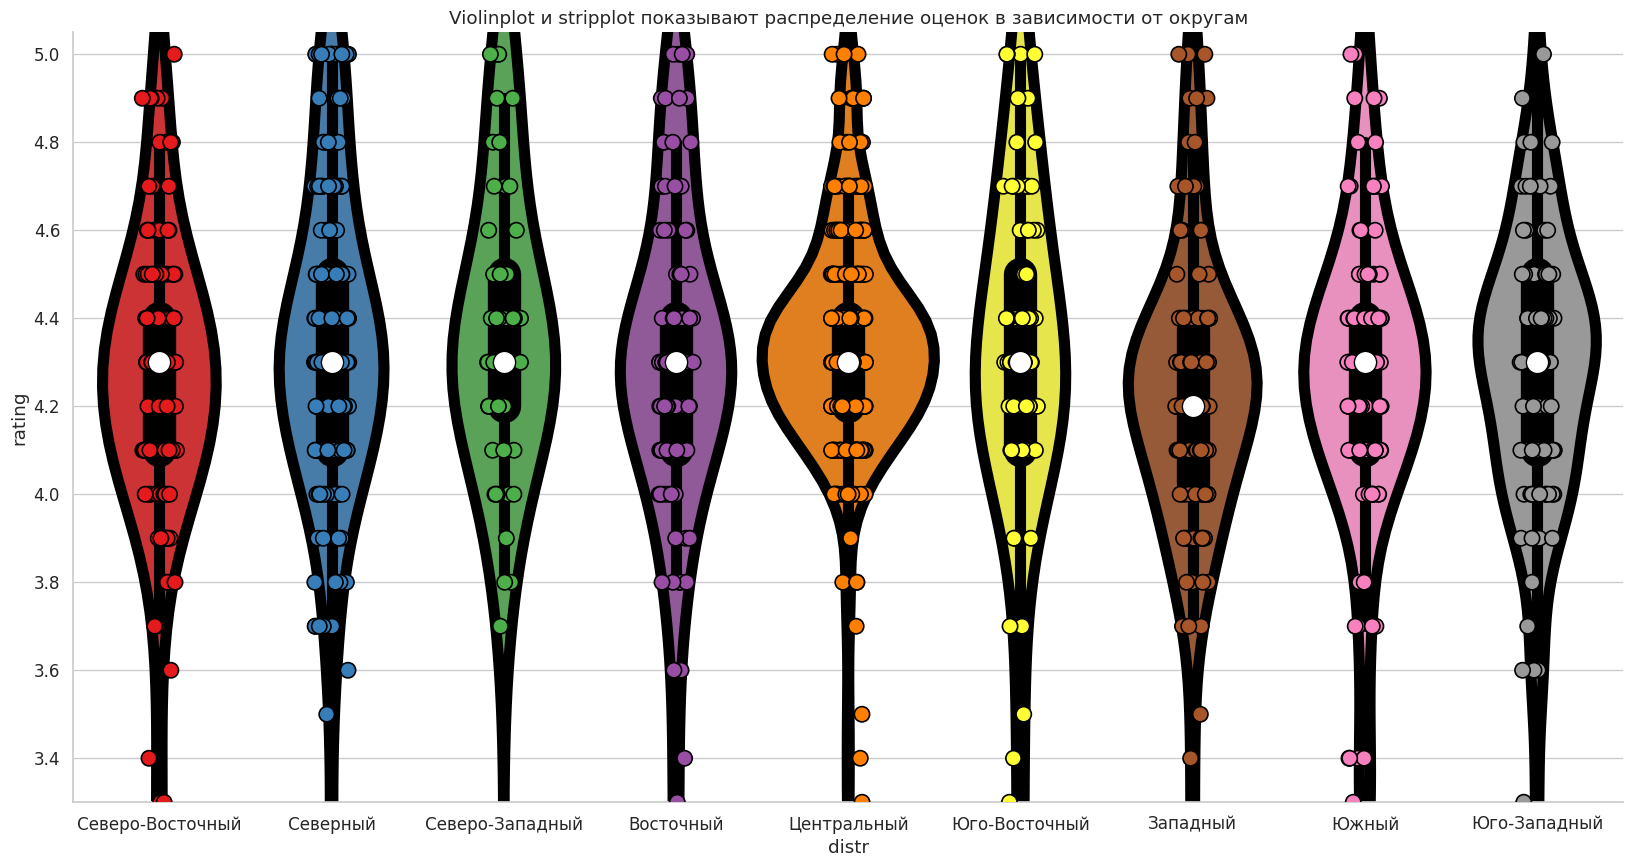

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
ax = sns.stripplot(x='distr', y='rating', data=coffee_data.sort_values(by='lat',ascending=False), jitter=0.1 ,
                   palette='Set1',edgecolor='black',linewidth=1.2, s = 11)
ax = sns.violinplot(x="distr", y="rating", data=coffee_data.sort_values(by='lat',ascending=False), color=".8",
    width=1,palette='Set1',linewidth=8,)

ax.tick_params(axis='x')
ax.set(ylim=(3.3, 5.05),
      title='Violinplot и stripplot показывают распределение оценок в зависимости от округам')
sns.despine()

In [ ]:
sns.set(font_scale=1.1)

(2.5, 5.18)

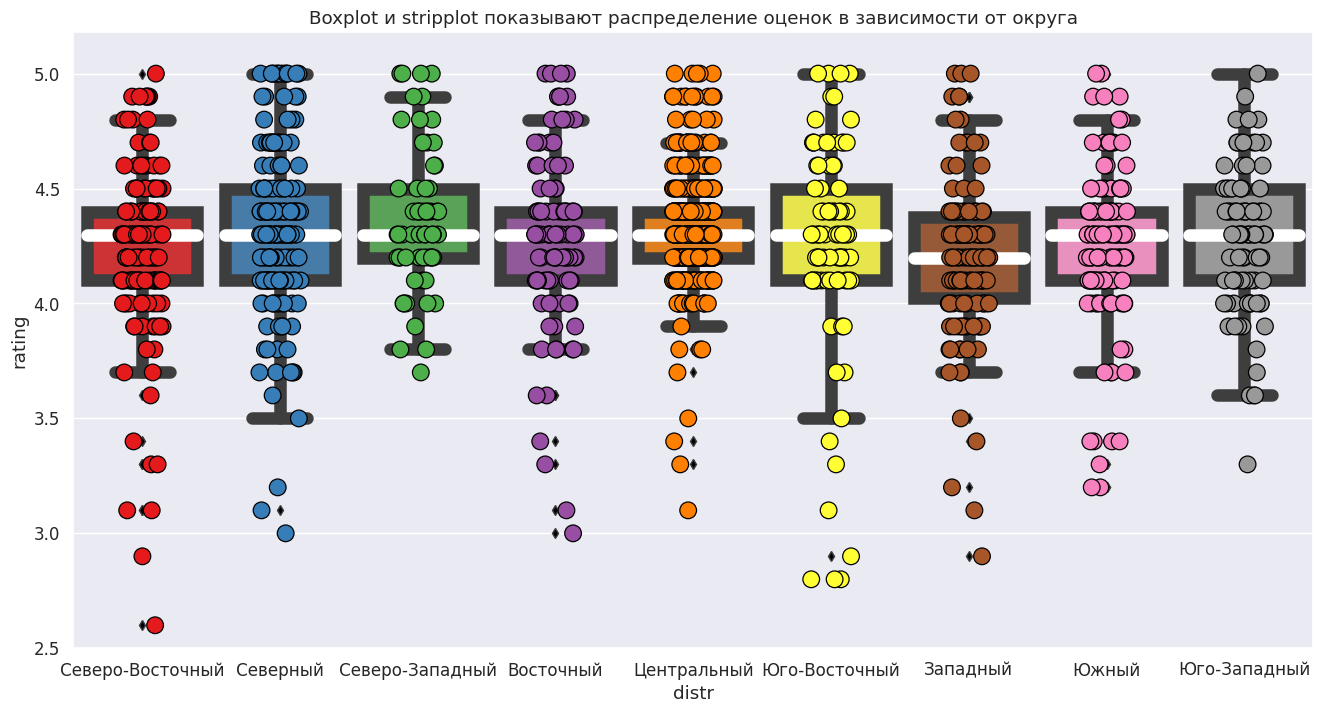

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.stripplot(x='distr', y='rating', data=coffee_data.sort_values(by='lat',ascending=False),jitter=0.15 ,
                   palette='Set1',edgecolor='black',linewidth=0.9, s = 12)
sns.boxplot(x="distr", y="rating",
            data=coffee_data.sort_values(by='lat',ascending=False), palette='Set1', linewidth=9,
            medianprops=dict(color="white", alpha=1),
            flierprops=dict(markerfacecolor="black"))
ax.set( title='Boxplot и stripplot показывают распределение оценок в зависимости от округа')
plt.ylim(2.5,)

In [ ]:
descr_coffee_data=pd.DataFrame(coffee_data['rating'].describe())
for x in coffee_data['district'].unique():
    descr_coffee_data[x]=coffee_data.loc[coffee_data['district']==x,'rating'].describe()
descr_coffee_data=round(descr_coffee_data.T,2)
descr_coffee_data

count  mean   std  min   25%  50%  \
rating                                   1413.0  4.28  0.37  1.4  4.10  4.3   
Северный административный округ           193.0  4.29  0.44  2.0  4.10  4.3   
Северо-Восточный административный округ   159.0  4.22  0.43  1.4  4.10  4.3   
Северо-Западный административный округ     62.0  4.33  0.43  2.0  4.20  4.3   
Центральный административный округ        428.0  4.34  0.26  2.3  4.20  4.3   
Восточный административный округ          105.0  4.28  0.38  3.0  4.10  4.3   
Западный административный округ           150.0  4.20  0.36  2.3  4.03  4.2   
Юго-Восточный административный округ       89.0  4.23  0.51  2.3  4.10  4.3   
Юго-Западный административный округ        96.0  4.28  0.30  3.3  4.10  4.3   
Южный административный округ              131.0  4.23  0.39  2.0  4.10  4.3   

                                          75%  max  
rating                                   4.40  5.0  
Северный административный округ          4.50  5.0  
Северо-Восточный административный округ  4.40  5.0  
Северо-Западный административный округ   4.50  5.0  
Центральный административный округ       4.40  5.0  
Восточный административный округ         4.40  5.0  
Западный административный округ          4.38  5.0  
Юго-Восточный административный округ     4.50  5.0  
Юго-Западный административный округ      4.50  5.0  
Южный административный округ             4.40  5.0

**Вывод:   График выше показывает что оценки у кофеен в основном от 4 до 4.5. Ориентироваться стоит на эти цифры.**

### Выясним на какую стоимость чашки капучино стоит ориентироваться при открытии:

In [ ]:
print()
print('Выведем таблицу с основными статистиками цены чашки капучино:')
descr_ALL_coffee_data=pd.DataFrame(round(coffee_data.loc[coffee_data['middle_coffee_cup'].isna()==False,'middle_coffee_cup'].describe()))
descr_ALL_coffee_data


Выведем таблицу с основными статистиками цены чашки капучино:


middle_coffee_cup
count              521.0
mean               175.0
std                 90.0
min                 60.0
25%                124.0
50%                170.0
75%                225.0
max               1568.0

In [ ]:
sns.set(font_scale=1.4)

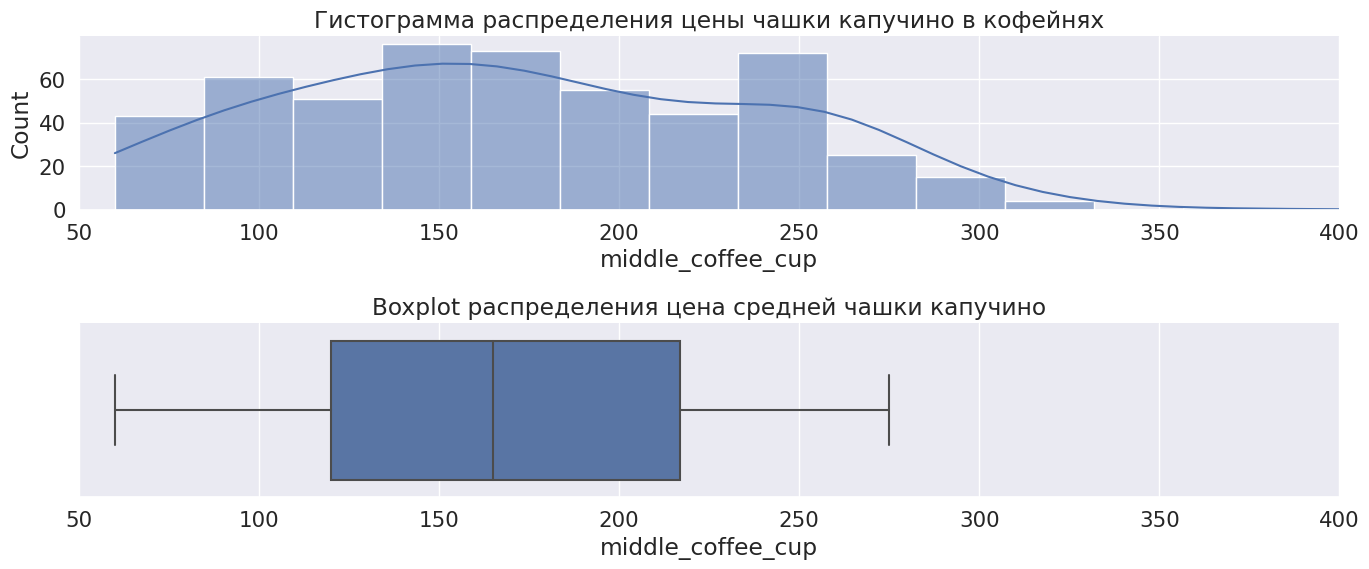

In [ ]:
plt.figure(figsize=(14,6))
ax=sns.histplot(data = coffee_data[coffee_data['middle_coffee_cup'].isna()==False],x='middle_coffee_cup',kde =True ,ax=plt.subplot(2,1,1))
ax.set(xlim=(50, 400),title='Гистограмма распределения цены чашки капучино в кофейнях')
ax=sns.boxplot(data = data_coffe_not_null,x='middle_coffee_cup',ax=plt.subplot(2,1,2))
ax.set(title='Boxplot распределения цена средней чашки капучино')
ax.set(xlim=(50, 400))
plt.tight_layout()
sns.despine()

In [ ]:
print()
print('При открытии кофейни следует ориентироватся на стоимость 1 чашки капучино начиная от'
      ,descr_ALL_coffee_data.loc['50%','middle_coffee_cup'].astype('int'),'до',
      descr_ALL_coffee_data.loc['mean','middle_coffee_cup'].astype('int'),
      'рублей.')
print('Эти числа обусловлены средней и медианной ценой чашки капучино в кофейнях по всей Москве.')


При открытии кофейни следует ориентироватся на стоимость 1 чашки капучино начиная от 170 до 175 рублей.
Эти числа обусловлены средней и медианной ценой чашки капучино в кофейнях по всей Москве.


**ВЫВОД:**

**В датасете всего 1413 кофеен.**

**30% из них располагаются в ЦАО. Карта hexbin и хороплет количества кофеен это подтверждают.**

**Круглосуточных кофеен всего 76 штук.**

**Средние оценки у кофеен в основном от 4 до 4.5. Кокретнее от 4.2 до 4.35.**

**При открытии кофейни следует ориентироваться на стоимость 1 чашки капучино начиная от 170 до 175 рублей.
Эти числа обусловлены средней и медианной ценой чашки капучино в кофейнях по всей Москве.**

## ВЫВОД:

**Анализ рынка общепита Москвы:**

Если сравнивать категории по посадочным местам то их больше всего в барах и пабах.

Количество сетевых заведений около 60%, а сетевых около 40%. Во всех случаях кроме пиццерий, кофеен и булочных количество несетевых заведений больше.

Из популярных сетевых заведений такие категории как кофейни, пиццерии, рестораны и кафе занимают около 95% от количетва всех заведений.

В датасете присутствуют 9 округов Москвы внутри МКАДа. По количеству заведений выделяется ЦАО. В нем окола 27% всех заведений датасета.

Средние оценки для всех категорий находятся в пределах 4-4,5. Можно сказать что оценки в категориях не сильно отличаются, но лидируют бары и пабы.
В среднем в центре ставят лучше оценки в (средняя - 4.38) по сравнениях с другими округами и оценки в среднем больше на 0.2.

Улицы на которых больше всего заведений:  Проспект мира, Профсоюзная, проспект Вернадского и Ленинский проспект. Причина тому их длинна.

Доля сетей на непопулярных улицах где есть всего одно заведение на 12% ниже чем доля сетей из общей выборки. Это явно говорит о присутствии как бы традиции или о большем отсутствии риска у менеджеров крупных компаний.

Расстояние слабо влияет на средний чек в заведении. Скорее всего это влияние обусловлено чем-то другим или целос рядом факторов.

**Анализ кофеен:**

30% из 1 413 кофеен датасета располагаются в ЦАО. Из них 76 круглосуточных. Средняя оценка будет от 4.2 до 4.35. А средняя цена 1 чашки капучино от 170 до 175 рублей.

При условии, что менеджеры и инвесторы "Shut Up and Take My Money" не боятся конкуренции и хотят что бы их кофейня была популярной и доступной, стоит открыть кофейню в ЦАО. Так у кофейня больше шансов получить хорошие оценки.

<div class="alert alert-success">
<b>Послесловие: </b>

Некоторые графики повторяются.
    
Можно было создать функцию для постоянного их построения. И с помощью этого повысить оптимизацию своего кода и презентабельность проекта в целом.
    
То есть мы можем создать "обёртки" с методами, и в функцию будем подавать нужные перменные:
    
- датасет
- подписи графика и осей
- и прочие любые настройки
    
</div>

# ПРЕЗЕНТАЦИЯ

Ссылка на презентацию PPTX и/или Google Презентации: https://docs.google.com/presentation/d/18qhPQiSW8G5TnlL94VzVmJhu9d2m-jBO7nAg3YfZzrc/edit?usp=sharing

Ссылка на презентацию PDF: https://drive.google.com/file/d/1TrghUz2nMEmEAdxtKl62Gtg0O5ODUNbm/view?usp=share_link

  |Название проекта|Спринт|Сферы деятельности компаний|Направление деятельности|Навыки и инструменты|Задачи проекта|Описание проекта|Ключевые слова проекта |Rлючевые слова|
| ------------------ | ------------------ | ------------------ |------------------ | ------------------ |------------------ | ------------------ |------------------ | ------------------ |
| 1. Исследование данных сервиса “Яндекс.Музыка” — сравнение пользователей двух городов | Базовый Python | Интернет-сервисы,Стриминговый сервис | Data Analyst | Pandas,Python | На реальных данных Яндекс.Музыки c помощью библиотеки Pandas и её возможностей проверить данные и сравнить поведение и предпочтения пользователей двух столиц — Москвы и Санкт-Петербурга. | Сравнение Москвы и Петербурга окружено мифами: - Москва — мегаполис, подчинённый жёсткому ритму рабочей недели; - Петербург — город своеобразной культуры, непохожий на Москву. Некоторые мифы отражают действительность. Другие — пустые стереотипы. Бизнес должен отличать первые от вторых, чтобы принимать рациональные решения. На реальных данных Яндекс.Музыки вы проверите данные и сравните поведение пользователей двух столиц. | обработка данных, дубликаты, пропуски, логическая индексация, группировка, сортировка | data analyst, аналитик данных, аналитик, analyst|
| 2. Исследование надёжности заёмщиков — анализ банковских данных | Предобработка данных | Банковская сфера,Кредитование | Data Analyst,Финансовый аналитик | Pandas,Python,предобработка данных | На основе статистики о платёжеспособности клиентов исследовать влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок | На основе данных кредитного отдела банка исследовал влияние семейного положения и количества детей на факт погашения кредита в срок. Была получена информация о данных. Определены и обработаны пропуски. Заменены типы данных на соответствующие хранящимся данным. Удалены дубликаты. Категоризованы данные. Один датафрейм декомпозирован на три. | обработка данных, дубликаты, пропуски, категоризация, декомпозиция | data analyst, аналитик данных, аналитик, финансовый аналитик, analyst|
|3. Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости | Исследовательский анализ данных | Интернет-сервисы,Площадки объявлений | Data Analyst,Fraud-аналитик,Маркетинг-аналитик | Matplotlib,Pandas,Python,визуализация данных,исследовательский анализ данных,предобработка данных | Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир | На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость объектов недвижимости разного типа, типичные параметры квартир, в зависимости от удаленности от центра. Проведена предобработка данных. Добавлены новые данные. Построены гистограммы, боксплоты, диаграммы рассеивания. | обработка данных, histogram, boxplot, scattermatrix, категоризация, scatterplot,  фрод-мониторинг | маркетинговый аналитик, фрод аналитик, fraud analyst, data analyst, аналитик данных, аналитик, analyst,|
|4. Определение выгодного тарифа для телеком компании | Статистический анализ данных | Телеком | Data Analyst,Маркетинг-аналитик,Продуктовый аналитик | Matplotlib,NumPy,Pandas,Python,SciPy,описательная статистика,проверка статистических гипотез | На основе данных клиентов оператора сотовой связи проанализировать поведение клиентов и поиск оптимального тарифа | Проведен предварительный анализ использования тарифов на выборке клиентов, проанализировано поведение клиентов при использовании услуг оператора и рекомендованы оптимальные наборы услуг для пользователей. Проведена предобработка данных, их анализ. Проверены гипотезы о различии выручки абонентов разных тарифов и различии выручки абонентов из Москвы и других регионов. | обработка данных, histogram, boxplot, статистический тест, критерий Стьюдента | аналитик, analyst, аналитик данных, data analyst|
|5. Изучение закономерностей, определяющих успешность игр | Сборный проект — 1 | Gamedev,Интернет-магазины | Маркетинг-аналитик,Продуктовый аналитик | Matplotlib,NumPy,Pandas,Python,исследовательский анализ данных,описательная статистика,предобработка данных,проверка статистических гипотез | Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры  | Выявлены параметры, определяющие успешность игры в разных регионах мира. На основании этого подготовлен отчет для магазина компьютерных игр для планирования рекламных кампаний. Проведена предобработка данных, анализ. Выбран актуальный период для анализа. Составлены портреты пользователей каждого региона. Проверены гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action и Sports разные. При анализе использовал критерий Стьюдента для независимых выборок. | обработка данных, histogram, boxplot, статистический тест, критерий Стьюдента, piechart | игровой аналитик, game analyst, аналитик игрового проекта, продуктовый аналитик, product analyst, gamedev analyst, аналитик геймдев|
|6. Исследование данных об инвестиции венчурных фондов в компании-стартапы | Базовый SQL | Инвестиции,Стартапы | Data Analyst,Аналитик (универсал),Финансовый аналитик | PostgreSQL,SQL | Произвести различные выгрузки данных венчурных фондов с помощью SQL | Проект автоматически проверяется в тренажёре SQL. В самостоятельном проекте этого курса работа идёт с базой данных, которая хранит информацию о венчурных фондах и инвестициях в компании-стартапы. Эта база данных основана на датасете Startup Investments, опубликованном на популярной платформе для соревнований по исследованию данных Kaggle. | обработка данных, выгрузка данных, SQL | аналитик sql, sql analyst, аналитик, analyst, reporting analyst|
|7. Анализ убытков приложения ProcrastinatePRO+ | Анализ бизнес-показателей | Интернет-сервисы,Стартапы | Маркетинг-аналитик,Продуктовый аналитик | Matplotlib,Pandas,Python,Seaborn,когортный анализ,продуктовые метрики,юнит-экономика | Задача для маркетингового аналитика развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс. | Проведен анализ данных от ProcrastinatePRO+. Рассчитаны различные метрики, использован когортный анализ: LTV, CAC, Retention rate, DAU, WAU, MAU и т.д. Использованы уже написанные ранее функции расчёта метрик. Сделаны правильные выводы по полученным данным. | обработка данных, статистический тест, LTV, CAC, когортный анализ | маркетолог аналитик, marketing analyst, маркетинговый аналитик, веб-аналитик, web-analyst, продуктовый аналитик, product analyst|
|8. Проверка гипотез по увеличению выручки в интернет-магазине — оценить результаты A/B теста | Принятие решений в бизнесе | Интернет-магазины | Маркетинг-аналитик | A/B-тестирование,Matplotlib,Pandas,Python,SciPy,проверка статистических гипотез | Используя данные интернет-магазина приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами | Проведена приоритизация гипотез по фреймворкам ICE и RICE. Затем провел анализ результатов A/B-теста, построил графики кумулятивной выручки, среднего чека, конверсии по группам, а затем посчитал статистическую значимость различий конверсий и средних чеков по сырым и очищенным данным. На основании анализа мной было принято решение о нецелесообразности дальнейшего проведения теста. | A/B-тест, статистический тест, фреймворк, RICE, ICE | продуктовый аналитик, product analyst, аналитик продукта, product data analyst|
|9. Исследования рынка общепита в Москве для принятия решения об
открытии нового заведения | Как рассказать историю с помощью данных (Визуализация данных) | Бизнес,Оффлайн,Стартапы | Data Analyst,Аналитик (универсал),Маркетинг-аналитик | Pandas,Plotly,Python,Seaborn,визуализация данных | Исследование рынка общественного питания на основе открытых данных, подготовка презентации для инвесторов | Мною был исследован вопрос - будет ли успешным и популярным на долгое время кафе, в котором гостей обслуживают роботы-официанты. По результатам анализа подготовлена презентация для инвесторов с рекомендациями. В построении графиков я использовали библиотеки seaborn и plotly.  | обработка данных, визуализация данных, создание презентаций | data analyst, аналитик данных, аналитик, analyst|
|10. Анализ пользовательского поведения в мобильном приложении | Сборный проект — 2  | Бизнес,Интернет-сервисы,Стартапы | Маркетинг-аналитик,Продуктовый аналитик | A/B-тестирование,Matplotlib,Pandas,Plotly,Python,Seaborn,визуализация данных,проверка статистических гипотез,продуктовые метрики,событийная аналитика | На основе данных использования мобильного приложения для продажи продуктов питания проанализировать воронку продаж, а также оценить результаты A/A/B-тестирования  | В данном проекте мной были изучены принципы событийной аналитики. Я построил воронку продаж, исследовал путь пользователей до покупки. Проанализировал результаты A/B-теста введения новых шрифтов. Сравнил 2 контрольных группы между собой, убедился в правильном разделении трафика, а затем сравнил с тестовой группой Выявлено, что новый шрифт значительно не повлияет на поведение пользователей. | A/B-тест, визуализация, статистический тест | аналитик мобильного приложения, аналитик продукта, продуктовый аналитик, product analyst, mobile app analyst|
|11. Создание дашборда по пользовательским событиям для агрегатора новостей | Автоматизация | Интернет-сервисы,Площадки объявлений | BI-аналитик,Data Analyst,Аналитик (универсал),Маркетинг-аналитик | PostgreSQL,Python,SQLAlchemy,Tableau,dash,построение дашбордов,продуктовые метрики | Используя данные Яндекс.Дзена построить дашборд с метриками взаимодействия пользователей с карточками статей | Работу над этим проектом я провел на удаленной машине в сервисе Yandex.Cloud. Мной был установлен PostgreSQL, развернута база данных. Затем я написал скрипт пайплайна, который позволил собирать данные за определенный временной период, и настроил его автономную работу через crontab. Для визуализации собранных данных я написал скрипт дашборда с несколькими фильтрами и также запустил его на удаленной машине. По результатам была подготовлена презентация с полученными графиками | дашборд, пайплайн, Yandex.Cloud, удаленный сервер, виртуальная машина, cron | bi analyst, bi-аналитик, аналитик данных, data analyst, разработчик системы отчетности, reporting analyst|
|12. Прогнозирование вероятности оттока пользователей для фитнес-центров | Прогнозы и предсказания | Бизнес,Оффлайн | Аналитик (универсал),Маркетинг-аналитик | Matplotlib,Pandas,Python,Scikit-learn,Seaborn,классификация,кластеризация,машинное обучение | На основе данных о посетителях сети фитнес-центров спрогнозировать вероятность оттока для каждого клиента в следующем месяце, сформировать с помощью кластеризации портреты пользователей | В данном проекте использовано машинное обучение. Спрогнозирована вероятность оттока (на уровне следующего месяца) для каждого клиента; сформированы типичные портреты пользователей: выделены наиболее яркие группы, охарактеризованы их основные свойства; проанализированы основные признаки, наиболее сильно влияющие на отток. | KMeans, Machine Learning, дендрограмма, RandomForestClassifier, LogisticRegression | data analyst, аналитик данных, data scientist|
|13. Выпускной проект |  | Gamedev,Банковская сфера,Интернет-магазины,Интернет-сервисы,Оффлайн | Data Analyst,Аналитик (универсал) |  | На основе всех полученных данных в курсе выполнить буткемп-проект по одной из выбранной областей: - банки; - ритейл; - игры; - мобильные приложения; - e-commerce. |  |  | data analyst, аналитик данных|


In [14]:
import re

def convert_markdown_table_to_list(markdown_table):
    lines = markdown_table.strip().split('\n')
    header = lines[0].split('|')[1:-1]
    separator = lines[1].split('|')[1:-1]
    rows = [line.split('|')[1:-1] for line in lines[2:]]

    # Очистка заголовков столбцов от форматирования (жирный шрифт)
    clean_header = [re.sub('\*{2}(.*?)\*{2}', r'\1', col.strip()) for col in header]

    result = []
    for row in rows:
        entry = []
        for i, value in enumerate(row):
            column_name = clean_header[i].strip()
            column_value = re.sub('\*{2}(.*?)\*{2}', r'\1', value.strip())
            entry.append(f"{column_name}: {column_value.strip()}")
        result.append(entry)

    return result

# Пример использования
markdown_table = '''
| #| Название проекта              | Описание проекта           | Используемые библиотеки                     |
|-| -------------------- | --------------------- |---------------------------|
|1 | Музыка больших городов| Сравниваем данные пользователей Яндекс.Музыки по городам и дням недели | pandas |
|2 | Исследование надежности заемщиков| Анализируем данные о клиентах банка и определяем долю кредитоспособных | pandas, numpy |
'''

result_list = convert_markdown_table_to_list(markdown_table)

# Вывод результата
for entry in result_list:
    print("\n".join(entry))
    print()


#: 1
Название проекта: Музыка больших городов
Описание проекта: Сравниваем данные пользователей Яндекс.Музыки по городам и дням недели
Используемые библиотеки: pandas

#: 2
Название проекта: Исследование надежности заемщиков
Описание проекта: Анализируем данные о клиентах банка и определяем долю кредитоспособных
Используемые библиотеки: pandas, numpy



Название проекта: 1. Исследование данных сервиса “Яндекс.Музыка” — сравнение пользователей двух городов
Спринт: Базовый Python
Сферы деятельности   компаний: Интернет-сервисы,Стриминговый сервис
Направление деятельности: Data Analyst
Навыки и инструменты: Pandas,Python
Задачи проекта: На реальных данных Яндекс.Музыки c помощью библиотеки Pandas и её возможностей проверить данные и сравнить поведение и предпочтения пользователей двух столиц — Москвы и Санкт-Петербурга.
Описание проекта: Сравнение Москвы и Петербурга окружено мифами: - Москва — мегаполис, подчинённый жёсткому ритму рабочей недели; - Петербург — город своеобразной культуры, непохожий на Москву. Некоторые мифы отражают действительность. Другие — пустые стереотипы. Бизнес должен отличать первые от вторых, чтобы принимать рациональные решения. На реальных данных Яндекс.Музыки вы проверите данные и сравните поведение пользователей двух столиц.
Ключевые слова проекта: обработка данных, дубликаты, пропуски, логическая индексация, группировка, сортировка
ключевые слова: data analyst, аналитик данных, аналитик, analyst

In [27]:
import re

def convert_markdown_table_to_list(markdown_table):
    lines = markdown_table.strip().split('\n')
    header = [re.sub('\*{2}(.*?)\*{2}', r'\1', item.strip()) for item in lines[0].split('|')[1:-1]]
    separator = lines[1].split('|')[1:-1]
    rows = [line.split('|')[1:-1] for line in lines[2:]]

    result = []
    for row in rows:
        entry = []
        for i, value in enumerate(row):
            column_name = header[i]
            column_value = value.strip()
            if i == 0:
                entry.append(f"### [{column_name} {column_value}]()")
            else:
                entry.append(f"* **{column_name}**: {column_value}")
        result.append(entry)

    return result

# Пример использования
markdown_table = '''
 |Проект|Спринт|Сферы деятельности компаний|Направление деятельности|Навыки и инструменты|Задачи проекта|Описание проекта|Ключевые слова проекта |Ключевые слова|
|:--|:--|:---|:---|:---|:--|:---|:---|:---|
|1. Исследование данных сервиса “Яндекс.Музыка” — сравнение пользователей двух городов | Базовый Python | Интернет-сервисы,Стриминговый сервис | Data Analyst | Pandas,Python | На реальных данных Яндекс.Музыки c помощью библиотеки Pandas и её возможностей проверить данные и сравнить поведение и предпочтения пользователей двух столиц — Москвы и Санкт-Петербурга. | Сравнение Москвы и Петербурга окружено мифами: - Москва — мегаполис, подчинённый жёсткому ритму рабочей недели; - Петербург — город своеобразной культуры, непохожий на Москву. Некоторые мифы отражают действительность. Другие — пустые стереотипы. Бизнес должен отличать первые от вторых, чтобы принимать рациональные решения. На реальных данных Яндекс.Музыки вы проверите данные и сравните поведение пользователей двух столиц. | обработка данных, дубликаты, пропуски, логическая индексация, группировка, сортировка | data analyst, аналитик данных, аналитик, analyst|
|2. Исследование надёжности заёмщиков — анализ банковских данных | Предобработка данных | Банковская сфера,Кредитование | Data Analyst,Финансовый аналитик | Pandas,Python,предобработка данных | На основе статистики о платёжеспособности клиентов исследовать влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок | На основе данных кредитного отдела банка исследовал влияние семейного положения и количества детей на факт погашения кредита в срок. Была получена информация о данных. Определены и обработаны пропуски. Заменены типы данных на соответствующие хранящимся данным. Удалены дубликаты. Категоризованы данные. Один датафрейм декомпозирован на три. | обработка данных, дубликаты, пропуски, категоризация, декомпозиция | data analyst, аналитик данных, аналитик, финансовый аналитик, analyst|
|3. Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости | Исследовательский анализ данных | Интернет-сервисы,Площадки объявлений | Data Analyst,Fraud-аналитик,Маркетинг-аналитик | Matplotlib,Pandas,Python,визуализация данных,исследовательский анализ данных,предобработка данных | Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир | На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость объектов недвижимости разного типа, типичные параметры квартир, в зависимости от удаленности от центра. Проведена предобработка данных. Добавлены новые данные. Построены гистограммы, боксплоты, диаграммы рассеивания. | обработка данных, histogram, boxplot, scattermatrix, категоризация, scatterplot,  фрод-мониторинг | маркетинговый аналитик, фрод аналитик, fraud analyst, data analyst, аналитик данных, аналитик, analyst,|
|4. Определение выгодного тарифа для телеком компании | Статистический анализ данных | Телеком | Data Analyst,Маркетинг-аналитик,Продуктовый аналитик | Matplotlib,NumPy,Pandas,Python,SciPy,описательная статистика,проверка статистических гипотез | На основе данных клиентов оператора сотовой связи проанализировать поведение клиентов и поиск оптимального тарифа | Проведен предварительный анализ использования тарифов на выборке клиентов, проанализировано поведение клиентов при использовании услуг оператора и рекомендованы оптимальные наборы услуг для пользователей. Проведена предобработка данных, их анализ. Проверены гипотезы о различии выручки абонентов разных тарифов и различии выручки абонентов из Москвы и других регионов. | обработка данных, histogram, boxplot, статистический тест, критерий Стьюдента | аналитик, analyst, аналитик данных, data analyst|
|5. Изучение закономерностей, определяющих успешность игр | Сборный проект — 1 | Gamedev,Интернет-магазины | Маркетинг-аналитик,Продуктовый аналитик | Matplotlib,NumPy,Pandas,Python,исследовательский анализ данных,описательная статистика,предобработка данных,проверка статистических гипотез | Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры  | Выявлены параметры, определяющие успешность игры в разных регионах мира. На основании этого подготовлен отчет для магазина компьютерных игр для планирования рекламных кампаний. Проведена предобработка данных, анализ. Выбран актуальный период для анализа. Составлены портреты пользователей каждого региона. Проверены гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action и Sports разные. При анализе использовал критерий Стьюдента для независимых выборок. | обработка данных, histogram, boxplot, статистический тест, критерий Стьюдента, piechart | игровой аналитик, game analyst, аналитик игрового проекта, продуктовый аналитик, product analyst, gamedev analyst, аналитик геймдев|
|6. Исследование данных об инвестиции венчурных фондов в компании-стартапы | Базовый SQL | Инвестиции,Стартапы | Data Analyst,Аналитик (универсал),Финансовый аналитик | PostgreSQL,SQL | Произвести различные выгрузки данных венчурных фондов с помощью SQL | Проект автоматически проверяется в тренажёре SQL. В самостоятельном проекте этого курса работа идёт с базой данных, которая хранит информацию о венчурных фондах и инвестициях в компании-стартапы. Эта база данных основана на датасете Startup Investments, опубликованном на популярной платформе для соревнований по исследованию данных Kaggle. | обработка данных, выгрузка данных, SQL | аналитик sql, sql analyst, аналитик, analyst, reporting analyst|
|7. Анализ убытков приложения ProcrastinatePRO+ | Анализ бизнес-показателей | Интернет-сервисы,Стартапы | Маркетинг-аналитик,Продуктовый аналитик | Matplotlib,Pandas,Python,Seaborn,когортный анализ,продуктовые метрики,юнит-экономика | Задача для маркетингового аналитика развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс. | Проведен анализ данных от ProcrastinatePRO+. Рассчитаны различные метрики, использован когортный анализ: LTV, CAC, Retention rate, DAU, WAU, MAU и т.д. Использованы уже написанные ранее функции расчёта метрик. Сделаны правильные выводы по полученным данным. | обработка данных, статистический тест, LTV, CAC, когортный анализ | маркетолог аналитик, marketing analyst, маркетинговый аналитик, веб-аналитик, web-analyst, продуктовый аналитик, product analyst|
|8. Проверка гипотез по увеличению выручки в интернет-магазине — оценить результаты A/B теста | Принятие решений в бизнесе | Интернет-магазины | Маркетинг-аналитик | A/B-тестирование,Matplotlib,Pandas,Python,SciPy,проверка статистических гипотез | Используя данные интернет-магазина приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами | Проведена приоритизация гипотез по фреймворкам ICE и RICE. Затем провел анализ результатов A/B-теста, построил графики кумулятивной выручки, среднего чека, конверсии по группам, а затем посчитал статистическую значимость различий конверсий и средних чеков по сырым и очищенным данным. На основании анализа мной было принято решение о нецелесообразности дальнейшего проведения теста. | A/B-тест, статистический тест, фреймворк, RICE, ICE | продуктовый аналитик, product analyst, аналитик продукта, product data analyst|
|9. Исследования рынка общепита в Москве для принятия решения об открытии нового заведения | Как рассказать историю с помощью данных (Визуализация данных) | Бизнес,Оффлайн,Стартапы | Data Analyst,Аналитик (универсал),Маркетинг-аналитик | Pandas,Plotly,Python,Seaborn,визуализация данных | Исследование рынка общественного питания на основе открытых данных, подготовка презентации для инвесторов | Мною был исследован вопрос - будет ли успешным и популярным на долгое время кафе, в котором гостей обслуживают роботы-официанты. По результатам анализа подготовлена презентация для инвесторов с рекомендациями. В построении графиков я использовали библиотеки seaborn и plotly.  | обработка данных, визуализация данных, создание презентаций | data analyst, аналитик данных, аналитик, analyst|
|10. Анализ пользовательского поведения в мобильном приложении | Сборный проект — 2  | Бизнес,Интернет-сервисы,Стартапы | Маркетинг-аналитик,Продуктовый аналитик | A/B-тестирование,Matplotlib,Pandas,Plotly,Python,Seaborn,визуализация данных,проверка статистических гипотез,продуктовые метрики,событийная аналитика | На основе данных использования мобильного приложения для продажи продуктов питания проанализировать воронку продаж, а также оценить результаты A/A/B-тестирования  | В данном проекте мной были изучены принципы событийной аналитики. Я построил воронку продаж, исследовал путь пользователей до покупки. Проанализировал результаты A/B-теста введения новых шрифтов. Сравнил 2 контрольных группы между собой, убедился в правильном разделении трафика, а затем сравнил с тестовой группой Выявлено, что новый шрифт значительно не повлияет на поведение пользователей. | A/B-тест, визуализация, статистический тест | аналитик мобильного приложения, аналитик продукта, продуктовый аналитик, product analyst, mobile app analyst|
|11. Создание дашборда по пользовательским событиям для агрегатора новостей | Автоматизация | Интернет-сервисы,Площадки объявлений | BI-аналитик,Data Analyst,Аналитик (универсал),Маркетинг-аналитик | PostgreSQL,Python,SQLAlchemy,Tableau,dash,построение дашбордов,продуктовые метрики | Используя данные Яндекс.Дзена построить дашборд с метриками взаимодействия пользователей с карточками статей | Работу над этим проектом я провел на удаленной машине в сервисе Yandex.Cloud. Мной был установлен PostgreSQL, развернута база данных. Затем я написал скрипт пайплайна, который позволил собирать данные за определенный временной период, и настроил его автономную работу через crontab. Для визуализации собранных данных я написал скрипт дашборда с несколькими фильтрами и также запустил его на удаленной машине. По результатам была подготовлена презентация с полученными графиками | дашборд, пайплайн, Yandex.Cloud, удаленный сервер, виртуальная машина, cron | bi analyst, bi-аналитик, аналитик данных, data analyst, разработчик системы отчетности, reporting analyst|
|12. Прогнозирование вероятности оттока пользователей для фитнес-центров | Прогнозы и предсказания | Бизнес,Оффлайн | Аналитик (универсал),Маркетинг-аналитик | Matplotlib,Pandas,Python,Scikit-learn,Seaborn,классификация,кластеризация,машинное обучение | На основе данных о посетителях сети фитнес-центров спрогнозировать вероятность оттока для каждого клиента в следующем месяце, сформировать с помощью кластеризации портреты пользователей | В данном проекте использовано машинное обучение. Спрогнозирована вероятность оттока (на уровне следующего месяца) для каждого клиента; сформированы типичные портреты пользователей: выделены наиболее яркие группы, охарактеризованы их основные свойства; проанализированы основные признаки, наиболее сильно влияющие на отток. | KMeans, Machine Learning, дендрограмма, RandomForestClassifier, LogisticRegression | data analyst, аналитик данных, data scientist|
|13. Выпускной проект |  | Gamedev,Банковская сфера,Интернет-магазины,Интернет-сервисы,Оффлайн | Data Analyst,Аналитик (универсал) |  | На основе всех полученных данных в курсе выполнить буткемп-проект по одной из выбранной областей: - банки; - ритейл; - игры; - мобильные приложения; - e-commerce. |  |  | data analyst, аналитик данных|
'''

result_list = convert_markdown_table_to_list(markdown_table)

# Вывод результата
for entry in result_list:
    for item in entry:
        print(item)
    print()


### [Проект 1. Исследование данных сервиса “Яндекс.Музыка” — сравнение пользователей двух городов]()
* **Спринт**: Базовый Python
* **Сферы деятельности компаний**: Интернет-сервисы,Стриминговый сервис
* **Направление деятельности**: Data Analyst
* **Навыки и инструменты**: Pandas,Python
* **Задачи проекта**: На реальных данных Яндекс.Музыки c помощью библиотеки Pandas и её возможностей проверить данные и сравнить поведение и предпочтения пользователей двух столиц — Москвы и Санкт-Петербурга.
* **Описание проекта**: Сравнение Москвы и Петербурга окружено мифами: - Москва — мегаполис, подчинённый жёсткому ритму рабочей недели; - Петербург — город своеобразной культуры, непохожий на Москву. Некоторые мифы отражают действительность. Другие — пустые стереотипы. Бизнес должен отличать первые от вторых, чтобы принимать рациональные решения. На реальных данных Яндекс.Музыки вы проверите данные и сравните поведение пользователей двух столиц.
* **Ключевые слова проекта**: обработка данных, дубл

#Название проекта 1. Исследование данных сервиса “Яндекс.Музыка” — сравнение пользователей двух городов
* **Спринт**: Базовый Python
* **Сферы деятельности компаний**: Интернет-сервисы,Стриминговый сервис
* **Направление деятельности**: Data Analyst
* **Навыки и инструменты**: Pandas,Python
* **Задачи проекта**: На реальных данных Яндекс.Музыки c помощью библиотеки Pandas и её возможностей проверить данные и сравнить поведение и предпочтения пользователей двух столиц — Москвы и Санкт-Петербурга.
* **Описание проекта**: Сравнение Москвы и Петербурга окружено мифами: - Москва — мегаполис, подчинённый жёсткому ритму рабочей недели; - Петербург — город своеобразной культуры, непохожий на Москву. Некоторые мифы отражают действительность. Другие — пустые стереотипы. Бизнес должен отличать первые от вторых, чтобы принимать рациональные решения. На реальных данных Яндекс.Музыки вы проверите данные и сравните поведение пользователей двух столиц.
* **Ключевые слова проекта**: обработка данных, дубликаты, пропуски, логическая индексация, группировка, сортировка
* **Ключевые слова**: data analyst, аналитик данных, аналитик, analyst

#Название проекта 2. Исследование надёжности заёмщиков — анализ банковских данных
* **Спринт**: Предобработка данных
* **Сферы деятельности компаний**: Банковская сфера,Кредитование
* **Направление деятельности**: Data Analyst,Финансовый аналитик
* **Навыки и инструменты**: Pandas,Python,предобработка данных
* **Задачи проекта**: На основе статистики о платёжеспособности клиентов исследовать влияет ли семейное положение и количество детей клиента на факт возврата кредита в срок
* **Описание проекта**: На основе данных кредитного отдела банка исследовал влияние семейного положения и количества детей на факт погашения кредита в срок. Была получена информация о данных. Определены и обработаны пропуски. Заменены типы данных на соответствующие хранящимся данным. Удалены дубликаты. Категоризованы данные. Один датафрейм декомпозирован на три.
* **Ключевые слова проекта**: обработка данных, дубликаты, пропуски, категоризация, декомпозиция
* **Ключевые слова**: data analyst, аналитик данных, аналитик, финансовый аналитик, analyst

#Название проекта 3. Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости
* **Спринт**: Исследовательский анализ данных
* **Сферы деятельности компаний**: Интернет-сервисы,Площадки объявлений
* **Направление деятельности**: Data Analyst,Fraud-аналитик,Маркетинг-аналитик
* **Навыки и инструменты**: Matplotlib,Pandas,Python,визуализация данных,исследовательский анализ данных,предобработка данных
* **Задачи проекта**: Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир
* **Описание проекта**: На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость объектов недвижимости разного типа, типичные параметры квартир, в зависимости от удаленности от центра. Проведена предобработка данных. Добавлены новые данные. Построены гистограммы, боксплоты, диаграммы рассеивания.
* **Ключевые слова проекта**: обработка данных, histogram, boxplot, scattermatrix, категоризация, scatterplot,  фрод-мониторинг
* **Ключевые слова**: маркетинговый аналитик, фрод аналитик, fraud analyst, data analyst, аналитик данных, аналитик, analyst,

#Название проекта 4. Определение выгодного тарифа для телеком компании
* **Спринт**: Статистический анализ данных
* **Сферы деятельности компаний**: Телеком
* **Направление деятельности**: Data Analyst,Маркетинг-аналитик,Продуктовый аналитик
* **Навыки и инструменты**: Matplotlib,NumPy,Pandas,Python,SciPy,описательная статистика,проверка статистических гипотез
* **Задачи проекта**: На основе данных клиентов оператора сотовой связи проанализировать поведение клиентов и поиск оптимального тарифа
* **Описание проекта**: Проведен предварительный анализ использования тарифов на выборке клиентов, проанализировано поведение клиентов при использовании услуг оператора и рекомендованы оптимальные наборы услуг для пользователей. Проведена предобработка данных, их анализ. Проверены гипотезы о различии выручки абонентов разных тарифов и различии выручки абонентов из Москвы и других регионов.
* **Ключевые слова проекта**: обработка данных, histogram, boxplot, статистический тест, критерий Стьюдента
* **Ключевые слова**: аналитик, analyst, аналитик данных, data analyst

#Название проекта 5. Изучение закономерностей, определяющих успешность игр
* **Спринт**: Сборный проект — 1
* **Сферы деятельности компаний**: Gamedev,Интернет-магазины
* **Направление деятельности**: Маркетинг-аналитик,Продуктовый аналитик
* **Навыки и инструменты**: Matplotlib,NumPy,Pandas,Python,исследовательский анализ данных,описательная статистика,предобработка данных,проверка статистических гипотез
* **Задачи проекта**: Используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры
* **Описание проекта**: Выявлены параметры, определяющие успешность игры в разных регионах мира. На основании этого подготовлен отчет для магазина компьютерных игр для планирования рекламных кампаний. Проведена предобработка данных, анализ. Выбран актуальный период для анализа. Составлены портреты пользователей каждого региона. Проверены гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action и Sports разные. При анализе использовал критерий Стьюдента для независимых выборок.
* **Ключевые слова проекта**: обработка данных, histogram, boxplot, статистический тест, критерий Стьюдента, piechart
* **Ключевые слова**: игровой аналитик, game analyst, аналитик игрового проекта, продуктовый аналитик, product analyst, gamedev analyst, аналитик геймдев

#Название проекта 6. Исследование данных об инвестиции венчурных фондов в компании-стартапы
* **Спринт**: Базовый SQL
* **Сферы деятельности компаний**: Инвестиции,Стартапы
* **Направление деятельности**: Data Analyst,Аналитик (универсал),Финансовый аналитик
* **Навыки и инструменты**: PostgreSQL,SQL
* **Задачи проекта**: Произвести различные выгрузки данных венчурных фондов с помощью SQL
* **Описание проекта**: Проект автоматически проверяется в тренажёре SQL. В самостоятельном проекте этого курса работа идёт с базой данных, которая хранит информацию о венчурных фондах и инвестициях в компании-стартапы. Эта база данных основана на датасете Startup Investments, опубликованном на популярной платформе для соревнований по исследованию данных Kaggle.
* **Ключевые слова проекта**: обработка данных, выгрузка данных, SQL
* **Ключевые слова**: аналитик sql, sql analyst, аналитик, analyst, reporting analyst

#Название проекта 7. Анализ убытков приложения ProcrastinatePRO+
* **Спринт**: Анализ бизнес-показателей
* **Сферы деятельности компаний**: Интернет-сервисы,Стартапы
* **Направление деятельности**: Маркетинг-аналитик,Продуктовый аналитик
* **Навыки и инструменты**: Matplotlib,Pandas,Python,Seaborn,когортный анализ,продуктовые метрики,юнит-экономика
* **Задачи проекта**: Задача для маркетингового аналитика развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.
* **Описание проекта**: Проведен анализ данных от ProcrastinatePRO+. Рассчитаны различные метрики, использован когортный анализ: LTV, CAC, Retention rate, DAU, WAU, MAU и т.д. Использованы уже написанные ранее функции расчёта метрик. Сделаны правильные выводы по полученным данным.
* **Ключевые слова проекта**: обработка данных, статистический тест, LTV, CAC, когортный анализ
* **Ключевые слова**: маркетолог аналитик, marketing analyst, маркетинговый аналитик, веб-аналитик, web-analyst, продуктовый аналитик, product analyst

#Название проекта 8. Проверка гипотез по увеличению выручки в интернет-магазине — оценить результаты A/B теста
* **Спринт**: Принятие решений в бизнесе
* **Сферы деятельности компаний**: Интернет-магазины
* **Направление деятельности**: Маркетинг-аналитик
* **Навыки и инструменты**: A/B-тестирование,Matplotlib,Pandas,Python,SciPy,проверка статистических гипотез
* **Задачи проекта**: Используя данные интернет-магазина приоритезировать гипотезы, произвести оценку результатов A/B-тестирования различными методами
* **Описание проекта**: Проведена приоритизация гипотез по фреймворкам ICE и RICE. Затем провел анализ результатов A/B-теста, построил графики кумулятивной выручки, среднего чека, конверсии по группам, а затем посчитал статистическую значимость различий конверсий и средних чеков по сырым и очищенным данным. На основании анализа мной было принято решение о нецелесообразности дальнейшего проведения теста.
* **Ключевые слова проекта**: A/B-тест, статистический тест, фреймворк, RICE, ICE
* **Ключевые слова**: продуктовый аналитик, product analyst, аналитик продукта, product data analyst

#Название проекта 9. Исследования рынка общепита в Москве для принятия решения об открытии нового заведения
* **Спринт**: Как рассказать историю с помощью данных (Визуализация данных)
* **Сферы деятельности компаний**: Бизнес,Оффлайн,Стартапы
* **Направление деятельности**: Data Analyst,Аналитик (универсал),Маркетинг-аналитик
* **Навыки и инструменты**: Pandas,Plotly,Python,Seaborn,визуализация данных
* **Задачи проекта**: Исследование рынка общественного питания на основе открытых данных, подготовка презентации для инвесторов
* **Описание проекта**: Мною был исследован вопрос - будет ли успешным и популярным на долгое время кафе, в котором гостей обслуживают роботы-официанты. По результатам анализа подготовлена презентация для инвесторов с рекомендациями. В построении графиков я использовали библиотеки seaborn и plotly.
* **Ключевые слова проекта**: обработка данных, визуализация данных, создание презентаций
* **Ключевые слова**: data analyst, аналитик данных, аналитик, analyst

#Название проекта 10. Анализ пользовательского поведения в мобильном приложении
* **Спринт**: Сборный проект — 2
* **Сферы деятельности компаний**: Бизнес,Интернет-сервисы,Стартапы
* **Направление деятельности**: Маркетинг-аналитик,Продуктовый аналитик
* **Навыки и инструменты**: A/B-тестирование,Matplotlib,Pandas,Plotly,Python,Seaborn,визуализация данных,проверка статистических гипотез,продуктовые метрики,событийная аналитика
* **Задачи проекта**: На основе данных использования мобильного приложения для продажи продуктов питания проанализировать воронку продаж, а также оценить результаты A/A/B-тестирования
* **Описание проекта**: В данном проекте мной были изучены принципы событийной аналитики. Я построил воронку продаж, исследовал путь пользователей до покупки. Проанализировал результаты A/B-теста введения новых шрифтов. Сравнил 2 контрольных группы между собой, убедился в правильном разделении трафика, а затем сравнил с тестовой группой Выявлено, что новый шрифт значительно не повлияет на поведение пользователей.
* **Ключевые слова проекта**: A/B-тест, визуализация, статистический тест
* **Ключевые слова**: аналитик мобильного приложения, аналитик продукта, продуктовый аналитик, product analyst, mobile app analyst

#Название проекта 11. Создание дашборда по пользовательским событиям для агрегатора новостей
* **Спринт**: Автоматизация
* **Сферы деятельности компаний**: Интернет-сервисы,Площадки объявлений
* **Направление деятельности**: BI-аналитик,Data Analyst,Аналитик (универсал),Маркетинг-аналитик
* **Навыки и инструменты**: PostgreSQL,Python,SQLAlchemy,Tableau,dash,построение дашбордов,продуктовые метрики
* **Задачи проекта**: Используя данные Яндекс.Дзена построить дашборд с метриками взаимодействия пользователей с карточками статей
* **Описание проекта**: Работу над этим проектом я провел на удаленной машине в сервисе Yandex.Cloud. Мной был установлен PostgreSQL, развернута база данных. Затем я написал скрипт пайплайна, который позволил собирать данные за определенный временной период, и настроил его автономную работу через crontab. Для визуализации собранных данных я написал скрипт дашборда с несколькими фильтрами и также запустил его на удаленной машине. По результатам была подготовлена презентация с полученными графиками
* **Ключевые слова проекта**: дашборд, пайплайн, Yandex.Cloud, удаленный сервер, виртуальная машина, cron
* **Ключевые слова**: bi analyst, bi-аналитик, аналитик данных, data analyst, разработчик системы отчетности, reporting analyst

#Название проекта 12. Прогнозирование вероятности оттока пользователей для фитнес-центров
* **Спринт**: Прогнозы и предсказания
* **Сферы деятельности компаний**: Бизнес,Оффлайн
* **Направление деятельности**: Аналитик (универсал),Маркетинг-аналитик
* **Навыки и инструменты**: Matplotlib,Pandas,Python,Scikit-learn,Seaborn,классификация,кластеризация,машинное обучение
* **Задачи проекта**: На основе данных о посетителях сети фитнес-центров спрогнозировать вероятность оттока для каждого клиента в следующем месяце, сформировать с помощью кластеризации портреты пользователей
* **Описание проекта**: В данном проекте использовано машинное обучение. Спрогнозирована вероятность оттока (на уровне следующего месяца) для каждого клиента; сформированы типичные портреты пользователей: выделены наиболее яркие группы, охарактеризованы их основные свойства; проанализированы основные признаки, наиболее сильно влияющие на отток.
* **Ключевые слова проекта**: KMeans, Machine Learning, дендрограмма, RandomForestClassifier, LogisticRegression
* **Ключевые слова**: data analyst, аналитик данных, data scientist

#Название проекта 13. Выпускной проект
* **Спринт**:
* **Сферы деятельности компаний**: Gamedev,Банковская сфера,Интернет-магазины,Интернет-сервисы,Оффлайн
* **Направление деятельности**: Data Analyst,Аналитик (универсал)
* **Навыки и инструменты**:
* **Задачи проекта**: На основе всех полученных данных в курсе выполнить буткемп-проект по одной из выбранной областей: - банки; - ритейл; - игры; - мобильные приложения; - e-commerce.
* **Описание проекта**:
* **Ключевые слова проекта**:
* **Ключевые слова**: data analyst, аналитик данных


# **Проектная работа**

**Дашборд для Дзена**

**Что такое проект**

Поздравляем! Вы прошли курс в тренажёре. Самое время проверить полученные знания на практике и решить аналитический кейс. Выполнять работу вы будете самостоятельно.

Как закончите работу над проектом, отправьте его на проверку. Ожидайте комментарии в течение суток. Их нужно учесть; доработать проект и вернуть обновлённый вариант.

Скорее всего, вы снова получите комментарии по кейсу. Это нормально. Процесс доработки может проходить в несколько этапов.

Проект завершён, когда будут одобрены все доработки.

**Как отправить работу на проверку**

Выполните самостоятельную работу локально, на вашем компьютере. Подготовьте решение:

- ссылку на дашборд на сайте Tableau Public;
- файл с презентацией.

Также вы можете добавить файлы, необходимые для корректной работы.

Затем соберите все файлы в папку. Её размер _до архивации_ не должен превышать 9 мб.

Сделайте из этой папки zip-архив и отправьте на проверку ревьюеру.

После проверки вы также получите zip-архив. Комментарии к работе вы найдёте внутри каждого из файлов.

# **Часть 1. Составление технического задания**

Вы работаете аналитиком в [Дзене](https://zen.yandex.ru/). Почти всё ваше время занимает анализ пользовательского взаимодействия с карточками статей.

Каждую карточку определяют её **тема** и **источник** (у него тоже есть тема). Примеры тем: «Красота и здоровье», «Россия», «Путешествия».

Пользователей системы характеризует возрастная категория. Скажем, «26-30» или «45+».

Есть три способа взаимодействия пользователей с системой:

- Карточка отображена для пользователя (show);
- Пользователь кликнул на карточку (click);
- Пользователь просмотрел статью карточки (view).

Каждую неделю начинающие менеджеры Денис и Валерия задают вам одни и те же вопросы:

- Сколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
- Как много карточек генерируют источники с разными темами?
- Как соотносятся темы карточек и темы источников?

На шестую неделю работы вы решаете, что процесс пора автоматизировать. Для Дениса и Валерии нужно сделать дашборд.

Дашборд будет основываться на пайплайне, который будет брать данные из таблицы, в которых хранятся сырые данные, трансформировать данные и укладывать их в агрегирующую таблицу. Пайплайн будет разработан для вас дата-инженерами.

МИНИ-ТЕСТ:

Какую последовательность шагов нужно выполнить для проектирования и реализации дашборда?

Правильный ответ

Нужно подробно обсудить с Валерией и Денисом состав дашборда, его внешний вид и набор отображаемых данных. После этого пообщаться с администраторами БД и выяснить, куда и как собираются нужные данные. С ними же нужно решить, где хранить агрегирующие таблицы. В финале приступить к разработке пайплайна и дашборда.

Верно! Идём к менеджерам обсуждать макет дашборда и писать ТЗ. Потом к админам, и только в конце писать код.

Пообщавшись с менеджерами и администраторами баз данных, вы написали краткое ТЗ:

- Бизнес-задача: анализ взаимодействия пользователей с карточками Дзена;
- Насколько часто предполагается пользоваться дашбордом: не реже, чем раз в неделю;
- Кто будет основным пользователем дашборда: менеджеры по анализу контента;
- Состав данных для дашборда:
  - История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
  - Разбивка событий по темам источников;
  - Таблица соответствия тем источников темам карточек;
- По каким параметрам данные должны группироваться:
  - Дата и время;
  - Тема карточки;
  - Тема источника;
  - Возрастная группа;
- Характер данных:
  - История событий по темам карточек — абсолютные величины с разбивкой по минутам;
  - Разбивка событий по темам источников — относительные величины (% событий);
  - Соответствия тем источников темам карточек - абсолютные величины;
- Важность: все графики имеют равную важность;
- Источники данных для дашборда: дата-инженеры обещали подготовить для вас агрегирующую таблицу dash\_visits. Вот её структура:
  - record\_id — первичный ключ,
  - item\_topic — тема карточки,
  - source\_topic — тема источника,
  - age\_segment — возрастной сегмент,
  - dt — дата и время,
  - visits — количество событий.
- Таблица хранится в специально подготовленной для вас базе данных zen;
- Частота обновления данных: один раз в сутки, в полночь по UTC;
- Какие графики должны отображаться и в каком порядке, какие элементы управления должны быть на дашборде (макет дашборда):

![](RackMultipart20230709-1-u58cai_html_eff9d935e49f0d3c.png)

# **Часть 2. Создание дашборда**

Ещё раз изучим макет дашборда:

![](RackMultipart20230709-1-u58cai_html_eff9d935e49f0d3c.png)

Для создания дашборда выполните вот эти шаги:

1. Скачайте файл https://---------------------.pem в папку с файлом .ipynb, в котором вы будете работать с базой
2. Создайте коннекцию к базе, скопировав код ниже:


```
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': '************', # пароль
            'host': '-------------yandexcloud.net',
            'port': 64--, # порт подключения
            'db': 'zen-project'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)
```



1. Коннекция к базе хранится в переменной engine. Выполнить sql-запрос можно вот так:

```
pd.io.sql.read\_sql(query, con = engine)
```

1. В Юпитере, напишите код для выгрузки данных из таблицы dash\_visits в файл dash\_visits.csv;
2. В Tableau Public на основе файла dash\_visits.csv сформируйте дашборд в соответствии с макетом;
3. Опубликуйте дашборд на сайте Tableau Public. Убедитесь, что он доступен для всего интернета - для этого можно открыть дашборд в нескольких браузерах. Если дашборд не будет доступен всему интернету, ревьюер не сможет его проверить.
4. Ответьте на вопросы менеджеров, используя дашборд:
  - Cколько взаимодействий пользователей с карточками происходит в системе с разбивкой по темам карточек?
  - Как много карточек генерируют источники с разными темами?
  - Как соотносятся темы карточек и темы источников?

Подготовьте небольшую презентацию с отчётом — ответы на вопросы и графики.

РЕШЕНИЕ СНИЗУ

Презентация в формате Гугл презентаций:

[https://docs.google.com/presentation/d/1niGMSkNQcOxBGRNE59FfsuHbrBTh3D06lwNOSWgdEfs/edit?usp=sharing](https://docs.google.com/presentation/d/1niGMSkNQcOxBGRNE59FfsuHbrBTh3D06lwNOSWgdEfs/edit?usp=sharing)

Презентация в формате PDF:

[https://docs.google.com/presentation/d/1niGMSkNQcOxBGRNE59FfsuHbrBTh3D06lwNOSWgdEfs/edit?usp=drive\_link](https://docs.google.com/presentation/d/1niGMSkNQcOxBGRNE59FfsuHbrBTh3D06lwNOSWgdEfs/edit?usp=drive_link)

Ссылка на Tableau-Public:

[https://public.tableau.com/views/\_\_16763096990910/Dashboard1?:language=en-US&:display\_count=n&:origin=viz\_share\_link](https://public.tableau.com/views/__16763096990910/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)